In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [460]:
df = pd.read_csv("new_retail_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [461]:
df.isna().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [462]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
print(df.shape)
print("\nSum Of Duplicated Data : ",df.duplicated().sum())

(293911, 31)

Sum Of Duplicated Data :  0


In [463]:
df.drop(columns=['index'],inplace=True)

<Axes: >

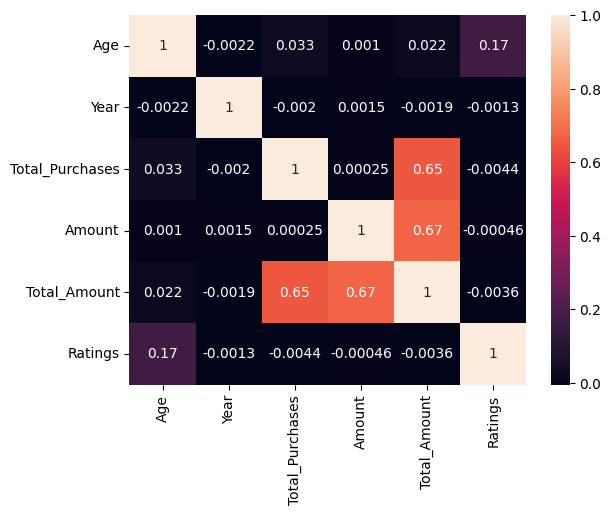

In [464]:
columns = ['Age','Year','Total_Purchases','Amount','Total_Amount','Ratings']
sns.heatmap(df[columns].corr(),annot=True) 

## Based on Heatmap, there's no corelation score that i can use

In [7]:
df.describe(include='all')

Transaction_ID    Customer_ID           Name                Email  \
count     2.939110e+05  293911.000000         293911               293911   
unique             NaN            NaN         156638                52530   
top                NaN            NaN  Michael Smith  Michael59@gmail.com   
freq               NaN            NaN            141                   92   
mean      5.493726e+06   55013.400523            NaN                  NaN   
std       2.596086e+06   26009.435811            NaN                  NaN   
min       1.000007e+06   10000.000000            NaN                  NaN   
25%       3.245886e+06   32470.000000            NaN                  NaN   
50%       5.495879e+06   55027.000000            NaN                  NaN   
75%       7.738197e+06   77514.000000            NaN                  NaN   
max       9.999995e+06   99999.000000            NaN                  NaN   

               Phone                         Address     City    State  \
count   2.939110e+05                          293911   293911   293911   
unique           NaN                          291610      130       54   
top              NaN  29378 Benjamin Parks Suite 015  Chicago  England   
freq             NaN                               2    21109    61398   
mean    5.500607e+09                             NaN      NaN      NaN   
std     2.596111e+09                             NaN      NaN      NaN   
min     1.000049e+09                             NaN      NaN      NaN   
25%     3.253497e+09                             NaN      NaN      NaN   
50%     5.504466e+09                             NaN      NaN      NaN   
75%     7.749761e+09                             NaN      NaN      NaN   
max     9.999996e+09                             NaN      NaN      NaN   

              Zipcode Country  ...   Total_Amount Product_Category  \
count   293911.000000  293911  ...  293911.000000           293911   
unique            NaN       5  ...            NaN                5   
top               NaN     USA  ...            NaN      Electronics   
freq              NaN   92800  ...            NaN            69365   
mean     50288.383830     NaN  ...    1367.686983              NaN   
std      28976.614021     NaN  ...    1128.895164              NaN   
min        501.000000     NaN  ...      10.003750              NaN   
25%      25408.000000     NaN  ...     438.852849              NaN   
50%      50586.000000     NaN  ...    1041.164351              NaN   
75%      75252.000000     NaN  ...    2028.954272              NaN   
max      99949.000000     NaN  ...    4999.625796              NaN   

       Product_Brand Product_Type   Feedback  Shipping_Method Payment_Method  \
count         293911       293911     293911           293911         293911   
unique            18           33          4                3              4   
top            Pepsi        Water  Excellent         Same-Day    Credit Card   
freq           29538        23838      98016           101541          87781   
mean             NaN          NaN        NaN              NaN            NaN   
std              NaN          NaN        NaN              NaN            NaN   
min              NaN          NaN        NaN              NaN            NaN   
25%              NaN          NaN        NaN              NaN            NaN   
50%              NaN          NaN        NaN              NaN            NaN   
75%              NaN          NaN        NaN              NaN            NaN   
max              NaN          NaN        NaN              NaN            NaN   

       Order_Status        Ratings      products  
count        293911  293911.000000        293911  
unique            4            NaN           318  
top       Delivered            NaN  Spring water  
freq         127238            NaN          2441  
mean            NaN       3.162301           NaN  
std             NaN       1.320762           NaN  
min             NaN       1.000000 

In [465]:
df.head(5)

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

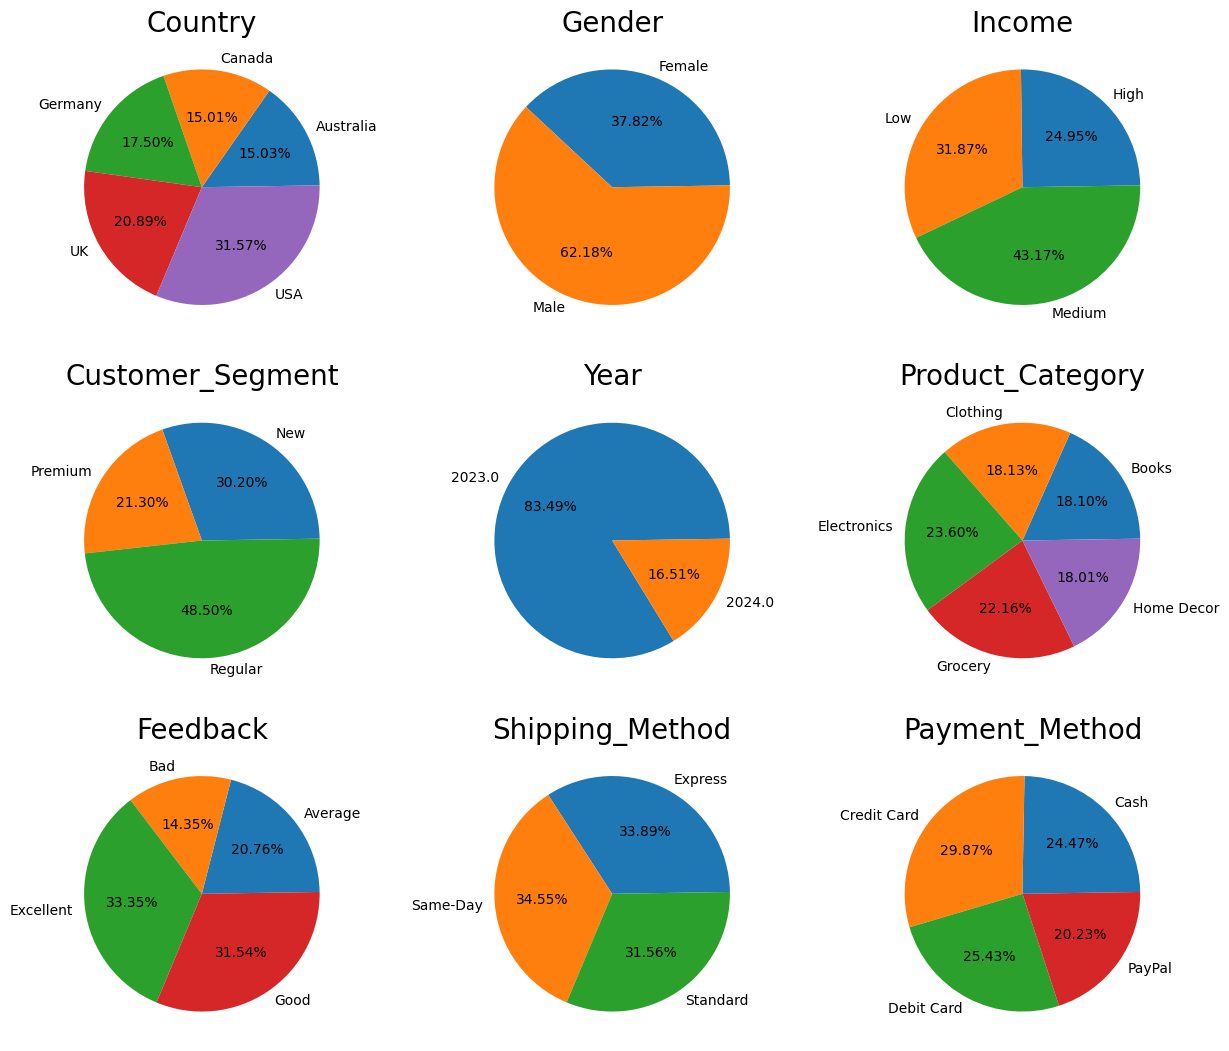

In [9]:
columns = []
for i in df:
    if df[i].nunique() <= 5:
        columns.append(i)
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,13))
index = 0
for i in range(0,3) :
    for j in range(0,3):
        compare = df.groupby(by=columns[index],as_index=False).Customer_ID.count()
        ax[i][j].pie(compare['Customer_ID'],labels=compare[columns[index]],
                     startangle=0.90,autopct='%1.2f%%')
        ax[i][j].set_title(columns[index],fontsize=20)
        index+=1
plt.show()

# Customer segmentation analysis

In [238]:
df.groupby(by='Customer_Segment').Total_Amount.sum().sort_values(ascending=False).reset_index()

Customer_Segment  Total_Amount
0          Regular  1.951811e+08
1              New  1.214247e+08
2          Premium  8.537248e+07

  Customer_Segment  Transaction_ID  Total_Purchases  Total_Amount
2          Regular          142550         763435.0  1.951811e+08
0              New           88764         476995.0  1.214247e+08
1          Premium           62597         334893.0  8.537248e+07


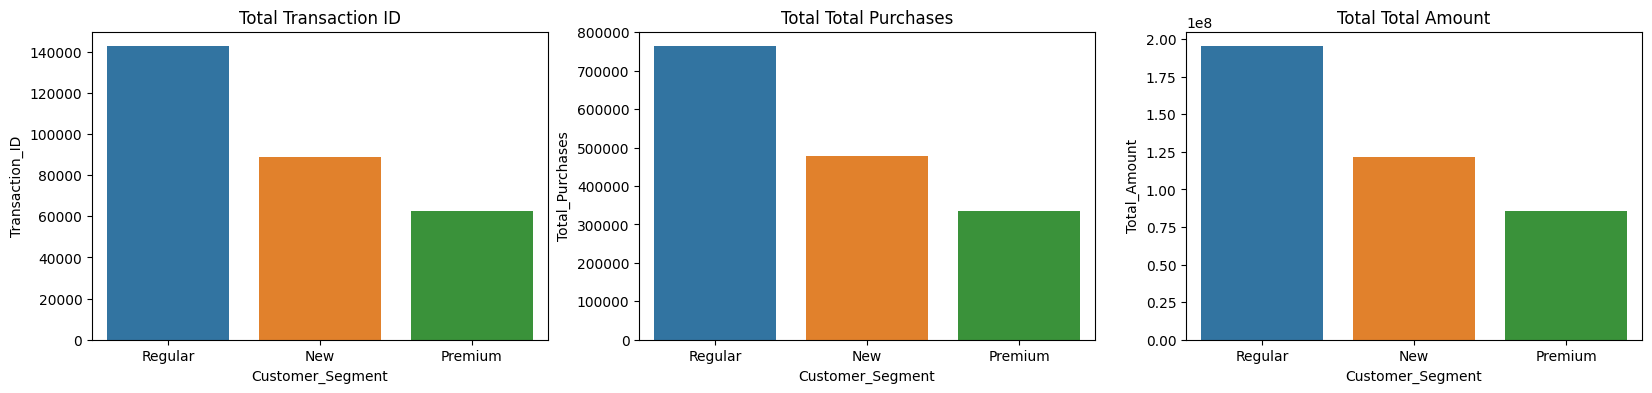

In [278]:
def bar_sum_purchases_amount(df,x,width=20,height=4):
    data = df.groupby(by=x).agg({
        'Transaction_ID' : 'count',
        'Total_Purchases' : 'sum',
        'Total_Amount' : 'sum'
    }).reset_index().sort_values(by='Total_Amount',ascending=False)
    print(data)
    
    columns = ['Transaction_ID','Total_Purchases','Total_Amount']
    fig, ax = plt.subplots(ncols=len(columns),figsize=(width,height))
    for i in range(len(columns)):
        sns.barplot(x=x,y=columns[i], data=data,ax=ax[i])
        ax[i].set_title(f"Total {columns[i].replace('_',' ',1)}")

bar_sum_purchases_amount(df,'Customer_Segment')

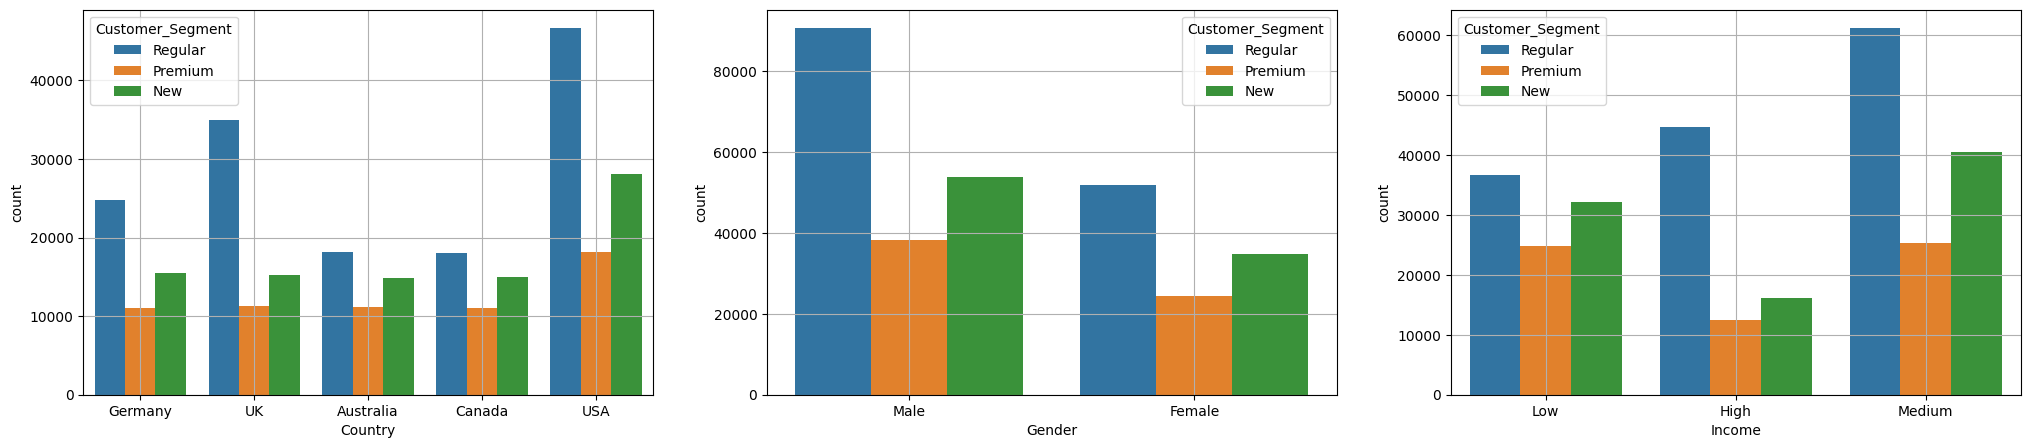

In [10]:
columns = ['Country','Gender','Income']
def bar_group(columns,dataframe,x='Customer_Segment'):
    fig, ax = plt.subplots(nrows=1, ncols=len(columns),figsize=(25,5))
    index = 0
    for column in columns:
        sns.countplot(x=column,data=dataframe,hue=x,ax=ax[index])
        ax[index].grid(True)
        index+=1
bar_group(columns,df)

### Country-Based Segmentation
- **Germany**: Segmen pelanggan terbesar adalah pelanggan regular.
- **UK**: Jumlah pelanggan regular mendominasi, dengan keseimbangan yang lebih baik antara pelanggan premium dan pelanggan baru.
- **Australia**: Distribusi pelanggan hampir merata antara pelanggan regular dan premium.
- **Canada**: Segmen pelanggan regular dan premium hampir sama besar.
- **USA**: Amerika Serikat memiliki jumlah pelanggan regular yang sangat tinggi dibandingkan negara lain.

### Gender-Based Segmentation
- **Male**: Jumlah pelanggan laki-laki mendominasi di semua segmen, dengan segmen regular memiliki jumlah paling banyak.
- **Female**: Pelanggan perempuan menunjukkan dominasi pada segmen regular, dengan keseimbangan yang lebih baik antara segmen premium dan baru.

### Income-Based Segmentation
- **Low Income**: Segmen regular mendominasi, diikuti oleh segmen premium, dan terakhir segmen baru.
- **Medium Income**: Kelompok pendapatan menengah menunjukkan jumlah pelanggan yang tinggi pada segmen regular, dengan segmen premium dan baru yang cukup signifikan.
- **High Income**: Pada kelompok pendapatan tinggi, segmen regular mendominasi, dengan keseimbangan yang lebih baik antara segmen premium dan baru.

### Kesimpulan
- **Dominasi Segmen Regular**: Pada hampir semua kategori, segmen pelanggan regular adalah yang terbesar.
- **Keseimbangan Antar Segmen**: Ada keseimbangan yang lebih baik antara segmen premium dan baru pada kategori gender dan income.
- **Pengaruh Negara**: Amerika Serikat menunjukkan jumlah pelanggan regular yang sangat tinggi, menandakan potensi pasar yang besar di negara tersebut.


In [11]:
segmentation={}
for i in df['Customer_Segment'].unique():
    segmentation[i] = {} 
for segment in segmentation:
    for i in df:
        segmentation[segment][i] = []
    for ros in range(len(df)):
        if df['Customer_Segment'][ros] == segment:
            for i in df:
                segmentation[segment][i].append(df[i][ros])

In [12]:
def segmentatition_chart(**kwargs):
        fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(20,15))
        index = 0
        for segment in segmentation:
            data = pd.DataFrame(segmentation[segment])
            data_segment = data.groupby(by=kwargs['BasedOn']).Transaction_ID.nunique().sort_values(ascending=False).reset_index().head(10)
            sns.barplot(x=kwargs['BasedOn'],y='Transaction_ID',data=data_segment,ax=ax[index],palette=kwargs['Palette'])
            ax[index].set_title(f"TOP 10 {kwargs['BasedOn']} Based on {segment}",fontsize=15)
            ax[index].grid(True)
            index+=1

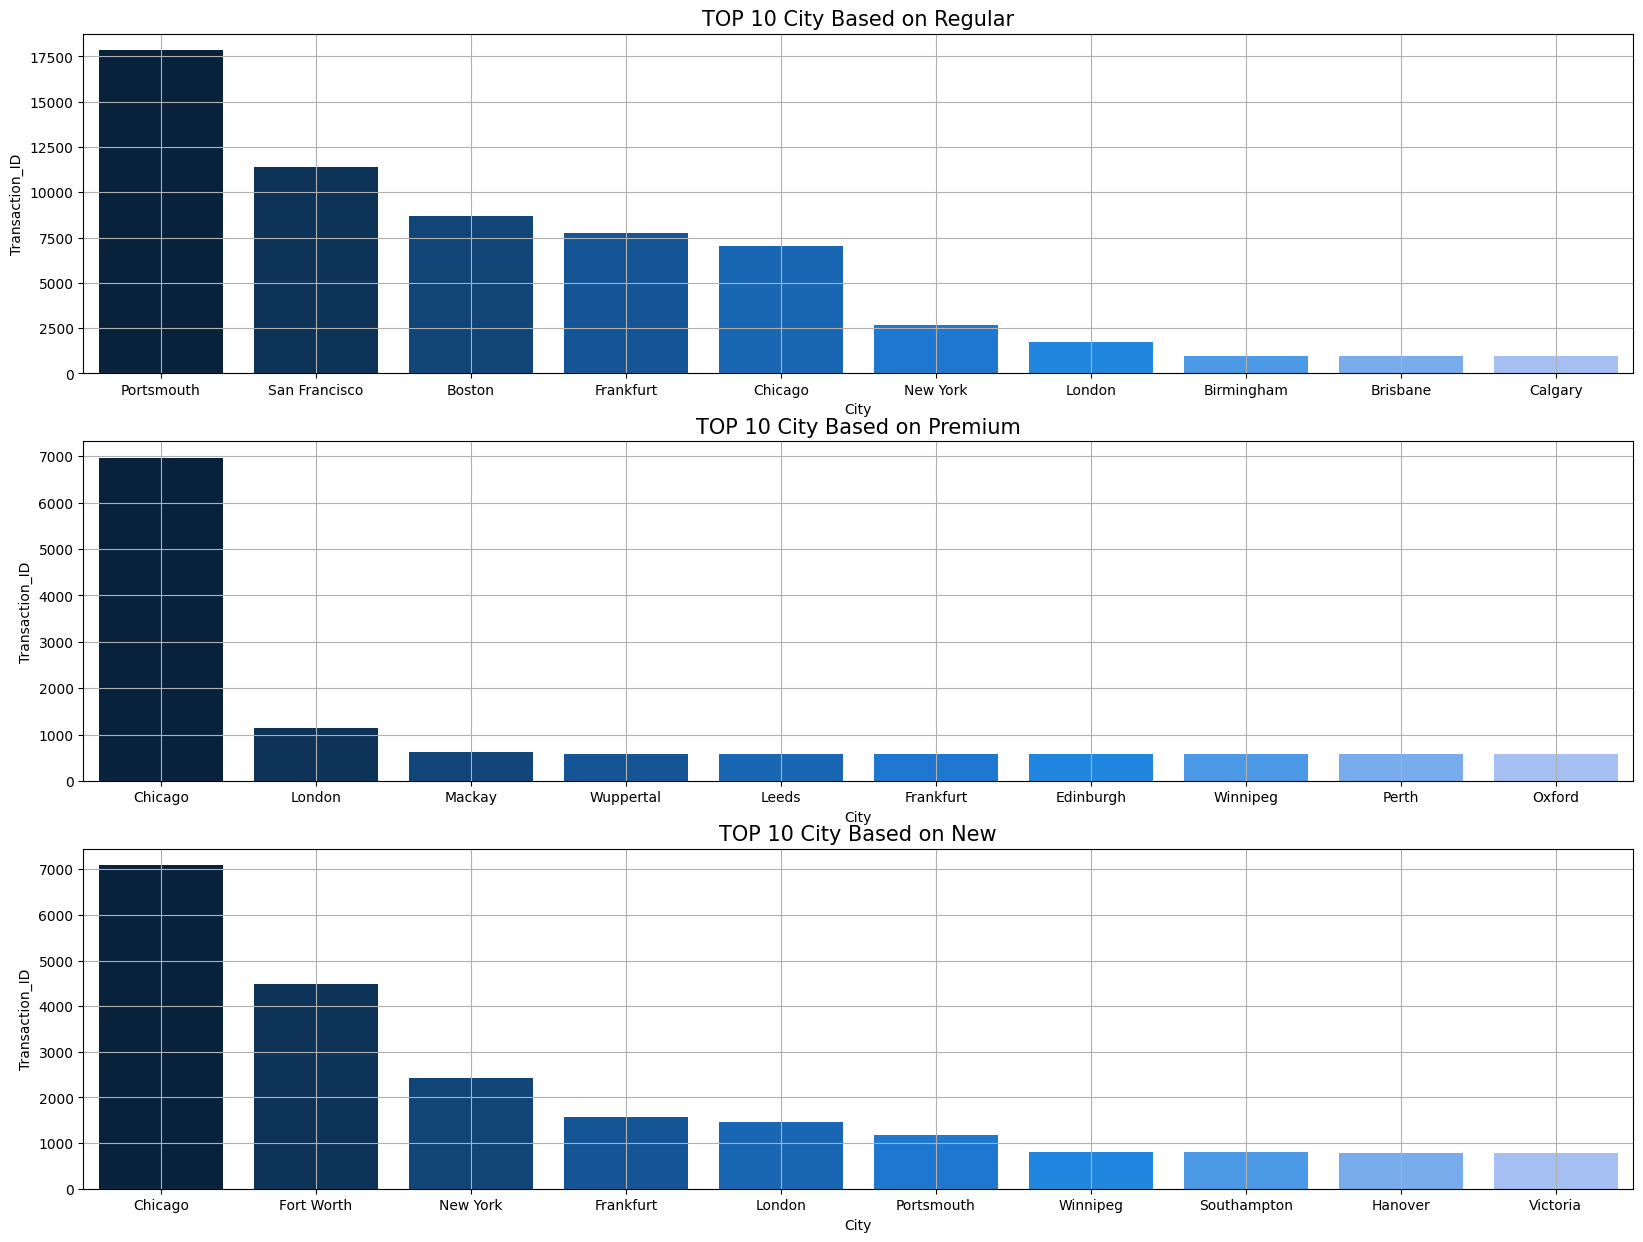

In [13]:
sky_blue_palette = ["#002244", "#003366", "#004488", "#0055AA", "#0066CC", 
                    "#0077EE", "#0088FF", "#3399FF", "#66AAFF", "#99BBFF"]
segmentatition_chart(BasedOn="City",Palette=sky_blue_palette)

## Customer Segmentation Based on City

### Top 10 City Based on Regular:
Kota Portsmouth memiliki transaksi reguler tertinggi, dengan jumlah transaksi melebihi 17.500.
San Francisco dan Boston mengikuti dengan jumlah transaksi masing-masing sekitar 13.000 dan 10.500.
Frankfurt, Chicago, dan New York memiliki jumlah transaksi yang lebih rendah namun masih signifikan, berkisar antara 7.500 hingga 10.000.
Kota lainnya seperti London, Birmingham, Brisbane, dan Calgary menunjukkan jumlah transaksi reguler yang lebih rendah, masing-masing di bawah 2.500 transaksi.

### Top 10 City Based on Premium:
Chicago memimpin dengan jumlah transaksi premium tertinggi, mendekati 7.500 transaksi.
London dan Mackay berada di posisi berikutnya dengan jumlah transaksi premium sekitar 2.000.
Kota-kota seperti Wuppertal, Leeds, Frankfurt, Edinburgh, Winnipeg, Perth, dan Oxford memiliki jumlah transaksi premium yang lebih rendah, berkisar antara 1.000 hingga 1.500.

### Top 10 City Based on New:
Chicago kembali memimpin dalam jumlah transaksi baru, dengan total transaksi lebih dari 9.000.
Fort Worth dan New York menyusul dengan jumlah transaksi baru masing-masing sekitar 7.500 dan 6.500.
Kota-kota seperti Frankfurt, London, Portsmouth, Winnipeg, Southampton, Hanover, dan Victoria menunjukkan jumlah transaksi baru yang lebih rendah, masing-masing berkisar antara 2.000 hingga 5.000 transaksi.

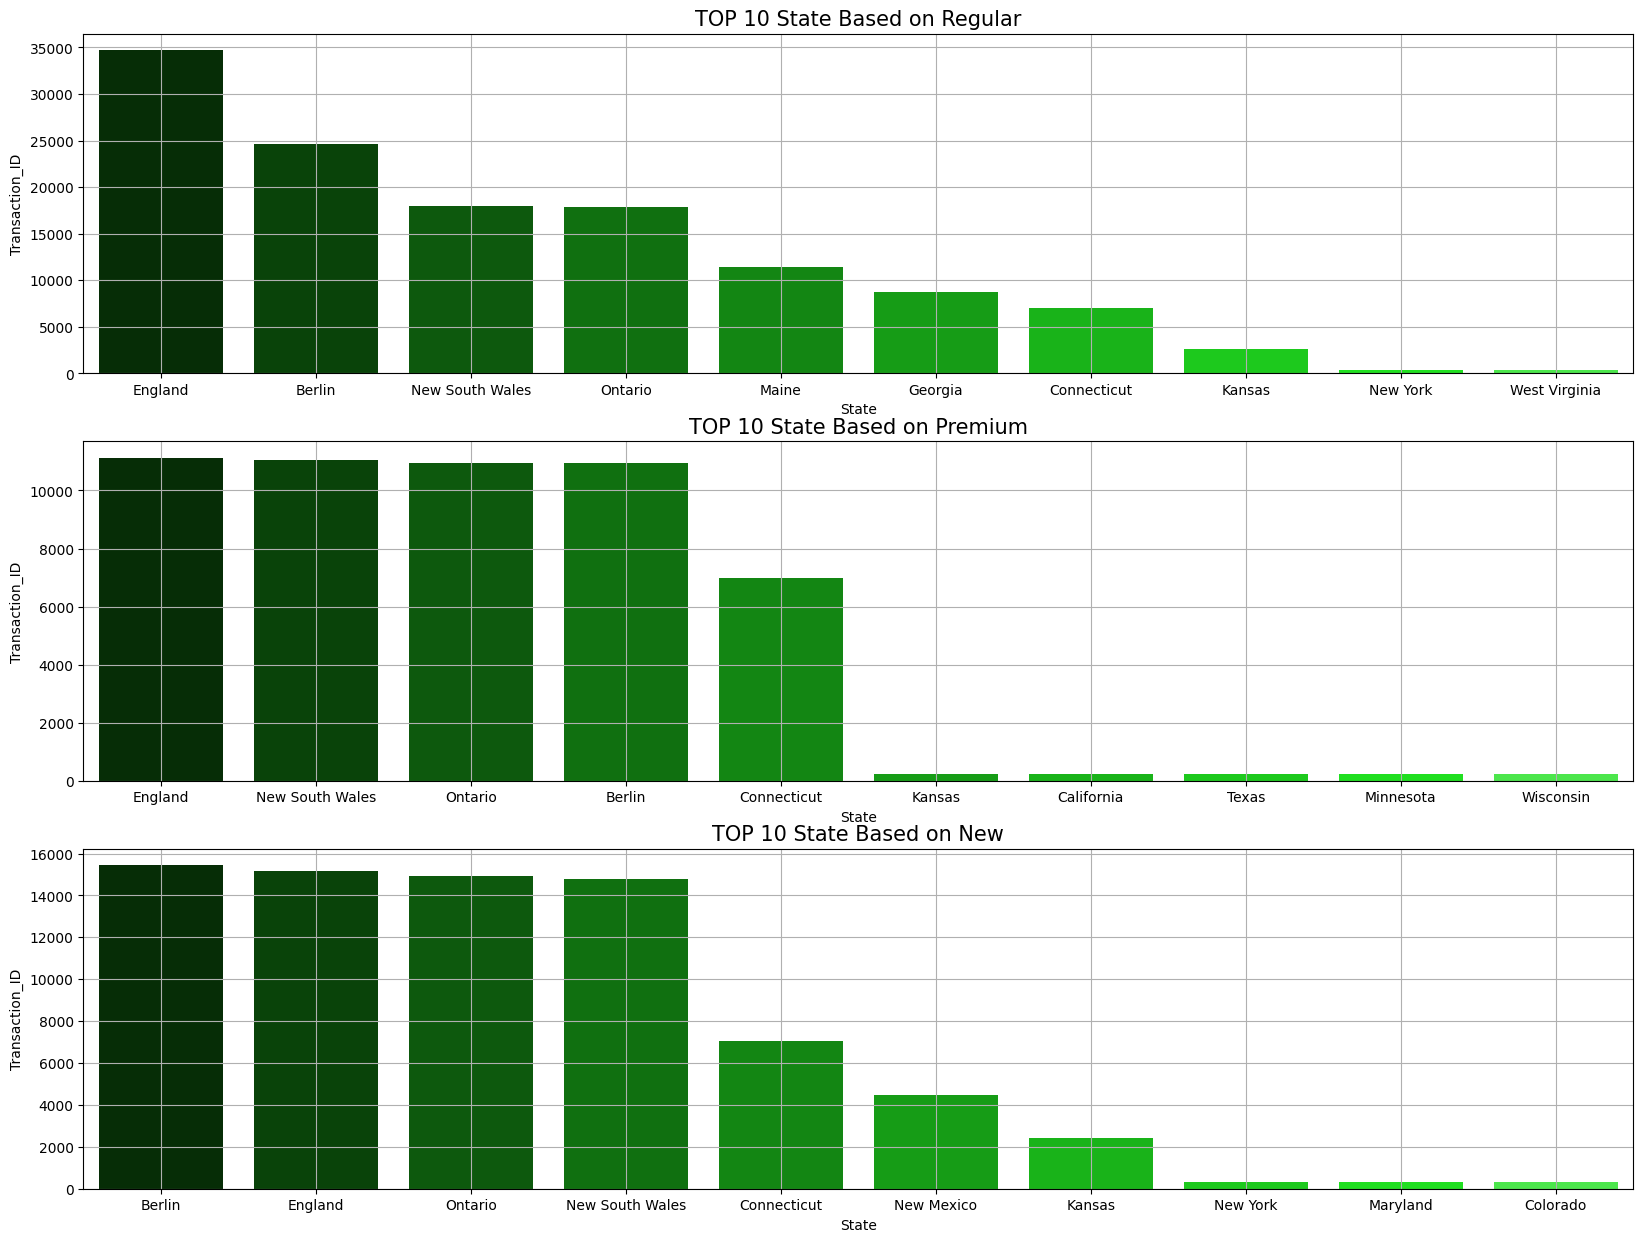

In [14]:
green_palette = ["#003300", "#004C00", "#006600", "#008000", "#009900",
                 "#00B200", "#00CC00", "#00E600", "#00FF00", "#33FF33"]
segmentatition_chart(BasedOn="State",Palette=green_palette)

## Customer Segmentation Based on State

### Top 10 State Based on Regular:
England memimpin dengan jumlah transaksi reguler tertinggi, mencapai lebih dari 30.000 transaksi.
Berlin dan New South Wales mengikuti dengan jumlah transaksi masing-masing sekitar 27.500 dan 25.000.
Ontario dan Maine memiliki jumlah transaksi yang lebih rendah namun masih signifikan, berkisar antara 20.000 hingga 22.500.
Negara bagian lainnya seperti Georgia, Connecticut, Kansas, New York, dan West Virginia menunjukkan jumlah transaksi reguler yang lebih rendah, masing-masing di bawah 10.000 transaksi.

### Top 10 State Based on Premium:
England, New South Wales, dan Ontario memimpin dengan jumlah transaksi premium tertinggi, masing-masing mendekati 10.000 transaksi.
Berlin juga menunjukkan performa yang kuat dengan jumlah transaksi premium yang hampir sama.
Connecticut memiliki jumlah transaksi premium yang signifikan, sekitar 5.000 transaksi, diikuti oleh Kansas dan California dengan jumlah yang lebih rendah.
Negara bagian lainnya seperti Texas, Minnesota, dan Wisconsin menunjukkan jumlah transaksi premium yang relatif kecil, masing-masing di bawah 2.500 transaksi.

### Top 10 State Based on New:
Berlin dan England memimpin dengan jumlah transaksi baru tertinggi, masing-masing lebih dari 15.000 transaksi.
Ontario dan New South Wales juga memiliki performa yang baik dengan jumlah transaksi baru yang mendekati 15.000.
Connecticut dan Maine menunjukkan jumlah transaksi baru yang signifikan, sekitar 10.000 hingga 12.500.
Negara bagian lainnya seperti Kansas, New York, Maryland, dan Colorado menunjukkan jumlah transaksi baru yang lebih rendah, masing-masing di bawah 5.000 transaksi.

In [15]:
change = {}
list_date = df['Month'].unique()
print(list_date)

['September' 'December' 'April' 'May' 'January' 'June' 'March' 'October'
 'July' 'November' 'February' 'August']


In [16]:
numeric = [9,12,4,5,1,6,3,10,7,11,2,8]

for i in range(len(numeric)):
    change[list_date[i]] = numeric[i]
df['Month'] = df['Month'].replace(change)

In [17]:
years_month = []
temp = []
for i in range(len(df)):
    month=df['Date'][i][:2]
    there_slash = 0
    for k in range(len(month)):
        if month[k] == '/':
            there_slash = 1
    if there_slash == 1:
        date = month.replace('/','',1)
        value = str(int(df['Year'][i])) + '0' + date
    else:
        value = str(int(df['Year'][i])) + month
    temp.append(value)
    years_month.append(value[-2:] + '-' + value[:4])
df['temp'] = temp
df['years_month'] = years_month

Tujuan dari kode ini adalah untuk membuat dua kolom baru dalam DataFrame:

temp: Kolom ini menyimpan nilai gabungan dari tahun dan bulan dalam format 'YYYYMM', dengan beberapa penyesuaian untuk menangani kasus di mana ada karakter / dalam bagian bulan.

years_month: Kolom ini menyimpan data dalam format 'MM-YYYY' untuk mempermudah analisis data berdasarkan bulan dan tahun.

In [18]:
df = df.sort_values(by='temp',ascending=True).reset_index()
df.drop(columns=['temp','index'],inplace=True)

In [19]:
def sum_based_on(**kwargs):
    data = {
        kwargs['Based_On'] : kwargs['Dataframe'][kwargs['Based_On']].unique()
    }
    for i in kwargs['Dataframe'][kwargs['sum']].unique():
        data[i] = []

    count = []
    for iter in range(len(data[kwargs['Based_On']])):
        n_count = 0
        for i in kwargs['Dataframe'][kwargs['sum']].unique():
            n = 0
            for baris_data in range(len(kwargs['Dataframe'])):
                if kwargs['Dataframe'][kwargs['Based_On']][baris_data] == data[kwargs['Based_On']][iter] and kwargs['Dataframe'][kwargs['sum']][baris_data] == i:
                    n+=1
                    n_count+=1
            data[i].append(n)
        count.append(n_count)
        
    data['Total'] = count
    return pd.DataFrame(data)

In [20]:
year_month = sum_based_on(Based_On='years_month',sum='Customer_Segment',Dataframe=df)

bertujuan untuk membuat DataFrame baru berdasarkan distribusi segmentasi pelanggan per bulan (years_month)

In [21]:
year_month

years_month  Regular   New  Premium  Total
0      03-2023    12088  7429     5422  24939
1      04-2023    11664  7237     5169  24070
2      05-2023    12041  7385     5175  24601
3      06-2023    11762  7342     5065  24169
4      07-2023    12152  7541     5180  24873
5      08-2023    12042  7550     5268  24860
6      09-2023    11612  7395     5214  24221
7      10-2023    12028  7565     5332  24925
8      11-2023    11635  7256     5114  24005
9      12-2023    11997  7415     5304  24716
10     01-2024    12241  7484     5257  24982
11     02-2024    11288  7165     5097  23550

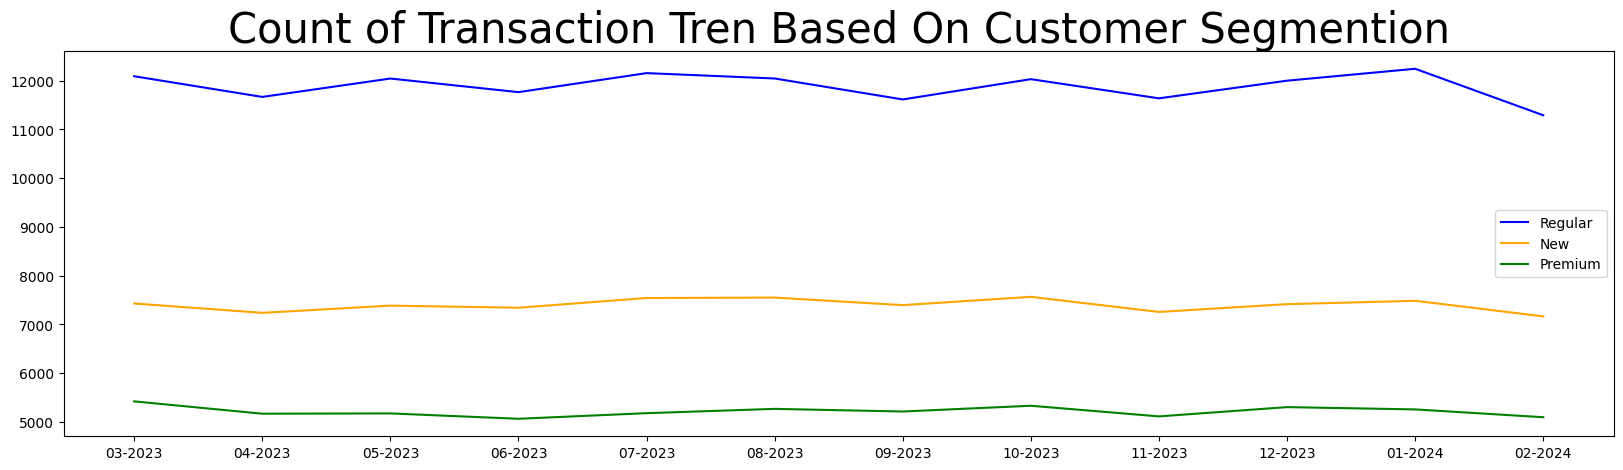

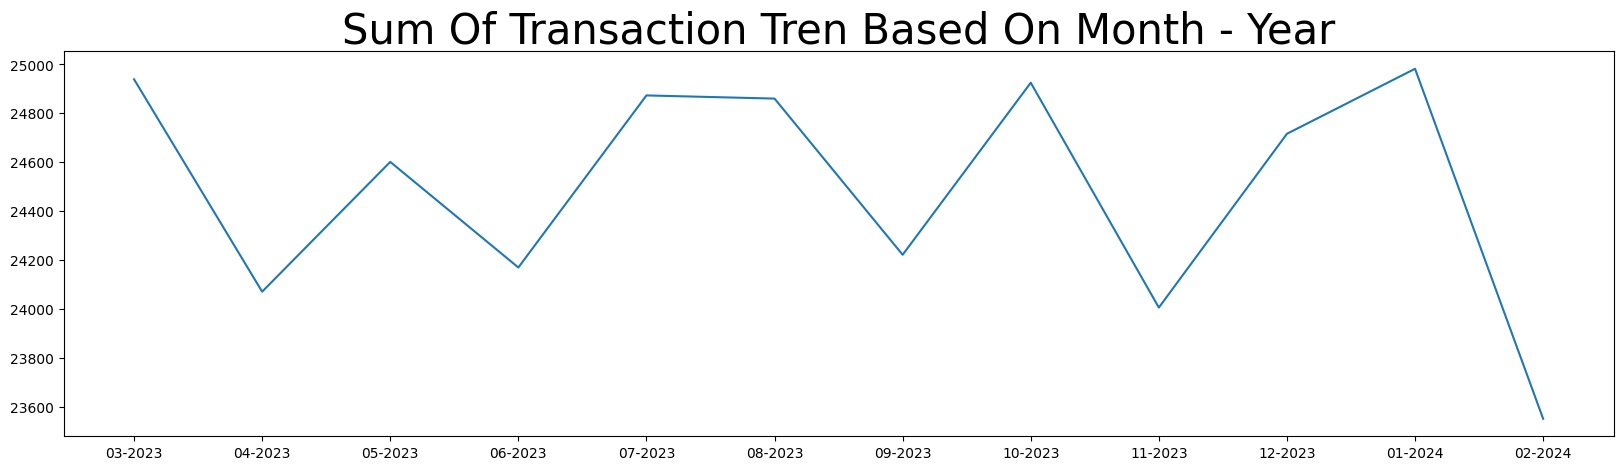

In [22]:
plt.figure(figsize=(20,5))
plt.plot(year_month['years_month'],year_month['Regular'],color='blue')
plt.plot(year_month['years_month'],year_month['New'],color='orange')
plt.plot(year_month['years_month'],year_month['Premium'],color='green')
plt.title('Count of Transaction Tren Based On Customer Segmention',fontsize=30)
plt.legend(['Regular', 'New','Premium'])
plt.show()

plt.figure(figsize=(20,5))
plt.plot(year_month['years_month'],year_month['Total'])
plt.title('Sum Of Transaction Tren Based On Month - Year',fontsize=30)
plt.show()

#### 1. Kenaikan Signifikan di Oktober 2023
Lonjakan Terbesar: Grafik menunjukkan adanya lonjakan signifikan dalam jumlah transaksi pada bulan Oktober 2023, mencapai puncak tertinggi selama periode yang dianalisis. Jumlah transaksi pada bulan ini melampaui 25,000 transaksi.
Kemungkinan Penyebab: Lonjakan ini mungkin disebabkan oleh beberapa faktor, seperti promosi khusus, acara penjualan besar, atau peluncuran produk baru. Perusahaan mungkin telah mengadakan kampanye pemasaran besar-besaran atau memberikan diskon yang menarik bagi pelanggan.

#### 2. Penurunan Setelah Puncak
Penurunan Drastis: Setelah mencapai puncaknya pada bulan Oktober 2023, jumlah transaksi menurun tajam pada bulan-bulan berikutnya. Pada Februari 2024, jumlah transaksi turun mendekati angka 23,600.
Analisis Penurunan: Penurunan ini bisa jadi menunjukkan bahwa lonjakan pada bulan Oktober adalah kejadian yang luar biasa, mungkin terkait dengan faktor musiman atau promosi sementara. Setelah promosi atau acara tersebut berakhir, jumlah transaksi kembali ke tingkat normal.

#### 3. Fluktuasi Stabil di Bulan-Bulan Lain
Pergerakan Stabil: Selain lonjakan besar di Oktober dan penurunan tajam setelahnya, grafik menunjukkan fluktuasi yang relatif stabil pada bulan-bulan lainnya. Jumlah transaksi bergerak antara 23,600 hingga 25,000.
Kestabilan Pasar: Fluktuasi stabil ini menunjukkan bahwa pasar memiliki tingkat aktivitas yang konsisten, dengan sedikit variasi bulanan. Ini mungkin mencerminkan pola belanja pelanggan yang stabil atau strategi penjualan yang efektif dari perusahaan.

#### 4. Signifikansi Bulanan
Tingkat Aktivitas Bulanan: Bulan-bulan dengan aktivitas lebih tinggi (seperti Maret 2023 dan Oktober 2023) dapat menjadi fokus untuk analisis lebih lanjut. Mengidentifikasi penyebab dari peningkatan transaksi ini dapat membantu dalam merencanakan strategi bisnis di masa depan.



In [23]:
def line_chart(**kwargs):
    fig, ax = plt.subplots(nrows=2,figsize=(20,14))
    index=0
    list_ = ['Total_Purchases','Total_Amount']
    for i in list_:
        sns.lineplot(x='years_month',y=i,hue=kwargs['hue'],data=kwargs['dataframe'],ax=ax[index])
        ax[index].set_title(f"Tren of {i.replace('_',' ',1)} Based On {kwargs['hue'].replace('_',' ',2)}",fontsize=25)
        index+=1
    plt.show()

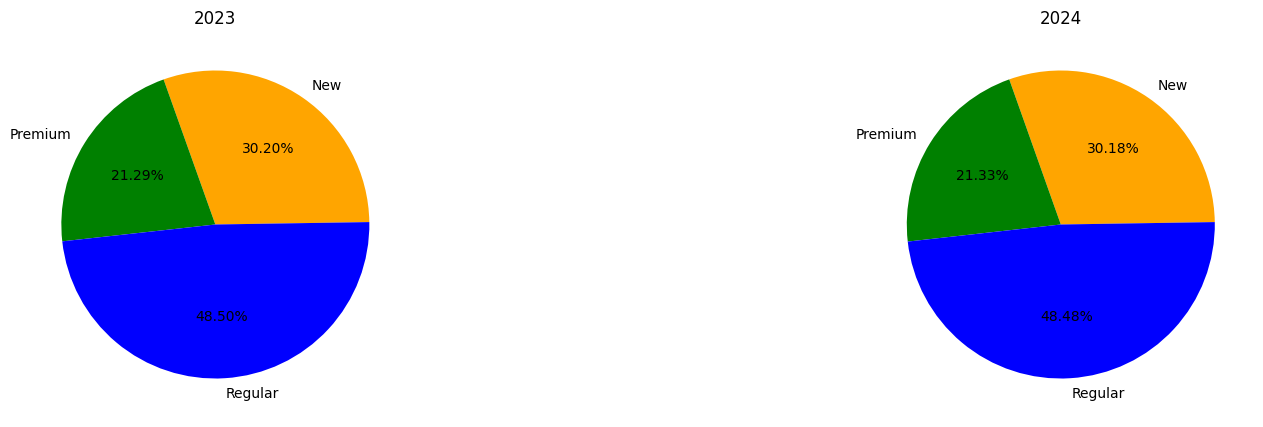

In [24]:
#Pie
years = ['2023','2024']
fig, ax = plt.subplots(ncols=2,figsize=(20,5))
index = 0
for year in years:
    year_data = df[df['Date'].str.contains(year)]
    year_data = year_data.groupby(by='Customer_Segment').Transaction_ID.count().reset_index()
    ax[index].pie(year_data['Transaction_ID'],labels=year_data['Customer_Segment'],
                     startangle=0.90,autopct='%1.2f%%',colors=['Orange','Green','Blue'])
    ax[index].set_title(year)
    index+=1
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293911 entries, 0 to 293910
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    293911 non-null  float64
 1   Customer_ID       293911 non-null  float64
 2   Name              293911 non-null  object 
 3   Email             293911 non-null  object 
 4   Phone             293911 non-null  float64
 5   City              293911 non-null  object 
 6   State             293911 non-null  object 
 7   Country           293911 non-null  object 
 8   Age               293911 non-null  float64
 9   Gender            293911 non-null  object 
 10  Income            293911 non-null  object 
 11  Customer_Segment  293911 non-null  object 
 12  Date              293911 non-null  object 
 13  Year              293911 non-null  float64
 14  Month             293911 non-null  int64  
 15  Time              293911 non-null  object 
 16  Total_Purchases   29

# Feedback Analysis

    Feedback  Transaction_ID  Total_Purchases  Total_Amount
2  Excellent           98016         524219.0  1.338294e+08
3       Good           92696         496545.0  1.265249e+08
0    Average           61019         328119.0  8.381922e+07
1        Bad           42180         226440.0  5.780472e+07


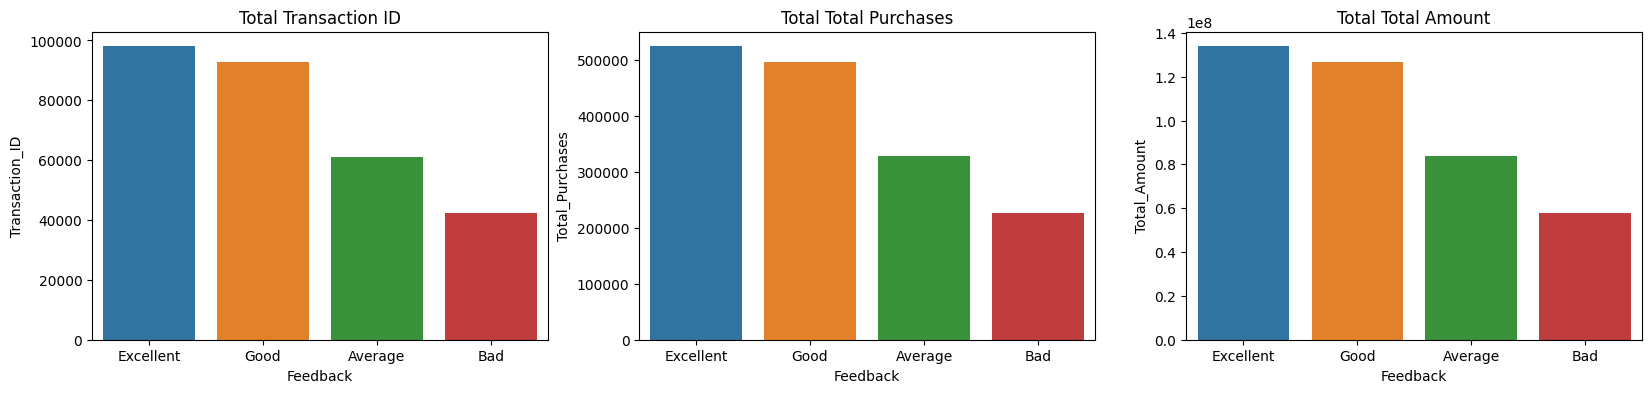

In [279]:
bar_sum_purchases_amount(df,'Feedback')

In [26]:
Feedback = sum_based_on(Based_On='Feedback',sum='Customer_Segment',Dataframe=df)
Feedback

Feedback  Regular    New  Premium  Total
0  Excellent    42068  31326    24622  98016
1       Good    44660  27199    20837  92696
2        Bad    23846  12471     5863  42180
3    Average    31976  17768    11275  61019

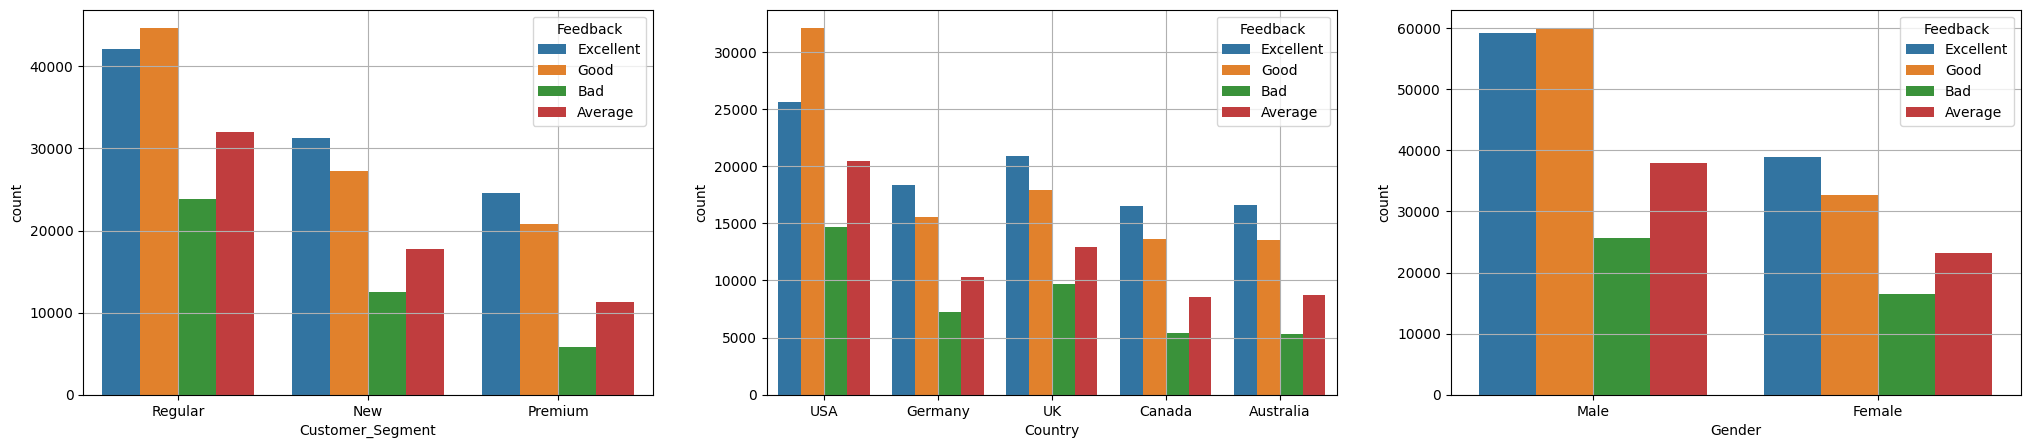

In [27]:
data=['Customer_Segment','Country','Gender']
bar_group(data,df,'Feedback')

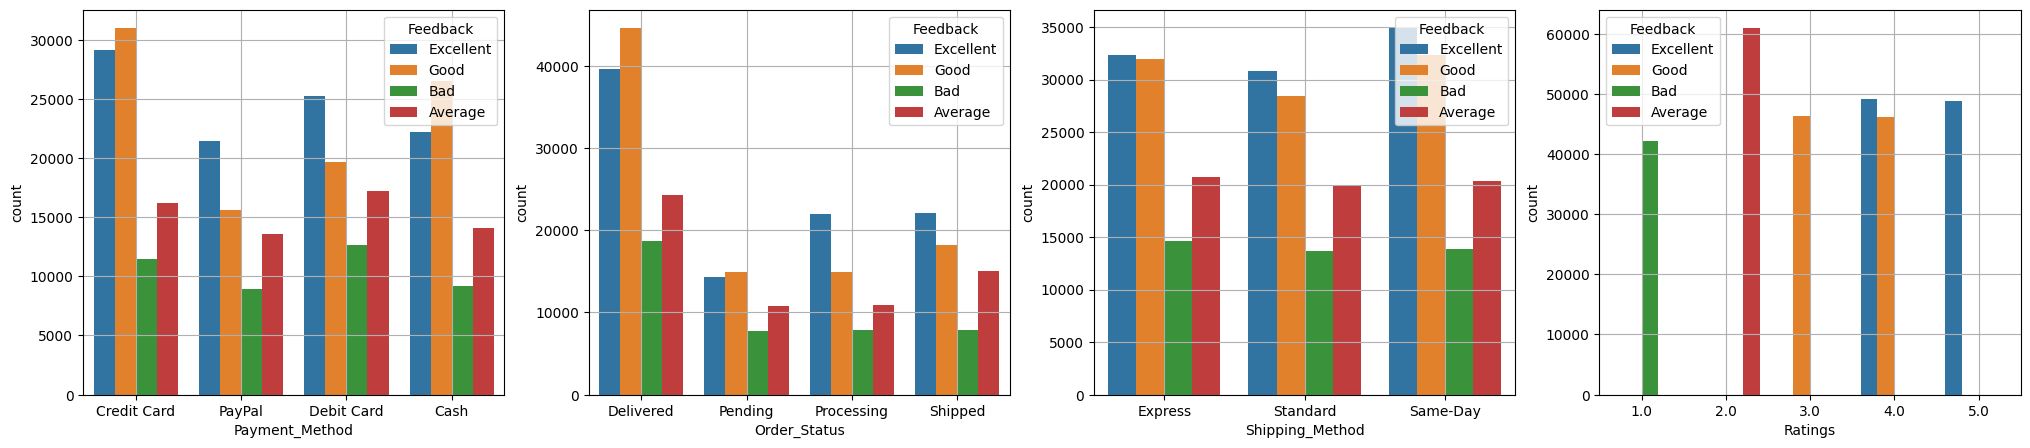

In [28]:
method = ['Payment_Method','Order_Status','Shipping_Method','Ratings']
bar_group(method,df,'Feedback')

### Kesimpulan : 
Dominasi Segmen Regular: Segmen pelanggan Regular cenderung memberikan umpan balik paling banyak di semua kategori, baik positif (Excellent dan Good) maupun negatif (Bad dan Average).

Distribusi Umpan Balik: Umpan balik "Excellent" dan "Good" lebih umum dibandingkan dengan "Bad" dan "Average", menunjukkan tingkat kepuasan pelanggan yang cukup tinggi secara keseluruhan.

Variasi Berdasarkan Kategori: Umpan balik bervariasi tergantung pada segmen pelanggan, negara, dan metode yang digunakan (seperti pembayaran atau pengiriman). Ini menunjukkan bahwa preferensi dan pengalaman pelanggan mungkin berbeda tergantung pada faktor-faktor ini.

# Age & Time Analysis

In [29]:
Time_Baru = []
for i in range(len(df)):
    time = df['Time'][i][:2]
    temp = 0
    for char in time :
        if char == ':':
            time = time.replace(':','',1)
    Time_Baru.append(int(time))
df['Time'] = Time_Baru
df['Time'].replace({0 : 24},inplace=True)
print(df['Time'].unique())

[ 3 13 19  5  2 15  7  1 11 24 10 12  4 17 14 23 18 20  9  8  6 21 16 22]


memproses dan membersihkan kolom 'Time' dalam DataFrame df, dengan tujuan akhir mengubah format kolom 'Time' menjadi format yang lebih sederhana, yaitu hanya menyimpan jam (dalam bentuk string dua digit) tanpa karakter tambahan seperti titik dua.

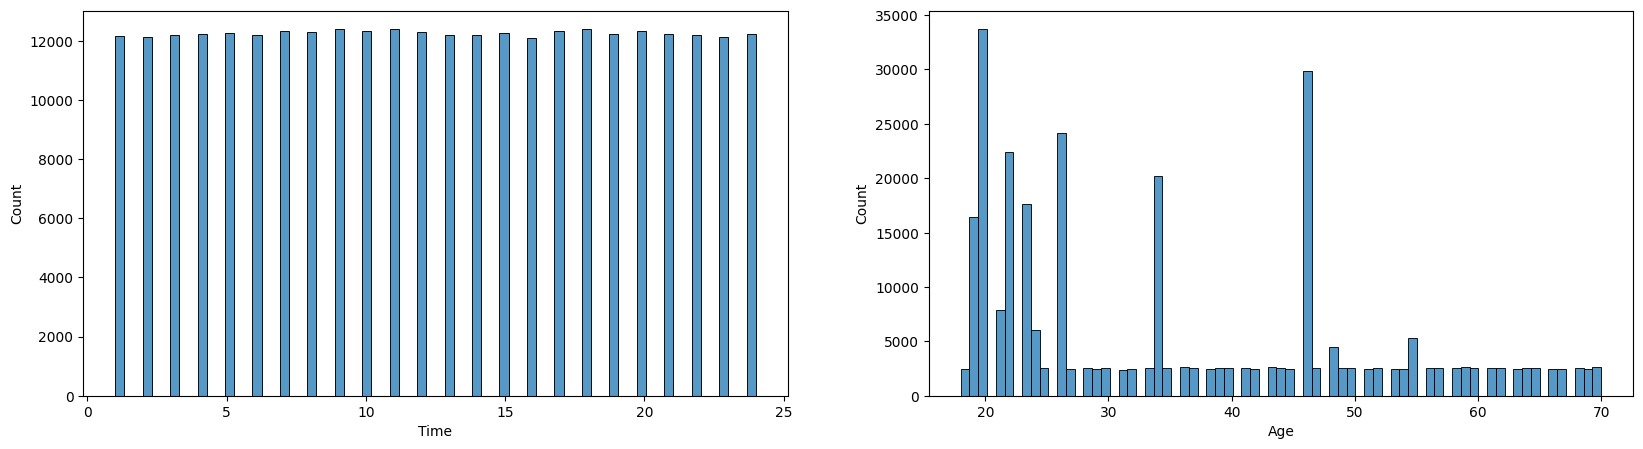

In [30]:
data = ['Time','Age']

fig, ax = plt.subplots(ncols=2,figsize=(20,5))

for i in range(len(data)):
    sns.histplot(x=data[i],data=df,ax=ax[i])

### Binning Time & Age

In [31]:
time_of_season = []
Age = []
for i in range(len(df)):
    time = int(df['Time'][i])
    if time >= 0 and time < 12:
        time_of_season.append("Morning")
    elif time >= 12 and time < 19:
        time_of_season.append("Evening")
    else:
        time_of_season.append("Tonight")

    age_temp = df['Age'][i]
    if age_temp >= 13 and age_temp <=19:
        Age.append('Adolescence')
    elif age_temp >= 20 and age_temp <= 39:
        Age.append('Young Adulthood')
    elif age_temp >= 40 and age_temp <= 59:
        Age.append('Middle AdultHood')
    else:
        Age.append('Late AdultHood')
df['Time_Of_Season'] = time_of_season
df['Adult'] = Age

##### Tujuan Kode
- Mengkategorikan Waktu dalam Sehari (Time_Of_Season)
Kode ini mengkategorikan waktu dalam sehari menjadi tiga kategori: "Morning", "Evening", dan "Tonight" berdasarkan nilai dari kolom Time.

- Mengkategorikan Tahapan Kehidupan (Adult)
Kode ini mengkategorikan usia menjadi empat kategori tahapan kehidupan: "Adolescence", "Young Adulthood", "Middle Adulthood", dan "Late Adulthood" berdasarkan nilai dari kolom Age.

              Adult  Transaction_ID  Total_Purchases  Total_Amount
3   Young Adulthood          164588         883548.0  2.251515e+08
2  Middle AdultHood           82576         449655.0  1.152042e+08
1    Late AdultHood           27876         152446.0  3.873406e+07
0       Adolescence           18871          89674.0  2.288848e+07


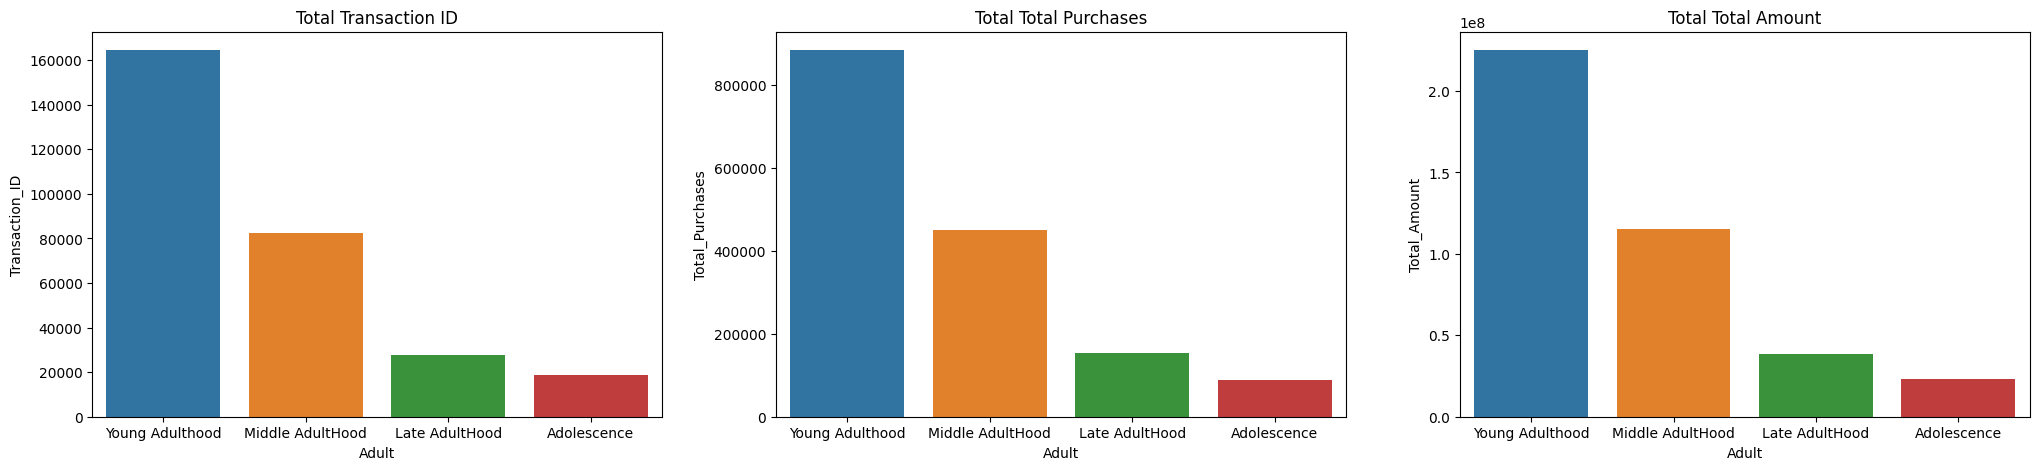

In [282]:
bar_sum_purchases_amount(df,'Adult',25,5)

  Time_Of_Season  Transaction_ID  Total_Purchases  Total_Amount
1        Morning          134853         722143.0  1.840527e+08
0        Evening           85759         459578.0  1.172283e+08
2        Tonight           73299         393602.0  1.006972e+08


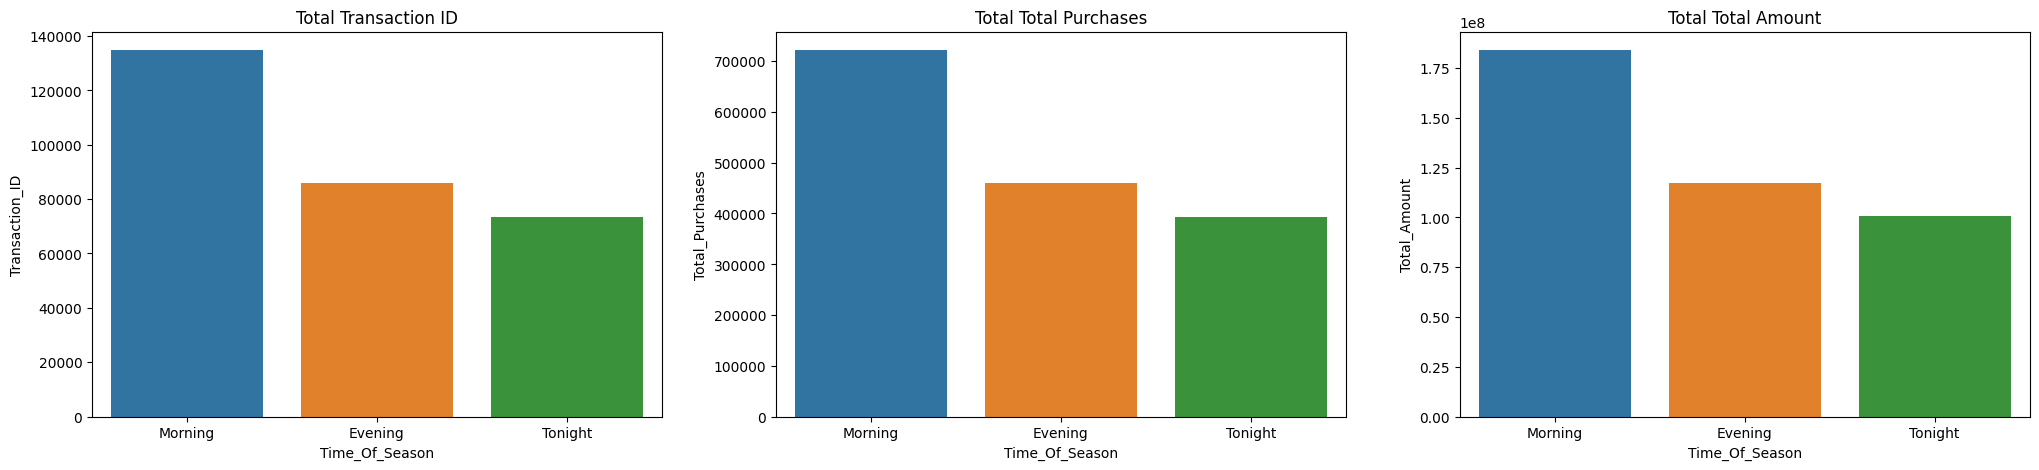

In [283]:
bar_sum_purchases_amount(df,'Time_Of_Season',25,5)

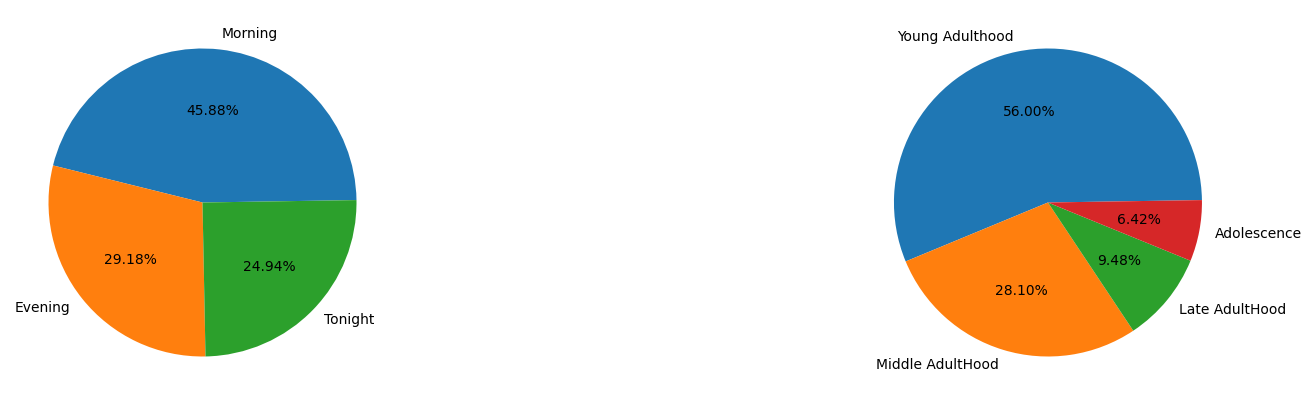

In [34]:
data__ = ['Time_Of_Season','Adult']
fig, ax = plt.subplots(ncols=2,figsize=(20,5))
for i in range(len(data__)):
    data = df[data__[i]].value_counts().reset_index()
    ax[i].pie(data['count'],labels=data[data__[i]],
            startangle=0.90,autopct='%1.2f%%')
plt.show()

Aktivitas atau data yang diukur lebih banyak terjadi pada pagi hari dan lebih sedikit pada malam hari.
Tahap kehidupan dewasa muda adalah yang paling dominan dalam data, sementara tahap kehidupan remaja adalah yang paling sedikit.

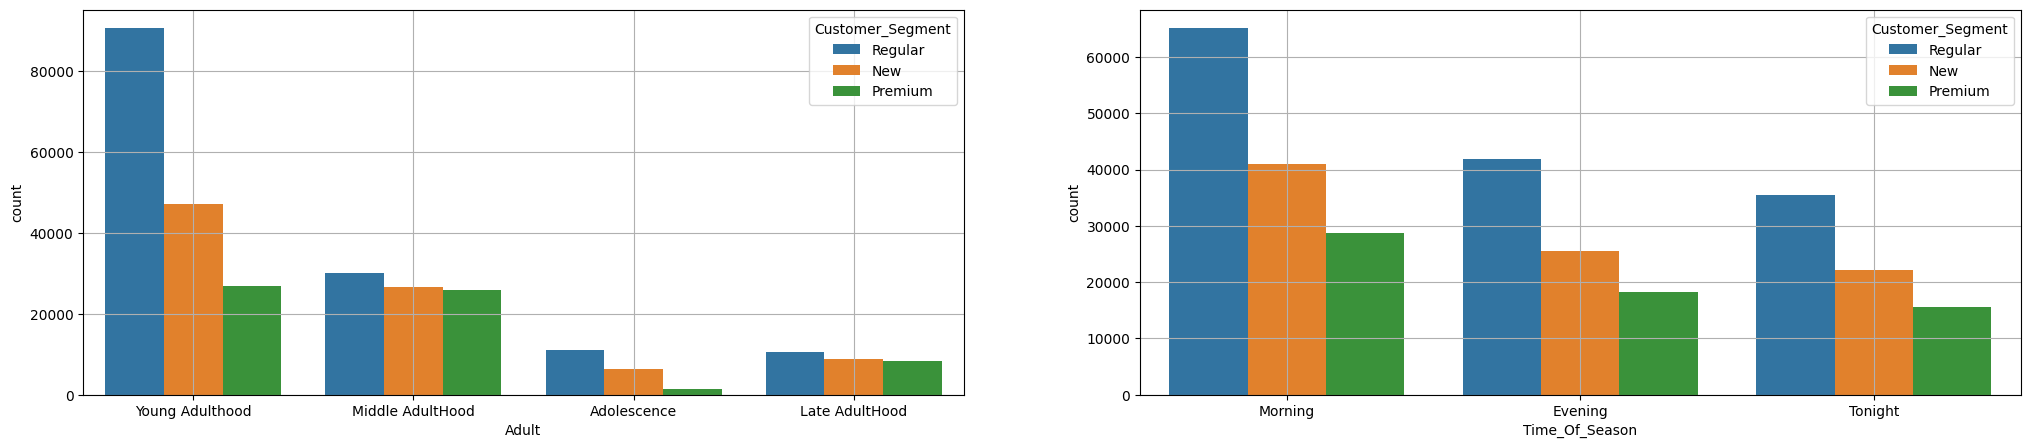

In [36]:
season_adult = ['Adult','Time_Of_Season']
bar_group(season_adult,df)

### Distribusi Waktu dalam Sehari:

Pagi hari memiliki jumlah pelanggan tertinggi di semua segmen (Regular, New, Premium).
Sore hari memiliki jumlah pelanggan menengah.
Malam hari memiliki jumlah pelanggan paling sedikit.

### Distribusi Tahapan Kehidupan:
Dewasa muda memiliki jumlah pelanggan tertinggi di semua segmen.
Dewasa pertengahan memiliki jumlah pelanggan menengah.
Remaja memiliki jumlah pelanggan paling sedikit.
Dewasa akhir memiliki jumlah pelanggan yang lebih sedikit dibandingkan dengan tahapan lainnya, tetapi lebih tinggi dibandingkan dengan remaja.

(1.0, 24.0)

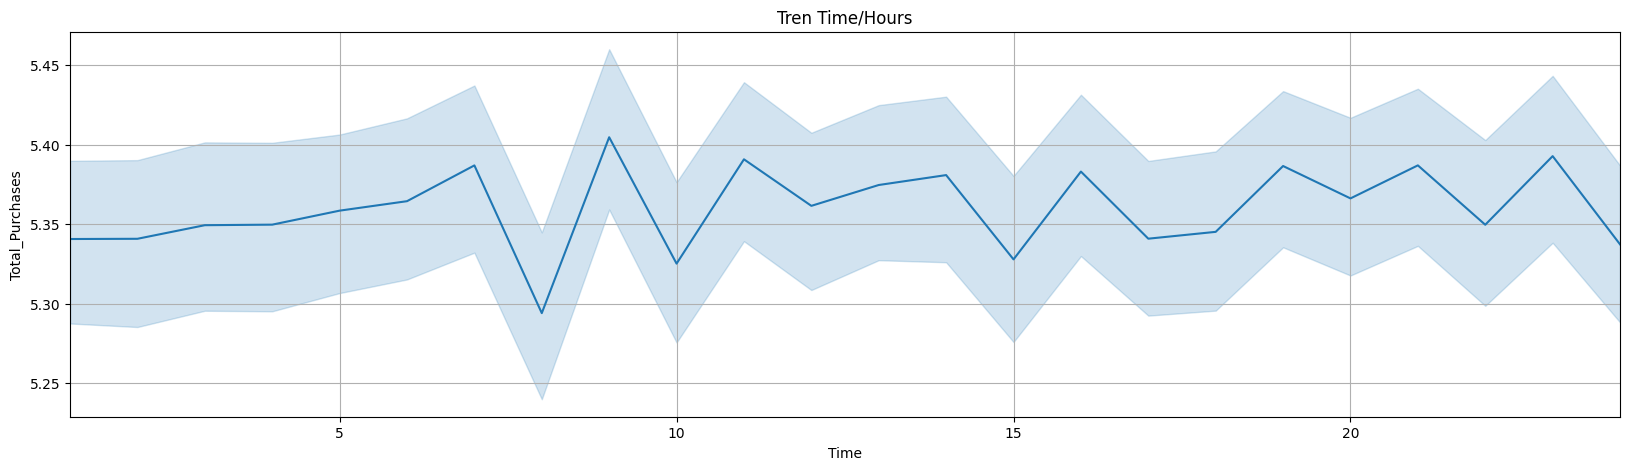

In [37]:
df['Time'] = df['Time'].astype('int64')

plt.figure(figsize=(20,5))
sns.lineplot(x='Time',y='Total_Purchases',data=df.sort_values(by='Time',ascending=False))
plt.title("Tren Time/Hours")
plt.grid(True)
plt.xlim(1,24)

Tren total pembelian menunjukkan variasi sepanjang hari, dengan beberapa puncak dan lembah.
Jam tertentu tampaknya lebih aktif dalam hal jumlah pembelian, yang mungkin mencerminkan jam sibuk atau waktu belanja populer di antara pelanggan.

# Product Analysis

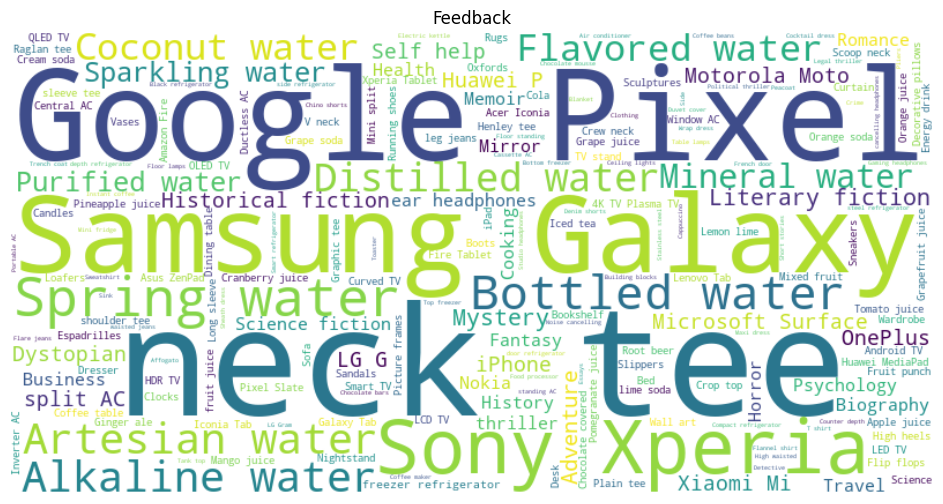

In [38]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['products']))

plt.figure(figsize=(100,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Feedback')
plt.show()

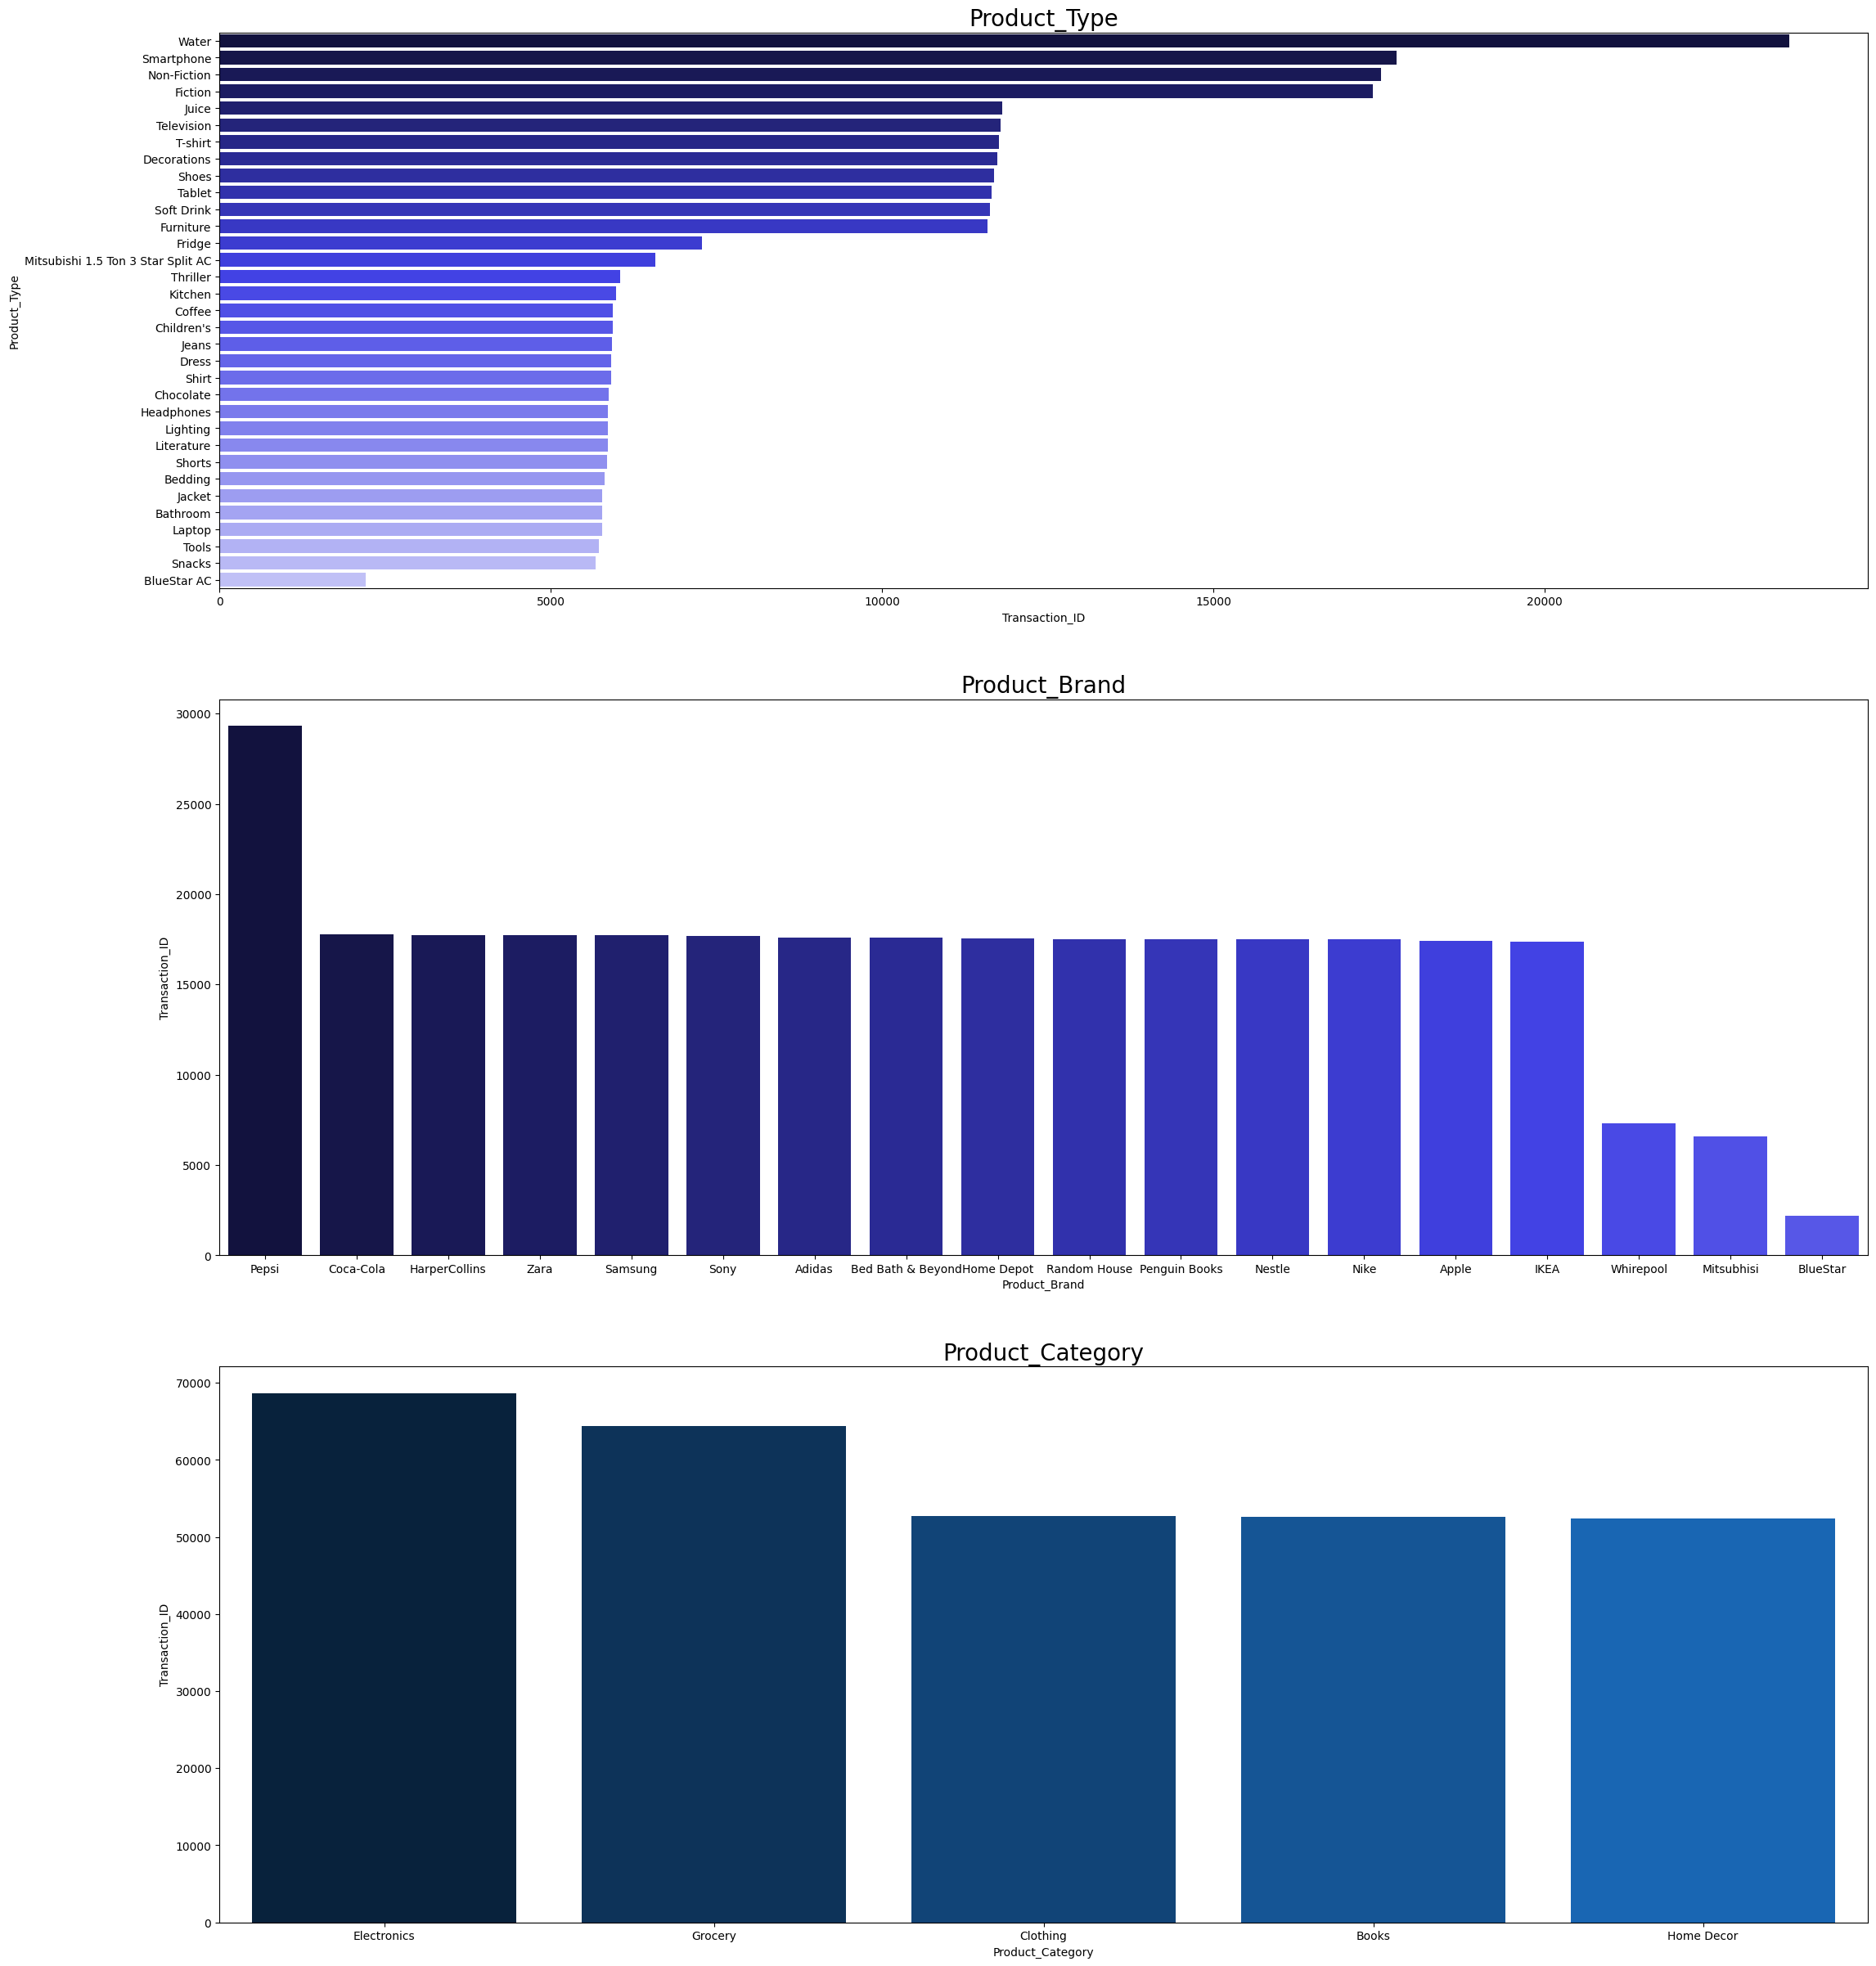

In [39]:
columns = ['Product_Type','Product_Brand','Product_Category']

colors = [
    "#0B0B45", "#0D0D52", "#0F0F60", "#11116D", "#13137B", "#151589", "#171797", "#1919A5",
    "#1B1BB2", "#1D1DC0", "#1F1FCD", "#2121DB", "#2323E9", "#2525F7", "#2727FF", "#2F2FFF",
    "#3737FF", "#3F3FFF", "#4747FF", "#4F4FFF", "#5757FF", "#5F5FFF", "#6767FF", "#6F6FFF",
    "#7777FF", "#7F7FFF", "#8787FF", "#8F8FFF", "#9797FF", "#9F9FFF", "#A7A7FF", "#AFAFFF",
    "#B7B7FF"
]

colors_five = ["#002244", "#003366", "#004488", "#0055AA", "#0066CC"]


fig, ax = plt.subplots(nrows=len(columns), ncols=1,figsize=(26,30))
for i in range(len(columns)):
    Product = df.groupby(by=columns[i],as_index=False).agg({
            'Transaction_ID' : 'nunique'
        }).sort_values(by='Transaction_ID',ascending=False)
    if i == 0:
        sns.barplot(y=columns[i],x='Transaction_ID',data=Product,palette=colors,ax=ax[i])
    elif i == 1:
        sns.barplot(x=columns[i],y='Transaction_ID',data=Product,palette=colors,ax=ax[i])
    else:
        sns.barplot(x=columns[i],y='Transaction_ID',data=Product,palette=colors_five,ax=ax[i])
    ax[i].set_title(columns[i],fontsize=20)
plt.show()

  Product_Category  Transaction_ID  Total_Purchases  Total_Amount
2      Electronics           69365         372007.0  9.501178e+07
3          Grocery           65126         348823.0  8.896615e+07
1         Clothing           53282         286193.0  7.293347e+07
0            Books           53199         284701.0  7.272673e+07
4       Home Decor           52939         283599.0  7.234013e+07


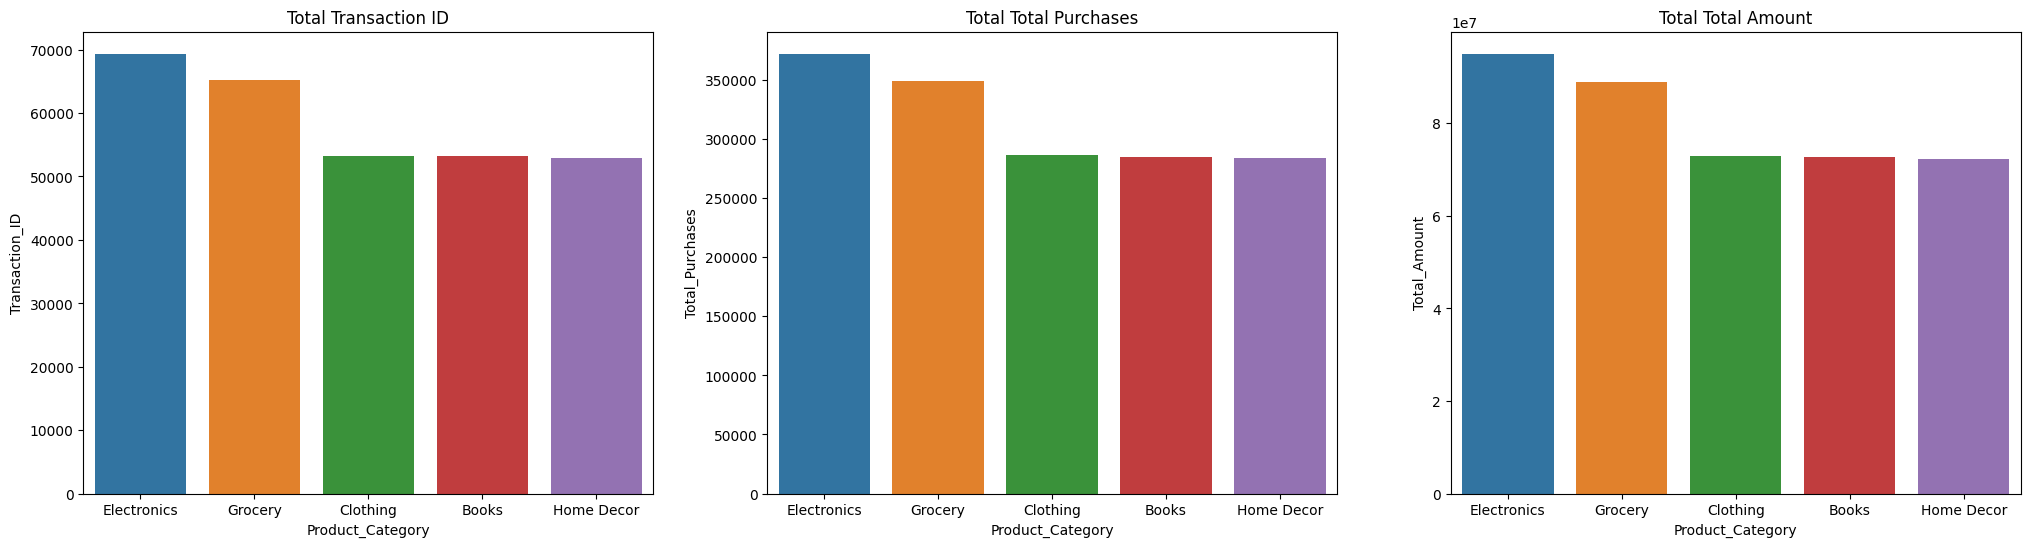

In [287]:
bar_sum_purchases_amount(df,'Product_Category',25,6)

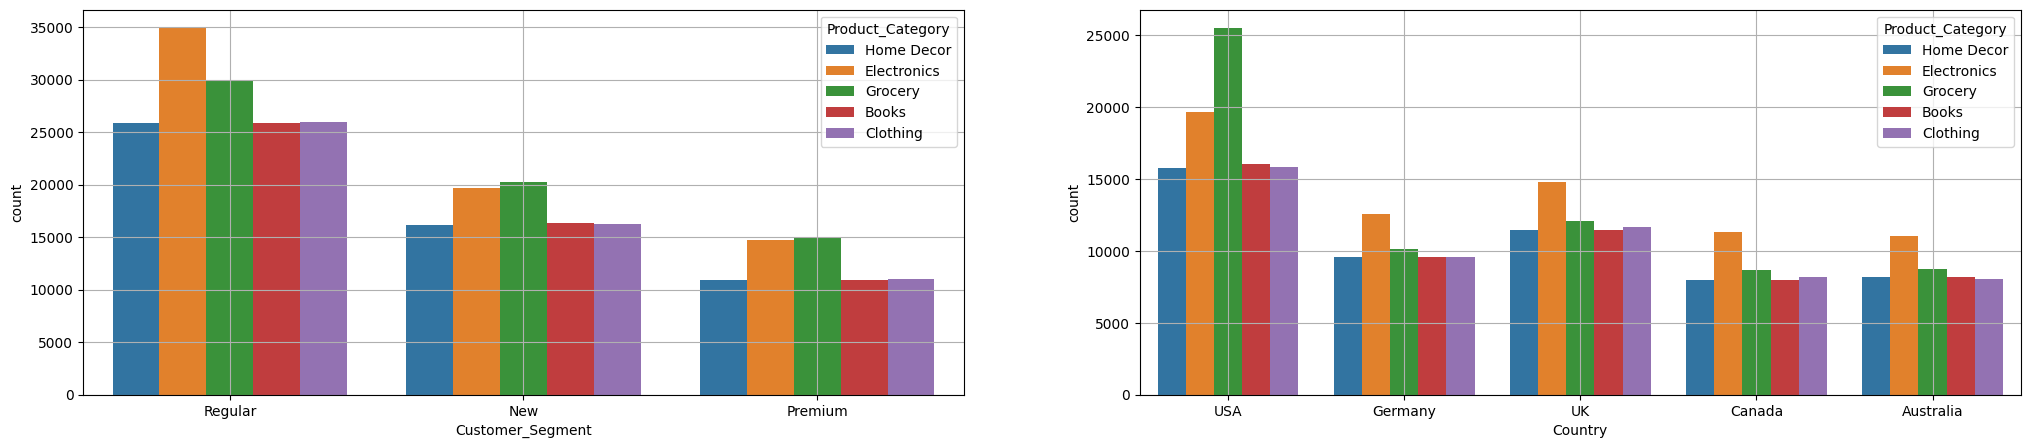

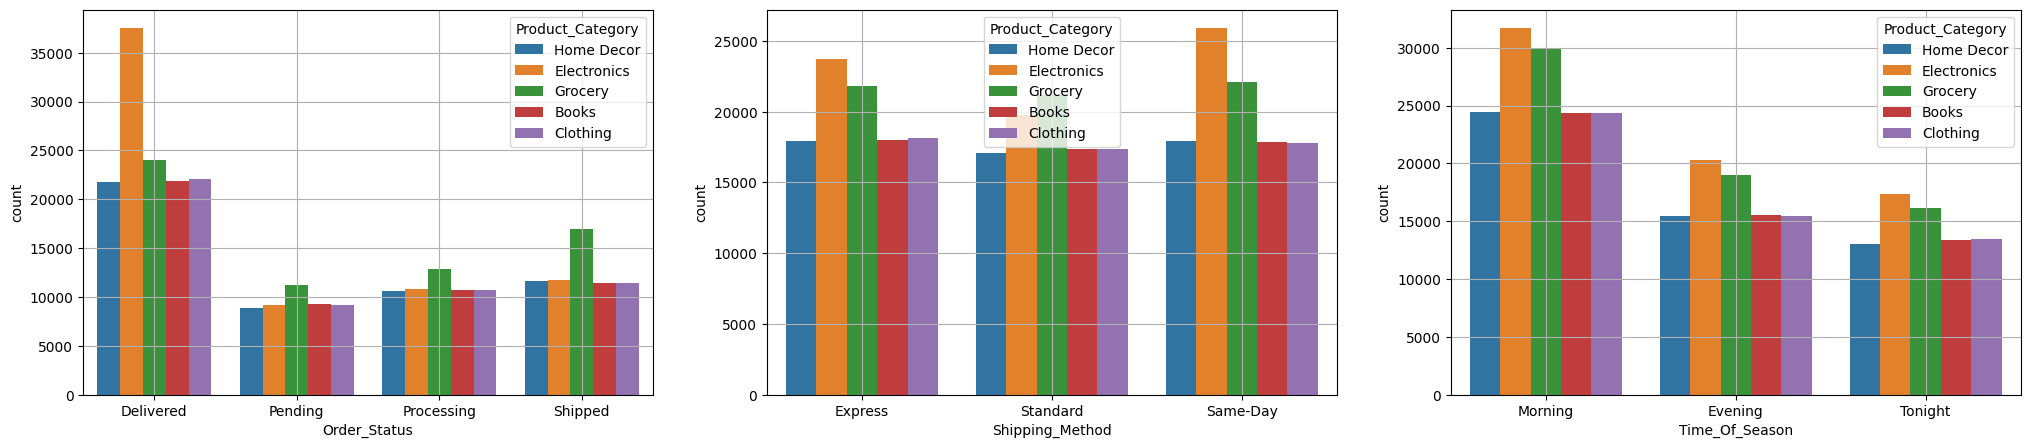

In [419]:
geo = ['Customer_Segment','Country']
method = ['Order_Status','Shipping_Method','Time_Of_Season']
x__ = [geo,method]
for i in x__:
    bar_group(i,df,'Product_Category')

## TOP 5 Products Based on Product Category

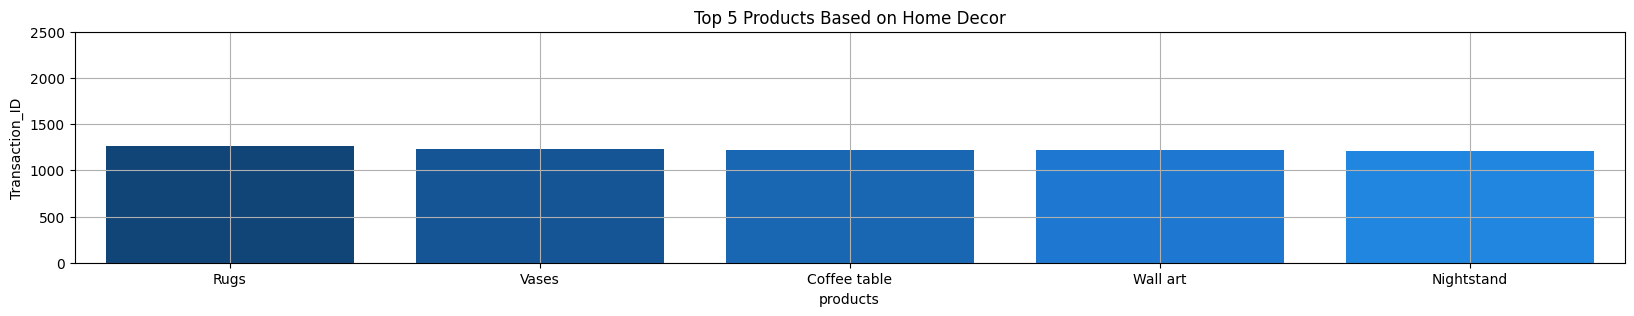

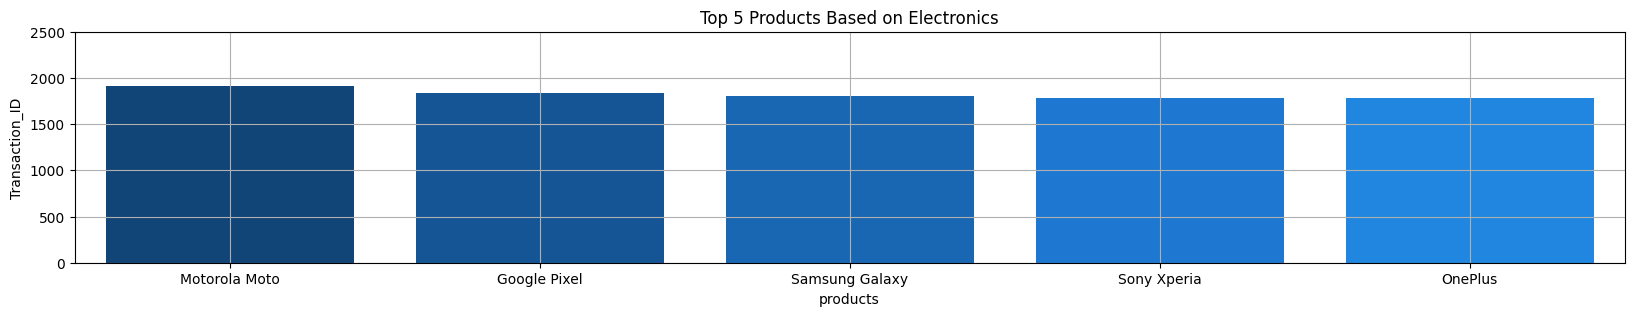

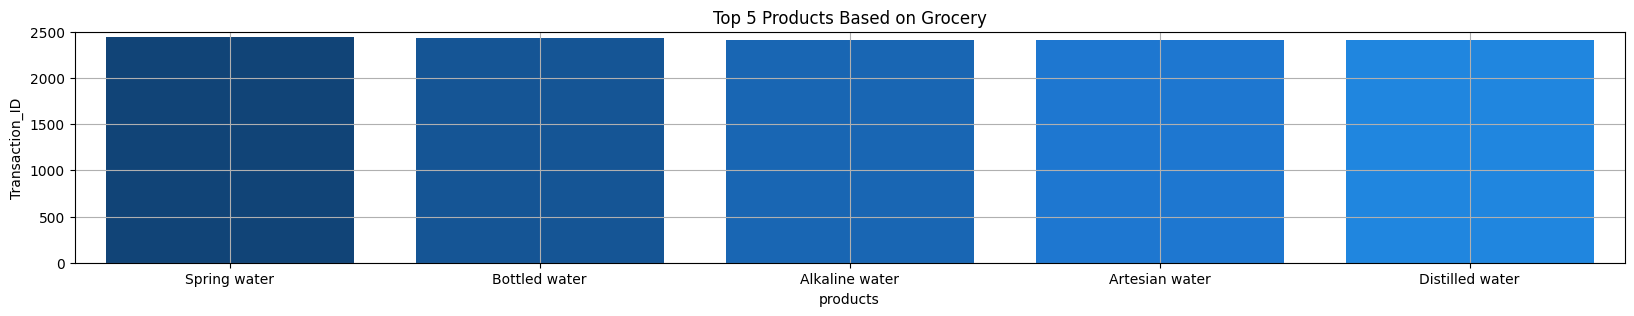

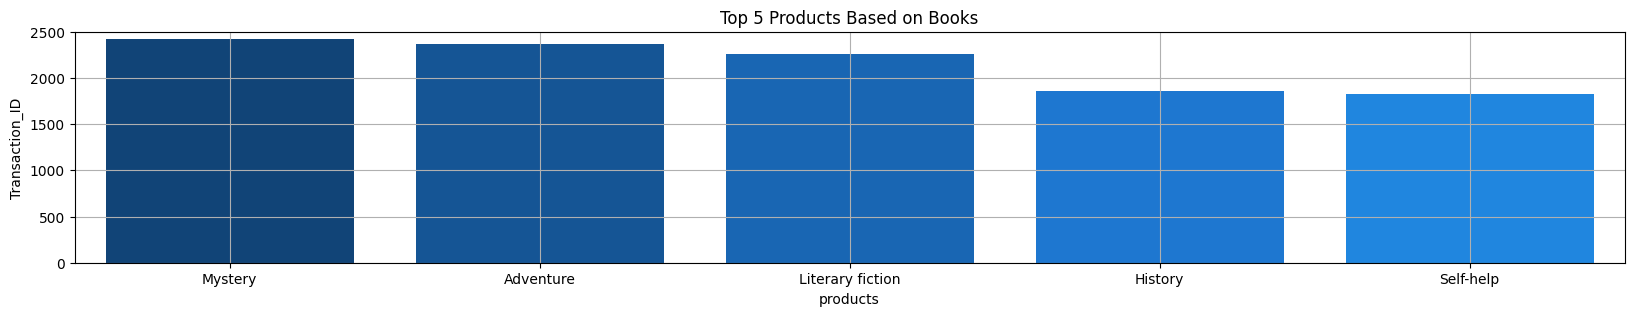

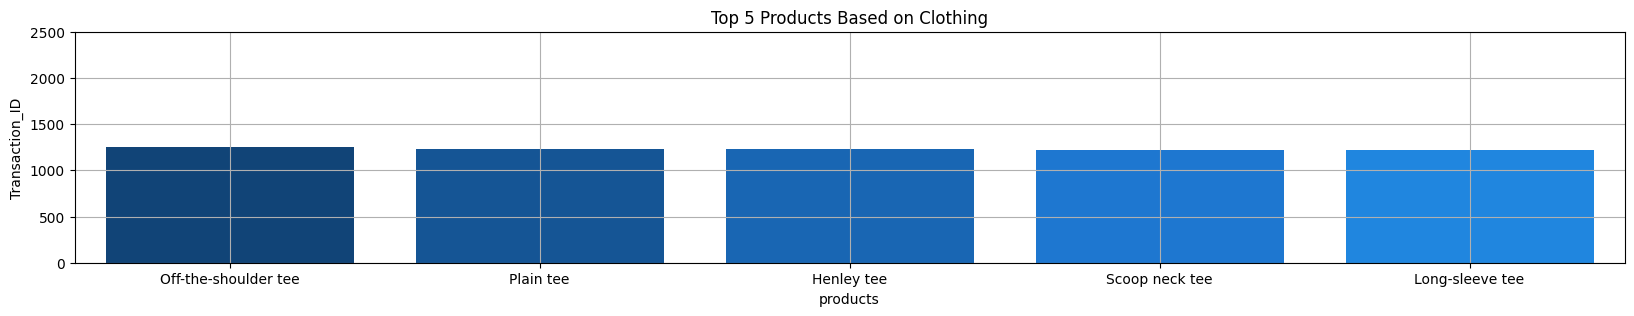

In [40]:
colors = ["#004488", "#0055AA", "#0066CC", "#0077EE", "#0088FF"]
def TOP_5(ascending):
    title = 'Down'
    if ascending == False:
        title = 'Top'
    for category in df['Product_Category'].unique():
        plt.figure(figsize=(20,3))
        data = df[df['Product_Category']==category]
        categories = data.groupby(by='products').Transaction_ID.count().sort_values(ascending=ascending).reset_index().head(5)
        sns.barplot(x='products',y='Transaction_ID',data=categories,palette=colors)
        plt.title(f"{title} 5 Products Based on {category}")
        plt.grid(True)
        plt.ylim(0,2500)
TOP_5(False)

Furniture: Kategori furniture memiliki variasi produk dengan jumlah transaksi yang hampir sama, dengan "Rugs" sebagai yang paling banyak terjual.

Smartphones: "Motorola Moto" adalah produk smartphone terlaris, diikuti oleh "Google Pixel" dan "Samsung Galaxy," dengan "Sony Xperia" dan "OnePlus" berada di posisi yang sama.

Water Types: "Spring water" adalah jenis air terlaris, diikuti oleh "Bottled water," "Alkaline water," "Artesian water," dan "Distilled water," yang memiliki jumlah transaksi sangat mendekati satu sama lain.

Books: "Mystery" adalah genre buku terlaris, diikuti oleh "Adventure" dan "Literary fiction," sementara "History" dan "Self-help" memiliki jumlah transaksi yang sedikit lebih rendah.

T-shirts: "Off-the-shoulder tee" dan "Plain tee" adalah t-shirt terlaris, diikuti oleh "Henley tee," "Scoop neck tee," dan "Long-sleeve tee" dengan jumlah transaksi yang serupa.g-sleeve tee            1223

## Down 5 Products Based on Product Category

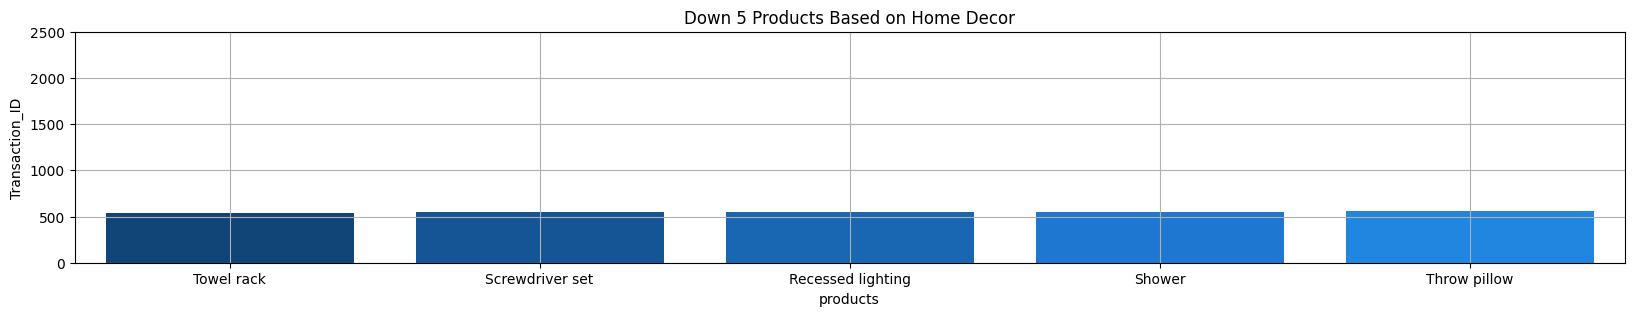

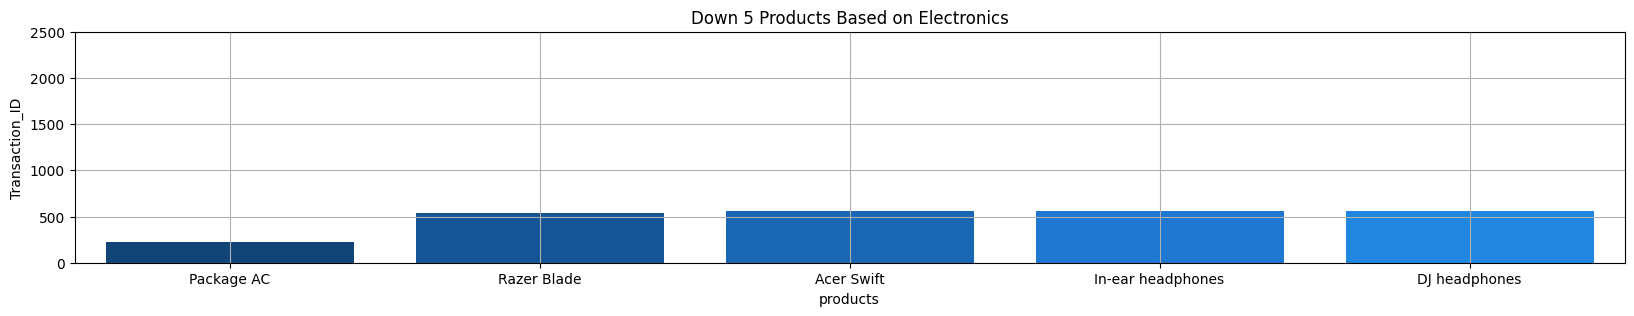

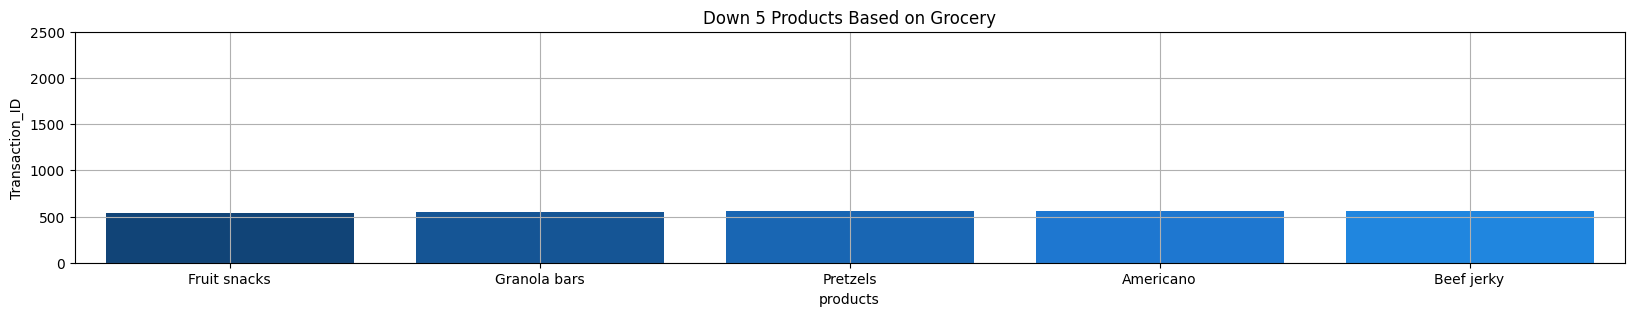

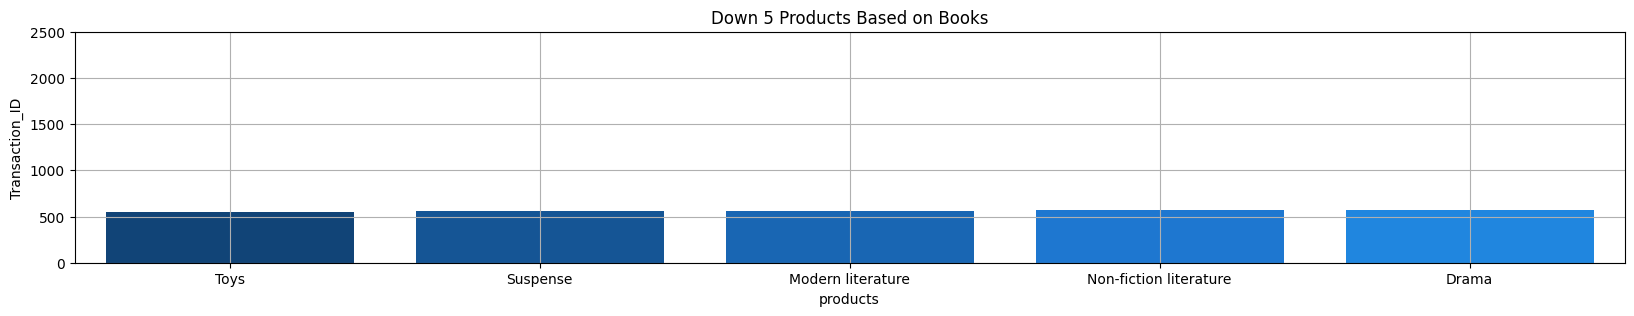

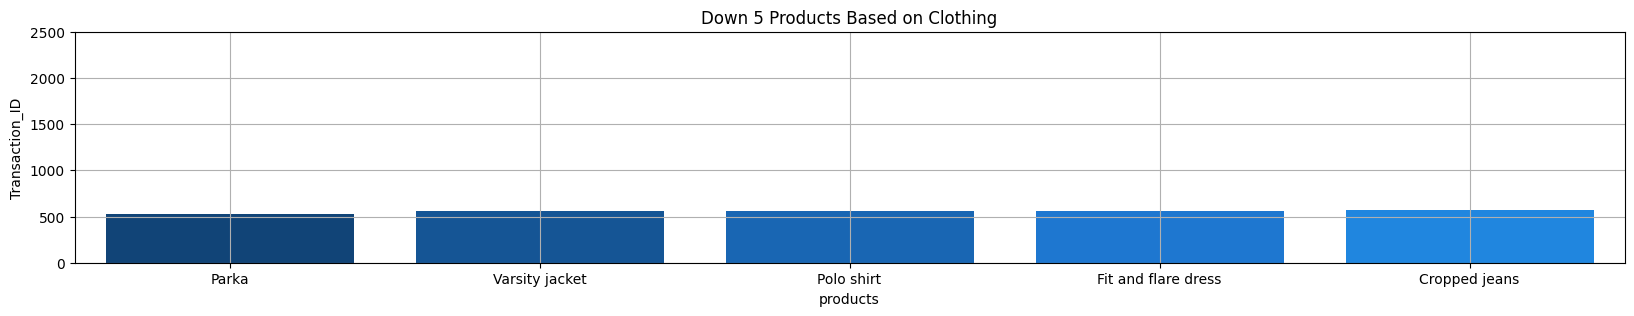

In [41]:
TOP_5(True)

Furniture: "Towel rack" memiliki transaksi paling sedikit, diikuti oleh produk lainnya dengan jumlah transaksi yang hampir serupa.

Electronics: "Package AC" memiliki jumlah transaksi yang jauh lebih rendah dibandingkan produk lainnya, sementara "DJ headphones" memiliki jumlah transaksi tertinggi di kategori ini.

Snacks and Beverages: "Fruit snacks" memiliki transaksi paling sedikit, sementara "Beef jerky" adalah yang terlaris di kategori ini.

Books: "Toys" memiliki transaksi paling sedikit, sementara "Drama" adalah genre buku terlaris di kategori ini.

Clothing: "Parka" memiliki transaksi paling sedikit, sementara "Cropped jeans" memiliki jumlah transaksi tertinggi di kategori ini.

In [42]:
unik_amount = {
    'Products' : [],
    'Count Of Unik Amount' : [],
}
for i in df['products'].unique():
    unik_amount['Products'].append(i)
    data = df[df['products']==i]
    unik_amount['Count Of Unik Amount'].append(data['Amount'].nunique())

unik_amount = pd.DataFrame(unik_amount)
unik_amount.sort_values(by='Count Of Unik Amount',ascending=False)

Products  Count Of Unik Amount
27      Spring water                  2440
5      Bottled water                  2427
74           Mystery                  2423
24    Alkaline water                  2409
23   Distilled water                  2407
..               ...                   ...
283       Towel rack                   542
274     Fruit snacks                   541
212      Razer Blade                   539
290            Parka                   530
307       Package AC                   220

[318 rows x 2 columns]

Ternyata Banyak sekali variasi Harga untuk setiap produk. variasi Harga ini memungkinkan karena ada banyak perbedaan lokasi

In [43]:
def max_produk(dataframe,column,produk,groupby):
    high_produk = {
    'Season': [],
    'produk': [],
    f"Max {column.replace('_',' ',1)}": [],
    }
    max_value = dataframe[column][0]
    product = dataframe[produk][0]
    for i in range(1, len(dataframe)):
        if dataframe[groupby][i-1] != dataframe[groupby][i]:
            high_produk['Season'].append(dataframe[groupby][i-1])
            high_produk[f"Max {column.replace('_',' ',1)}"].append(max_value)
            high_produk['produk'].append(product)
            max_value = dataframe[column][i]
            product = dataframe[produk][i]
        else:
            if max_value < dataframe[column][i]:
                max_value = dataframe[column][i]
                product = dataframe[produk][i]
    high_produk['Season'].append(dataframe[groupby].iloc[-1])
    high_produk[f"Max {column.replace('_',' ',1)}"].append(max_value)
    high_produk['produk'].append(product)
    return pd.DataFrame(high_produk)

Kode di atas merupakan sebuah fungsi Python bernama max_produk yang digunakan untuk mengidentifikasi produk dengan nilai maksimum dalam sebuah kolom tertentu, yang dikelompokkan berdasarkan suatu kategori (misalnya, musim atau kategori lainnya). 

In [44]:
high_produk = max_produk(df,'Total_Amount','products','years_month')
high_produk

Season             produk  Max Total Amount
0   03-2023     Alkaline water       4995.606078
1   04-2023        Floor lamps       4996.551977
2   05-2023               Cola       4996.761373
3   06-2023         Android TV       4999.625796
4   07-2023            Cooking       4998.723479
5   08-2023     Leather jacket       4999.340097
6   09-2023        Swim trunks       4997.825092
7   10-2023  Chocolate cookies       4997.433413
8   11-2023        Mango juice       4999.171428
9   12-2023    Science fiction       4997.986042
10  01-2024  Floor-standing AC       4998.204389
11  02-2024               Desk       4996.577135

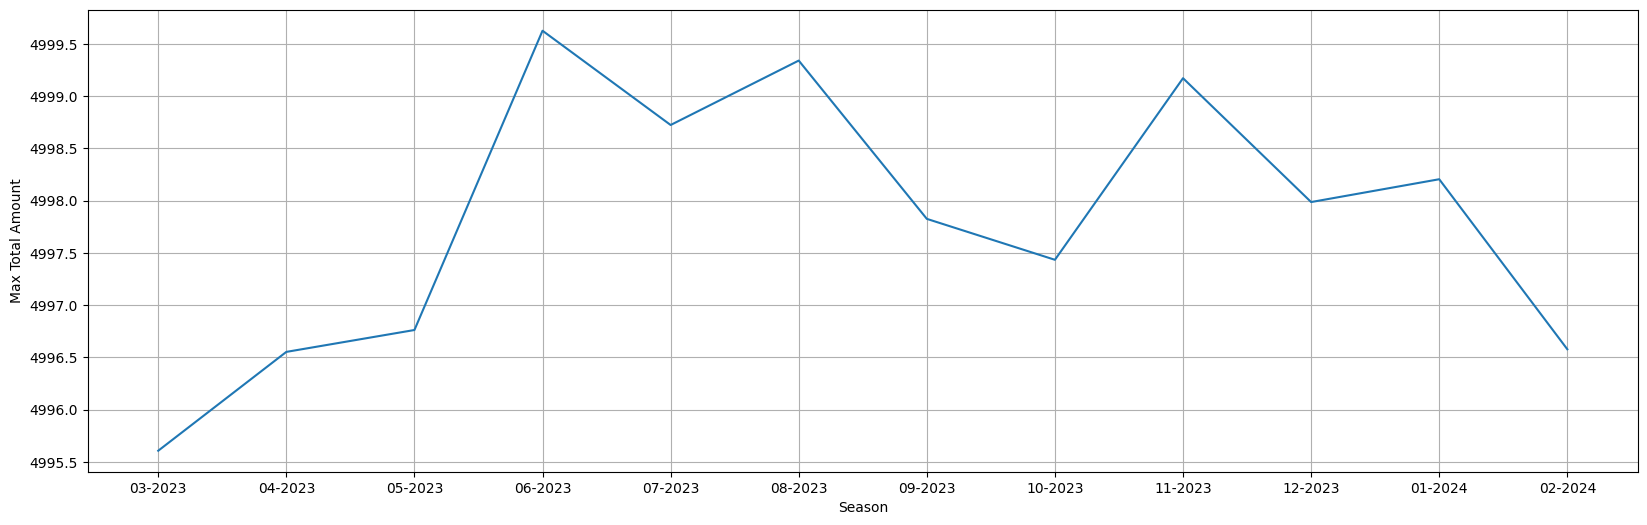

In [45]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Season',y='Max Total Amount', data=high_produk)
plt.grid(True)
plt.show()

Saya mencoba mengidentifikasi Momen Penjualan tertinggi untuk setiap hari dan di group setiap bulan nya. dan dapat kita ketahui puncak tertinggi pada bukan 6.

# Shipping Method Analysis

  Shipping_Method  Transaction_ID  Total_Purchases  Total_Amount
1        Same-Day          101541         544631.0  1.388056e+08
0         Express           99600         534367.0  1.363776e+08
2        Standard           92770         496325.0  1.267951e+08


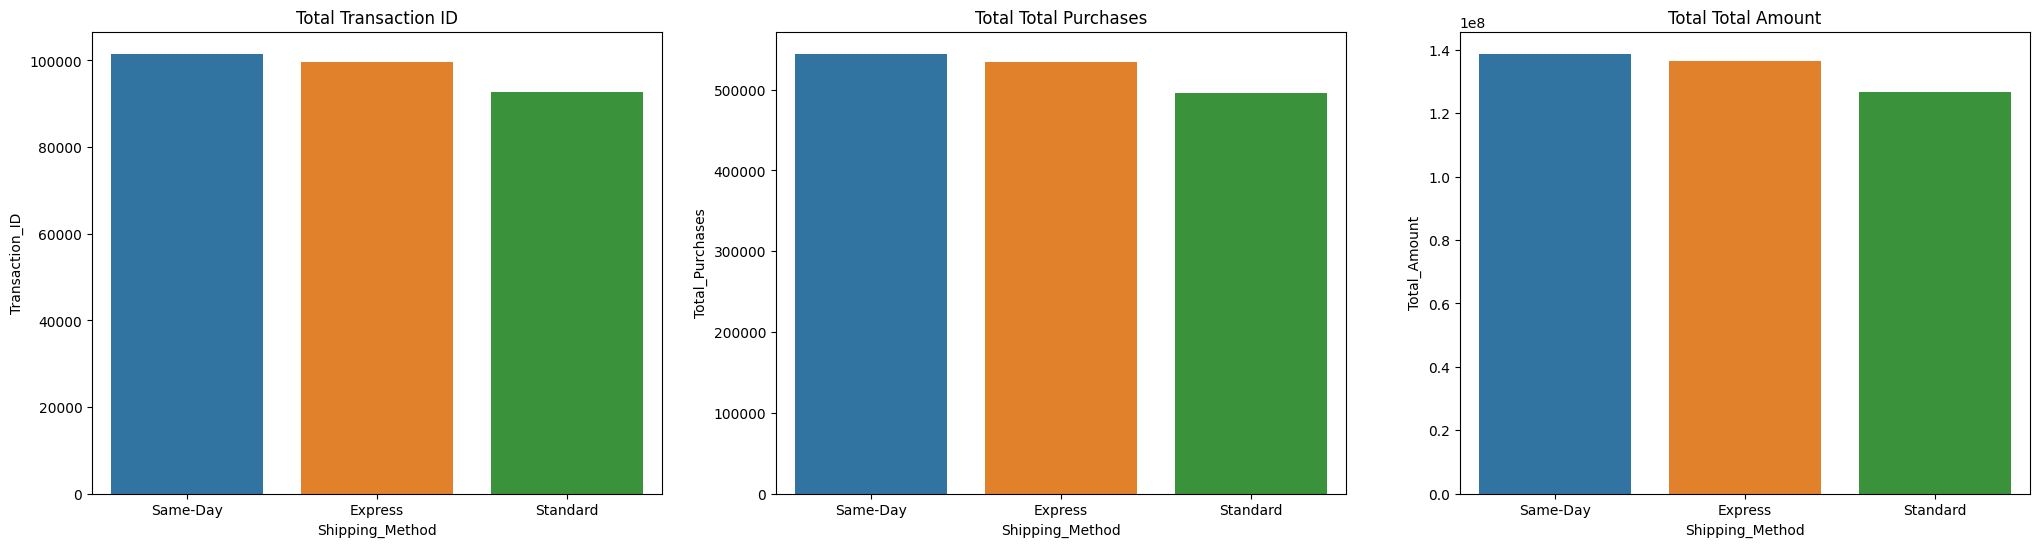

In [288]:
bar_sum_purchases_amount(df,'Shipping_Method',25,6)

### Metode Pengiriman:

Metode "Express" cenderung paling sering digunakan di hampir semua kategori, terutama dalam segmen pelanggan Regular, negara USA, dan metode pembayaran dengan Credit Card.

Metode "Standard" juga cukup populer tetapi sedikit lebih rendah dibanding "Express" di sebagian besar kategori.

Metode "Same-Day" memiliki jumlah yang paling sedikit di sebagian besar kategori, menunjukkan bahwa pelanggan cenderung memilih metode pengiriman yang lebih cepat atau lebih murah.


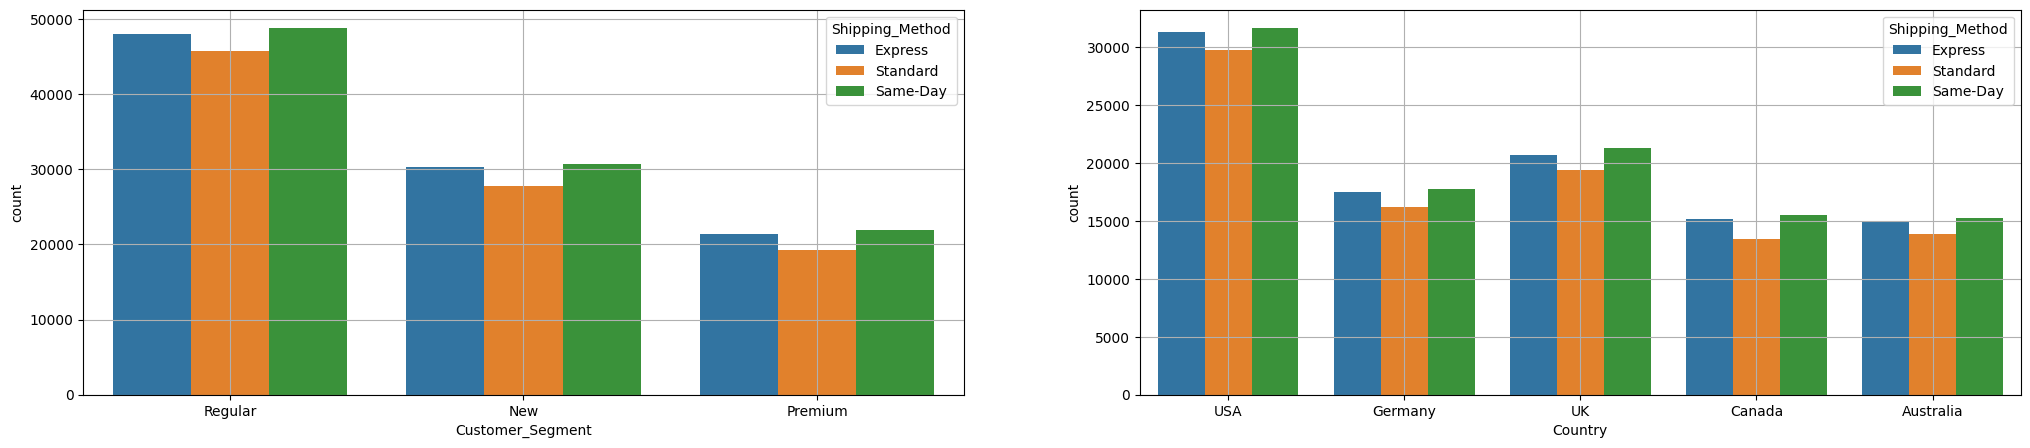

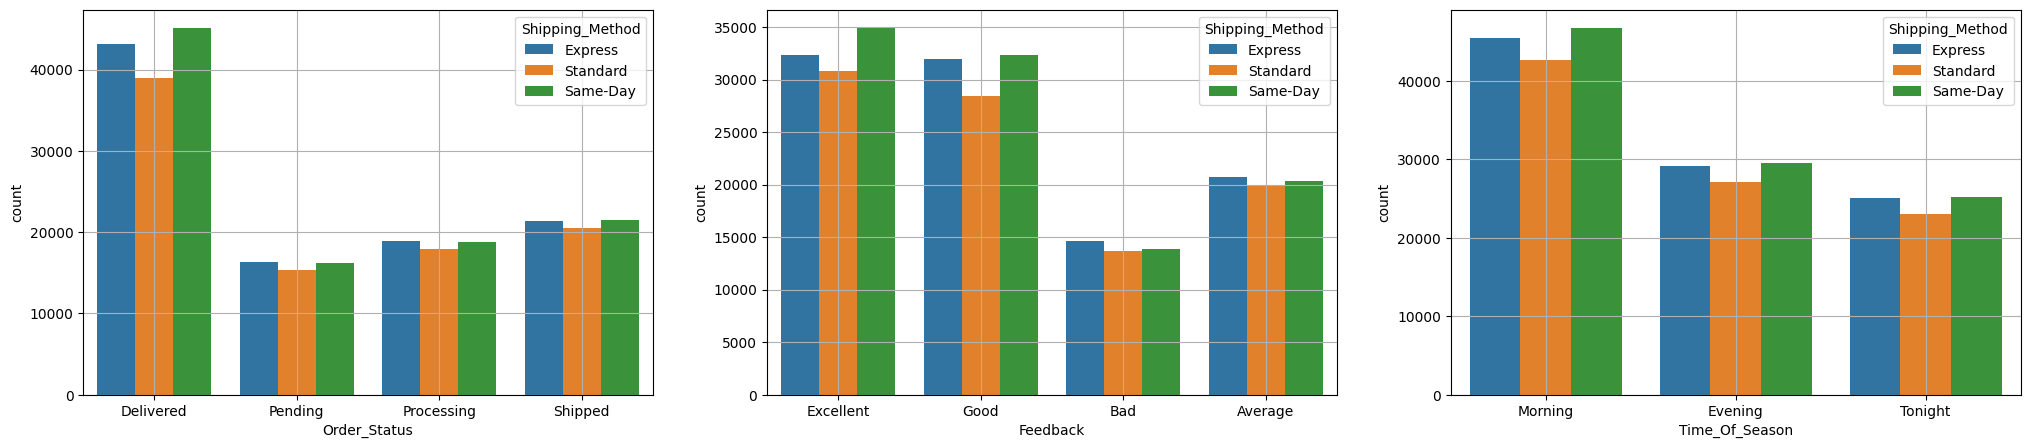

In [47]:
geo = ['Customer_Segment','Country']
method = ['Order_Status','Feedback','Time_Of_Season']
x__ = [geo,method]
for i in x__:
    bar_group(i,df,'Shipping_Method')

#### Segmen Pelanggan:
Pelanggan dalam segmen Regular dan Premium memiliki jumlah pesanan yang lebih tinggi dibandingkan dengan segmen New. Ini mungkin menunjukkan loyalitas yang lebih tinggi atau volume pembelian yang lebih besar dari pelanggan yang sudah ada.

#### Negara:
Negara USA memiliki jumlah pesanan tertinggi, diikuti oleh Germany dan UK. Hal ini bisa menunjukkan pasar utama atau wilayah dengan konsentrasi pelanggan terbesar.

#### Status Pesanan:
Sebagian besar pesanan berada dalam status Delivered, dengan jumlah signifikan juga di status Pending dan Processing. Ini menunjukkan bahwa sebagian besar pesanan diselesaikan dengan baik, tetapi ada juga sejumlah pesanan yang masih dalam proses.

#### Umpan Balik:
Sebagian besar umpan balik berada di kategori Excellent dan Good, menunjukkan tingkat kepuasan pelanggan yang cukup tinggi. Namun, ada juga beberapa umpan balik Bad dan Average yang menunjukkan adanya area untuk peningkatan layanan.

#### Tahap Kehidupan dan Waktu Sesi:
Pelanggan di tahap Young Adulthood lebih banyak melakukan pesanan dibandingkan kategori umur lainnya, menunjukkan bahwa kelompok usia ini lebih aktif berbelanja.
Waktu sesi Morning memiliki jumlah pesanan tertinggi, diikuti oleh Evening. Ini mungkin menunjukkan preferensi pelanggan untuk berbelanja pada pagi hari.

# Payment Method Analysis

  Payment_Method  Transaction_ID  Total_Purchases  Total_Amount
1    Credit Card           87781         470671.0  1.202122e+08
2     Debit Card           74744         400574.0  1.022084e+08
0           Cash           71927         385290.0  9.831789e+07
3         PayPal           59459         318788.0  8.123968e+07


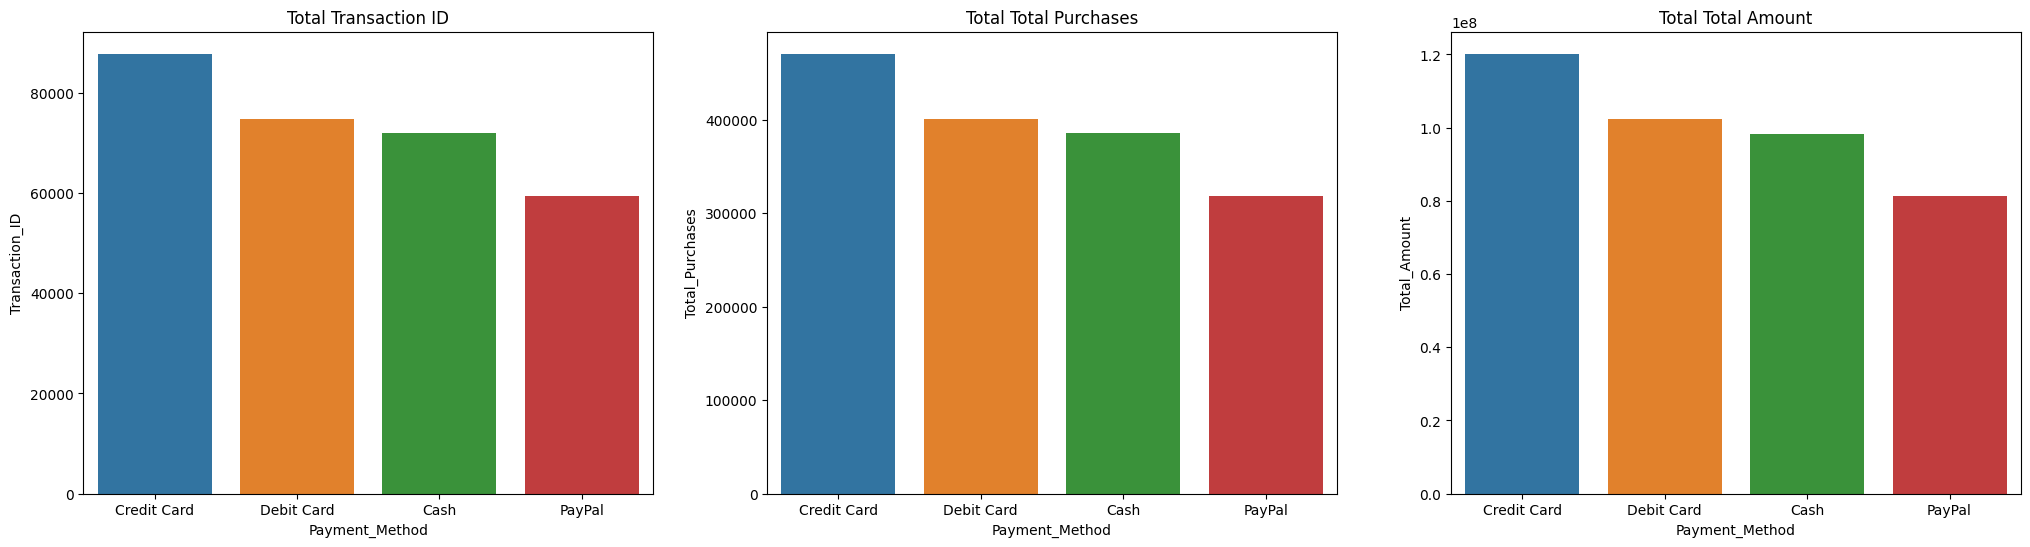

In [290]:
bar_sum_purchases_amount(df,'Payment_Method',25,6)

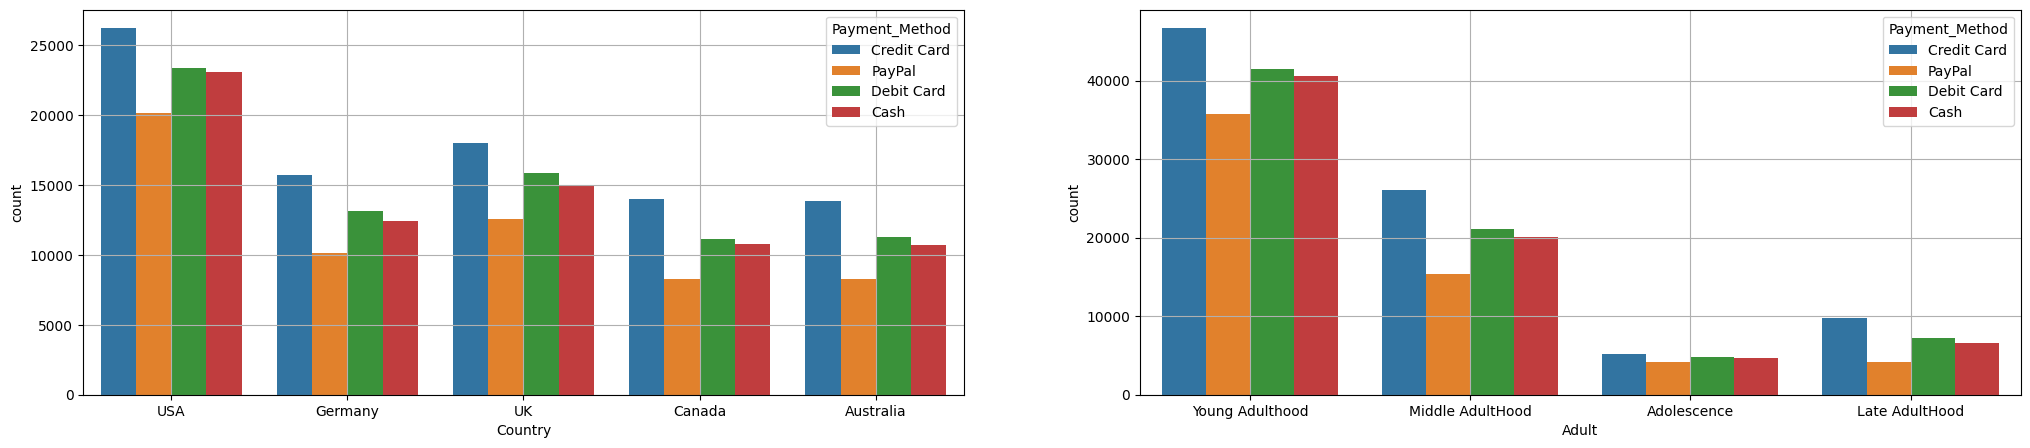

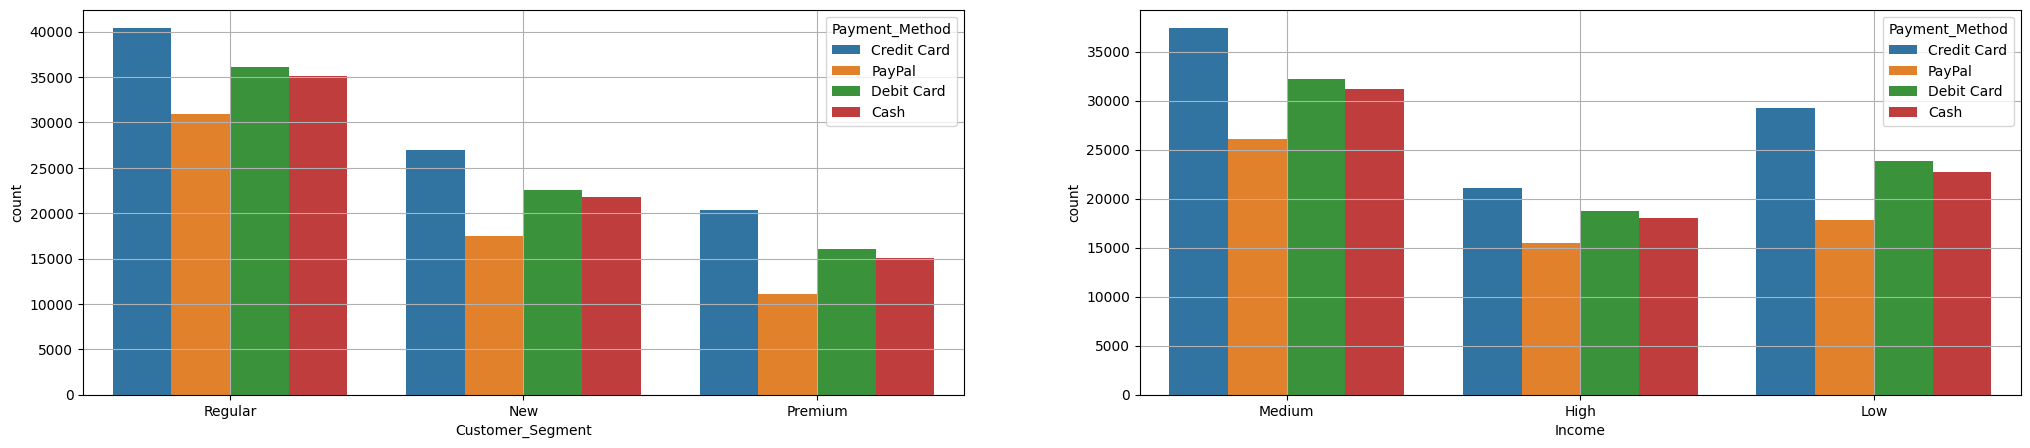

In [49]:
category_1 = ['Country','Adult']
segment = ['Customer_Segment','Income']
x__ = [category_1,segment]
for i in x__:
    bar_group(i,df,'Payment_Method')

## Kesimpulan

Kesimpulan Umum:
Metode pembayaran dengan kartu kredit adalah yang paling stabil dan dominan baik dalam jumlah pembelian maupun total nilai yang dibelanjakan. PayPal memiliki tren yang lebih bervariasi, yang mungkin mencerminkan perubahan dalam preferensi pelanggan atau promosi. Kartu debit dan tunai memiliki penggunaan yang lebih stabil tetapi dengan volume yang lebih rendah.

Ini menunjukkan bahwa kartu kredit tetap menjadi pilihan utama bagi banyak konsumen, sementara PayPal mungkin lebih dipengaruhi oleh faktor-faktor eksternal seperti promosi atau diskon.

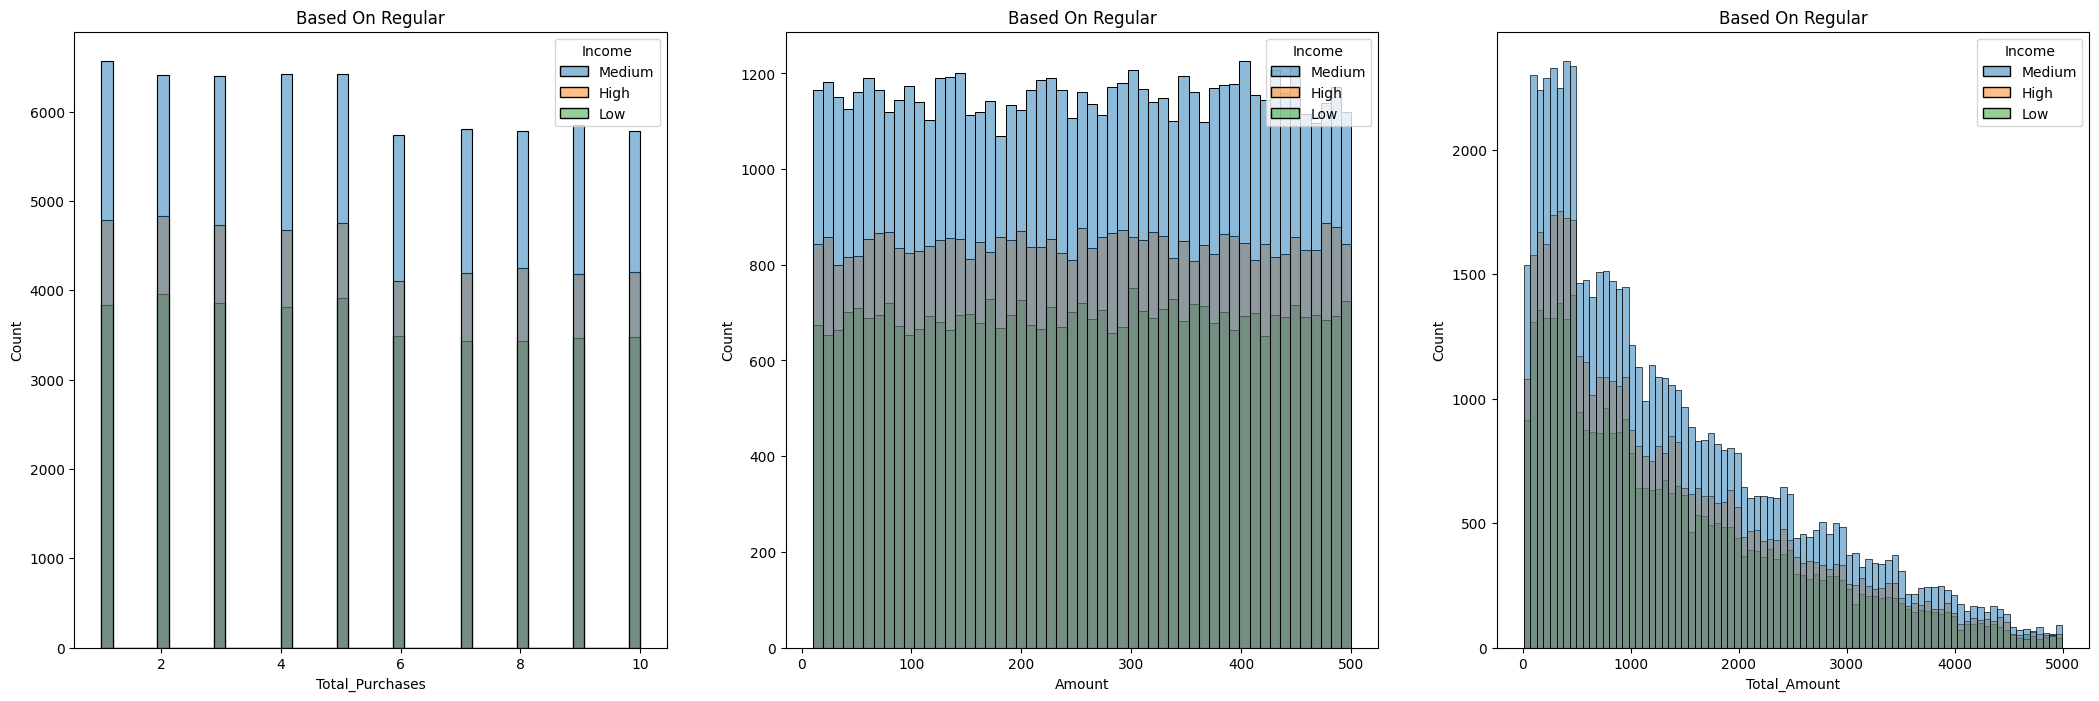

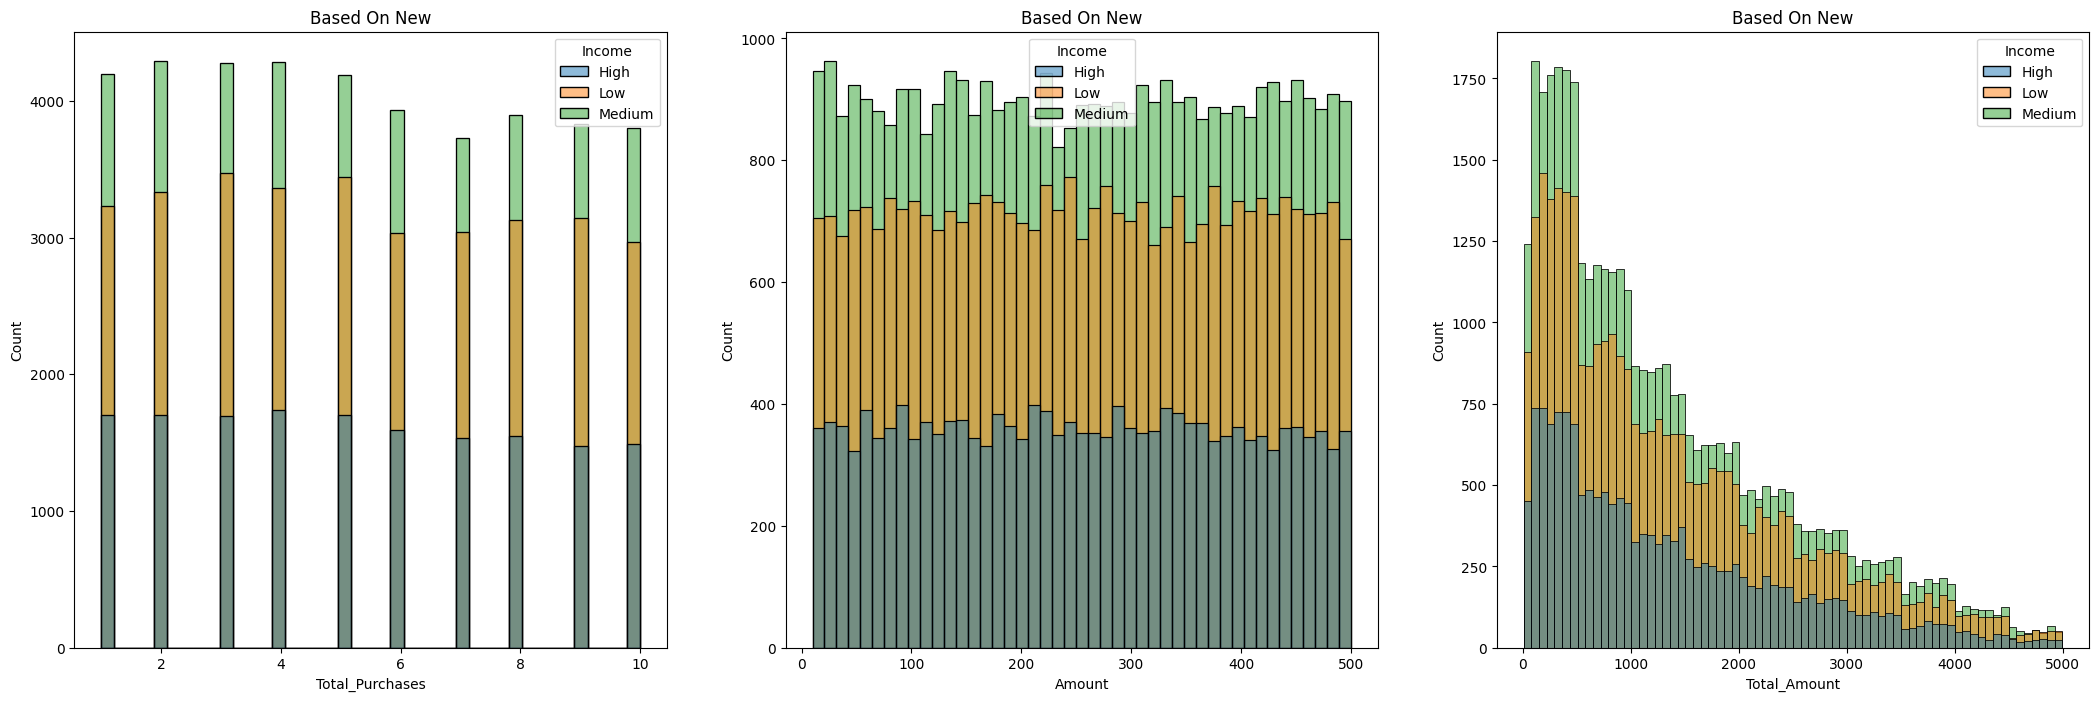

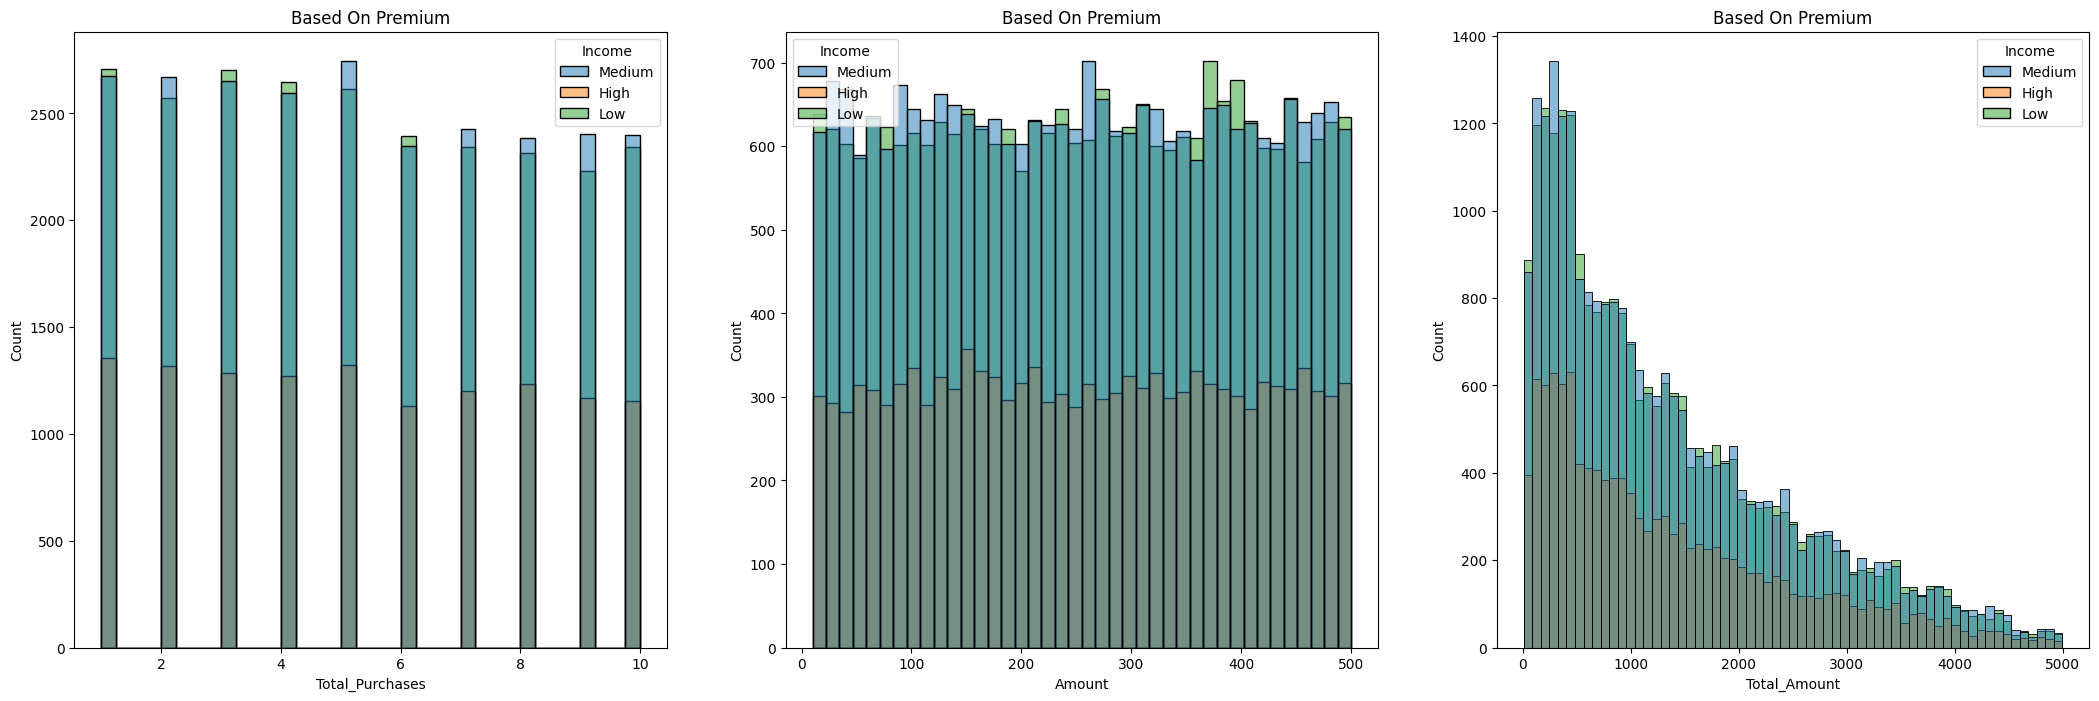

In [50]:
for segment in df['Customer_Segment'].unique():
    data_by_segement = df[df['Customer_Segment']==segment]
    fig, ax = plt.subplots(ncols=3,figsize=(26,8))
    data = ['Total_Purchases','Amount','Total_Amount'] 
    for j in range(len(data)):
        sns.histplot(x=data[j],hue='Income',data=data_by_segement,ax=ax[j])
        ax[j].set_title(f"Based On {segment}")

Kontribusi Berdasarkan Level Pendapatan.
bisa kita lihat ternyata level pendapatan menengah dan rendah sangatlah mencolok. terkhusus pada segmen customer baru. kontribusi mereka mendominasi seluruh rentang distribusi data. dan pada segmen premium relatif bercampur. Namun Uniknya, jumlah pendapatan menengah dan rendah lebih tinggi. secara keseluruhan data. menengah dan rendah mendominasi daripada income yang tinggi

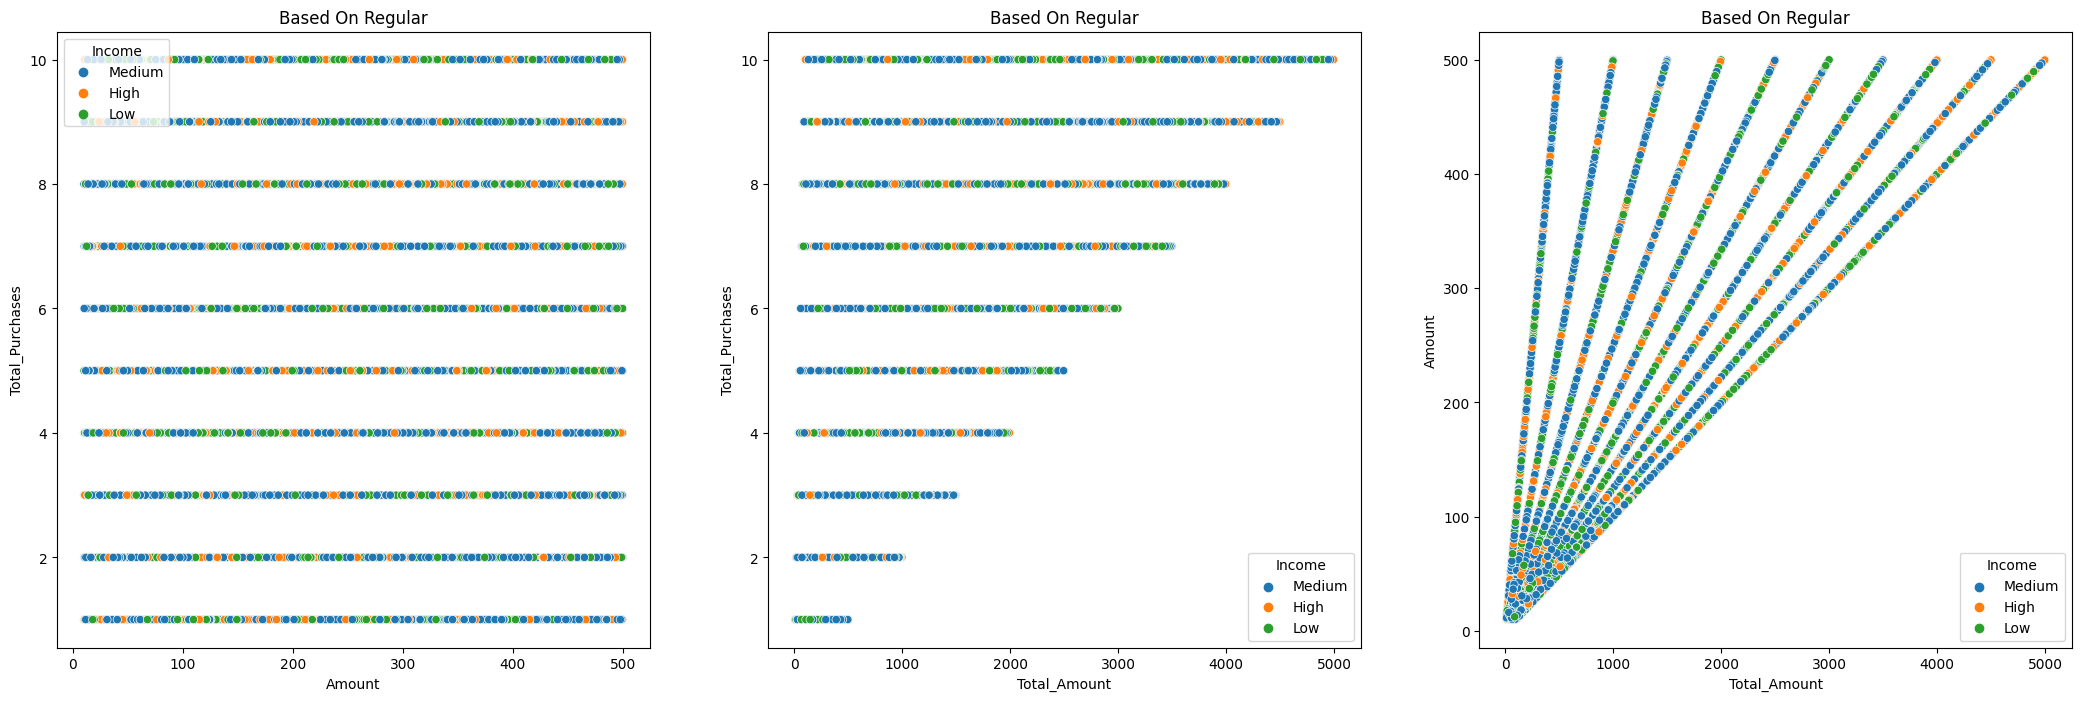

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


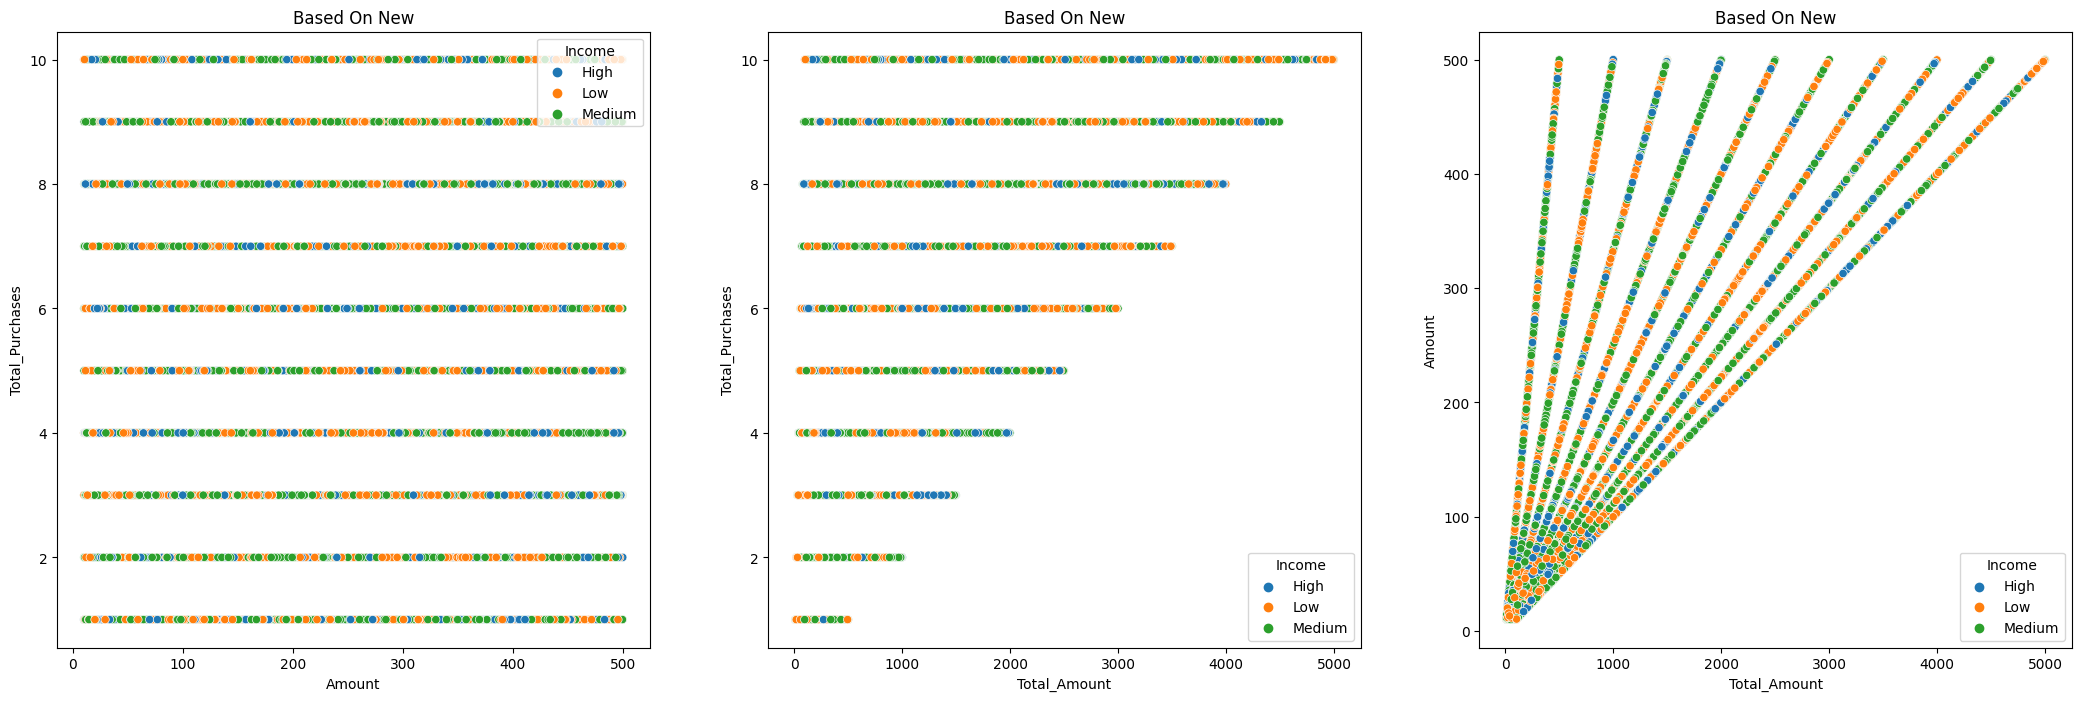

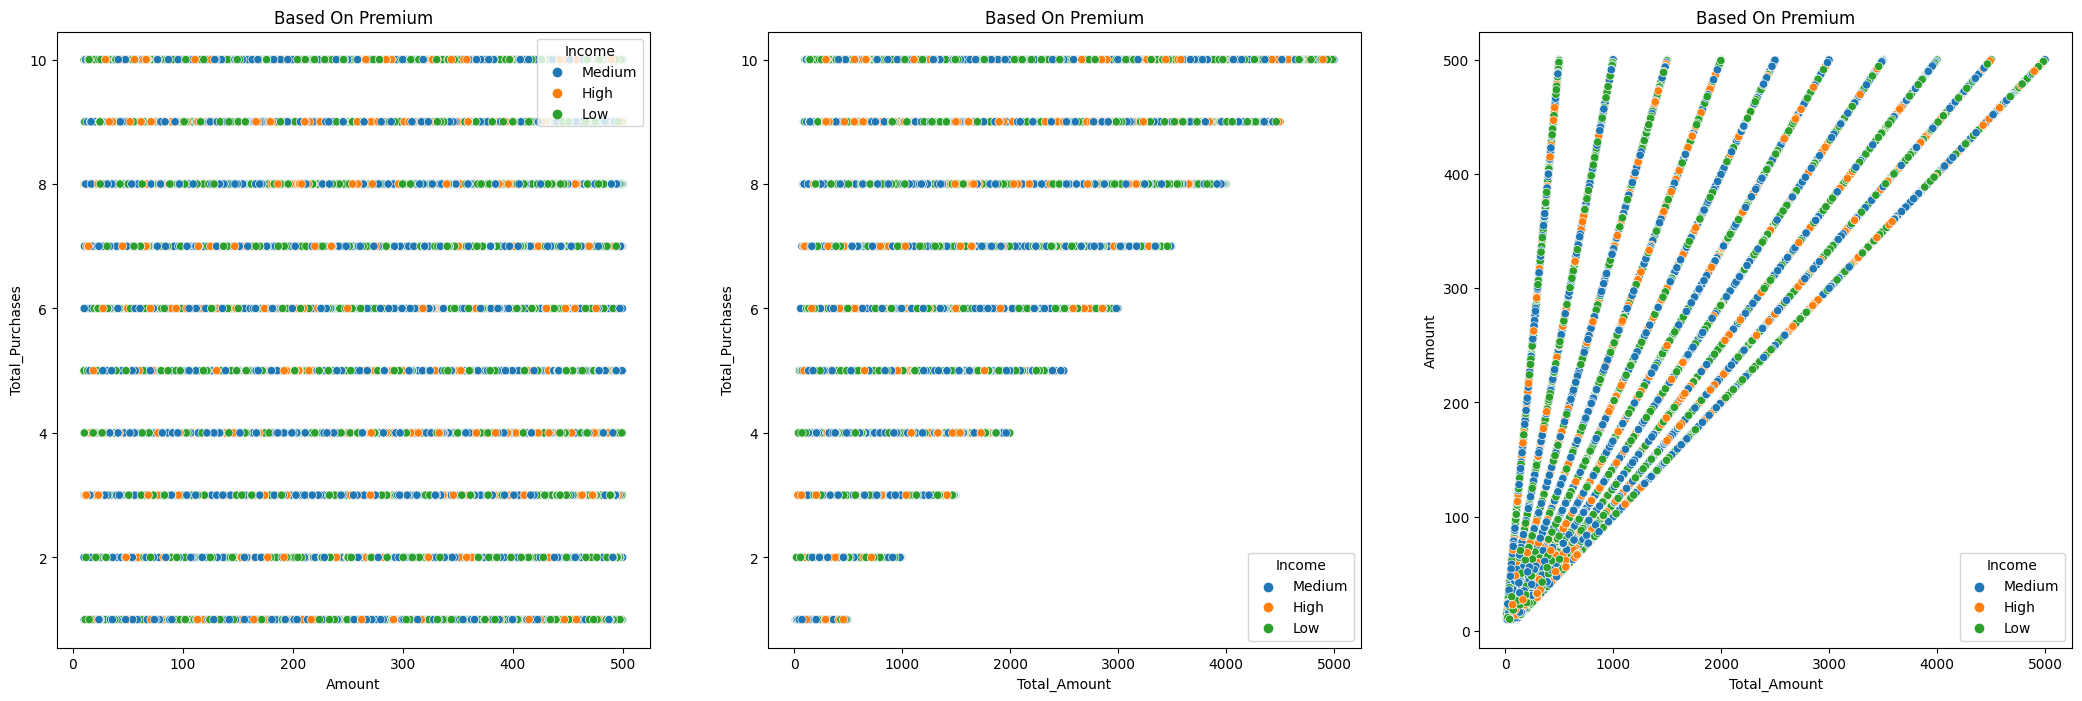

In [51]:
list = []
for segment in df['Customer_Segment'].unique():
    data_by_segement = df[df['Customer_Segment']==segment]
    fig, ax = plt.subplots(ncols=3,figsize=(26,8))
    index = 0
    for i in range(0,3):
        ada = True
        for j in range(0,3):
            if i == j:
                break
            for l in list:
                if l == [i,j] and l == [j,i]:
                    ada = False
            if ada == True:
                list.append([i,j])
                sns.scatterplot(x=data[i],y=data[j],hue='Income',data=data_by_segement,ax=ax[index])
                ax[index].set_title(f"Based On {segment}")
                index+=1

In [52]:
df[data].describe()

Total_Purchases         Amount   Total_Amount
count    293911.000000  293911.000000  293911.000000
mean          5.359864     255.153307    1367.686983
std           2.868440     141.388614    1128.895164
min           1.000000      10.000219      10.003750
25%           3.000000     132.839683     438.852849
50%           5.000000     255.463226    1041.164351
75%           8.000000     377.638576    2028.954272
max          10.000000     499.997911    4999.625796

## Bagaimana dengan seiring perkembangan berdasarkan Tren?

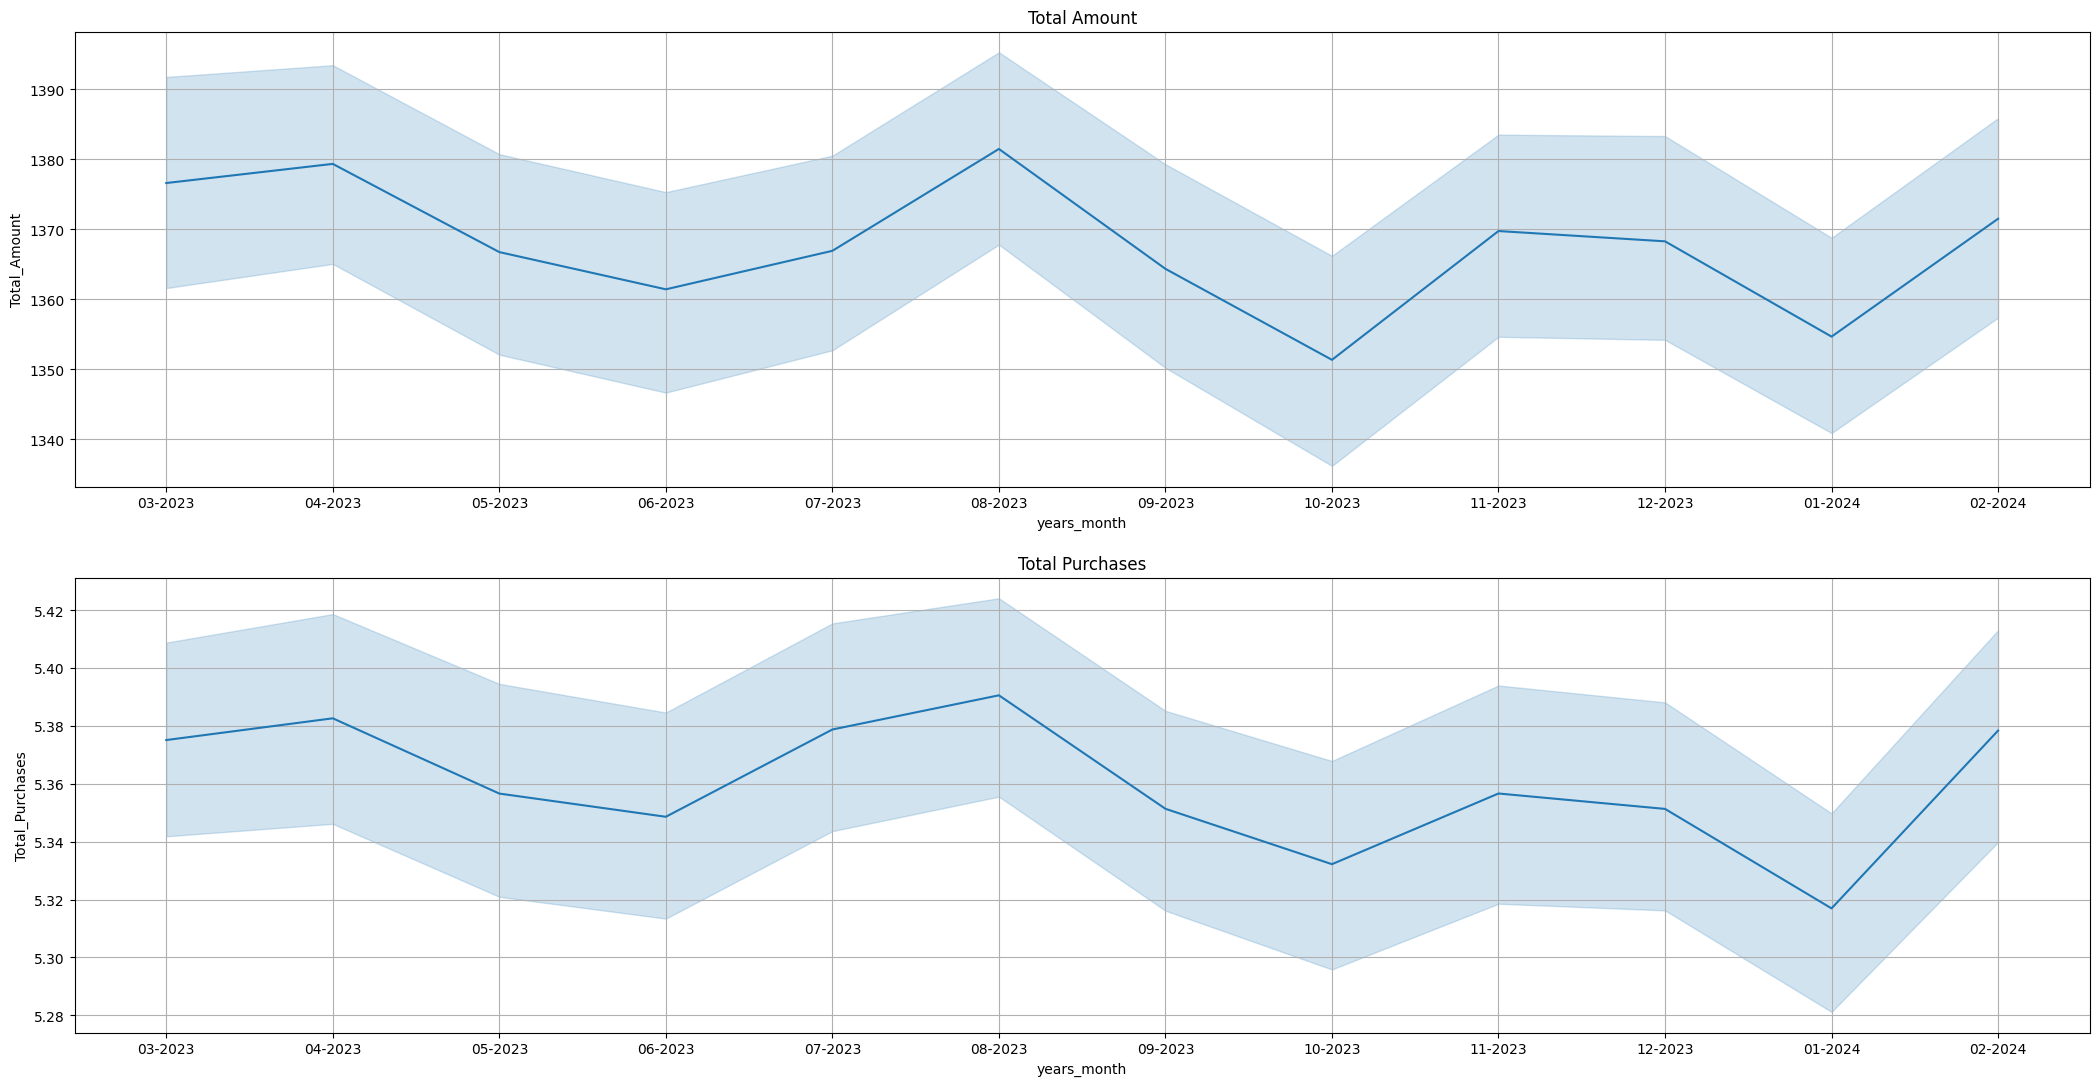

In [53]:
sum = ['Total_Amount','Total_Purchases']
fig, ax = plt.subplots(nrows=2,figsize=(26,13))
for i in range(len(sum)):
    sns.lineplot(x='years_month',y=sum[i], data=df,ax=ax[i])
    ax[i].set_title(sum[i].replace('_',' ',1))
    ax[i].grid(True)
plt.show()

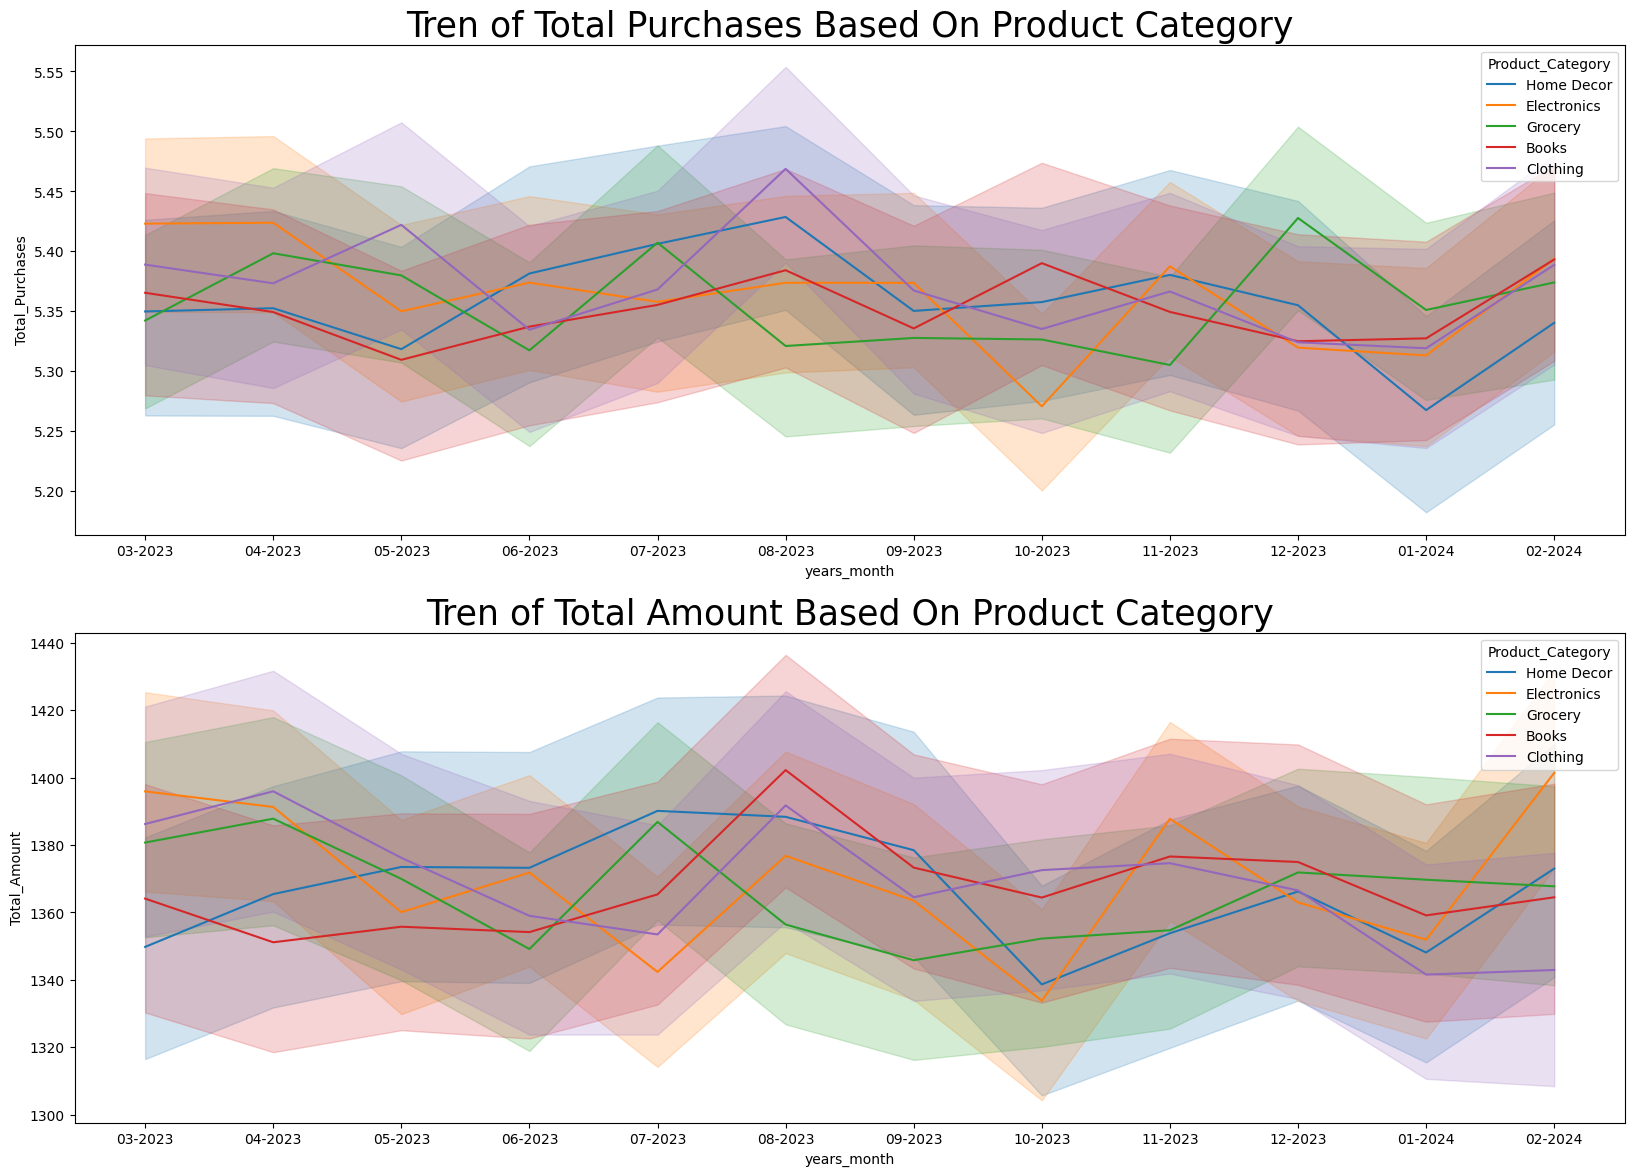

In [54]:
line_chart(hue='Product_Category',dataframe=df)

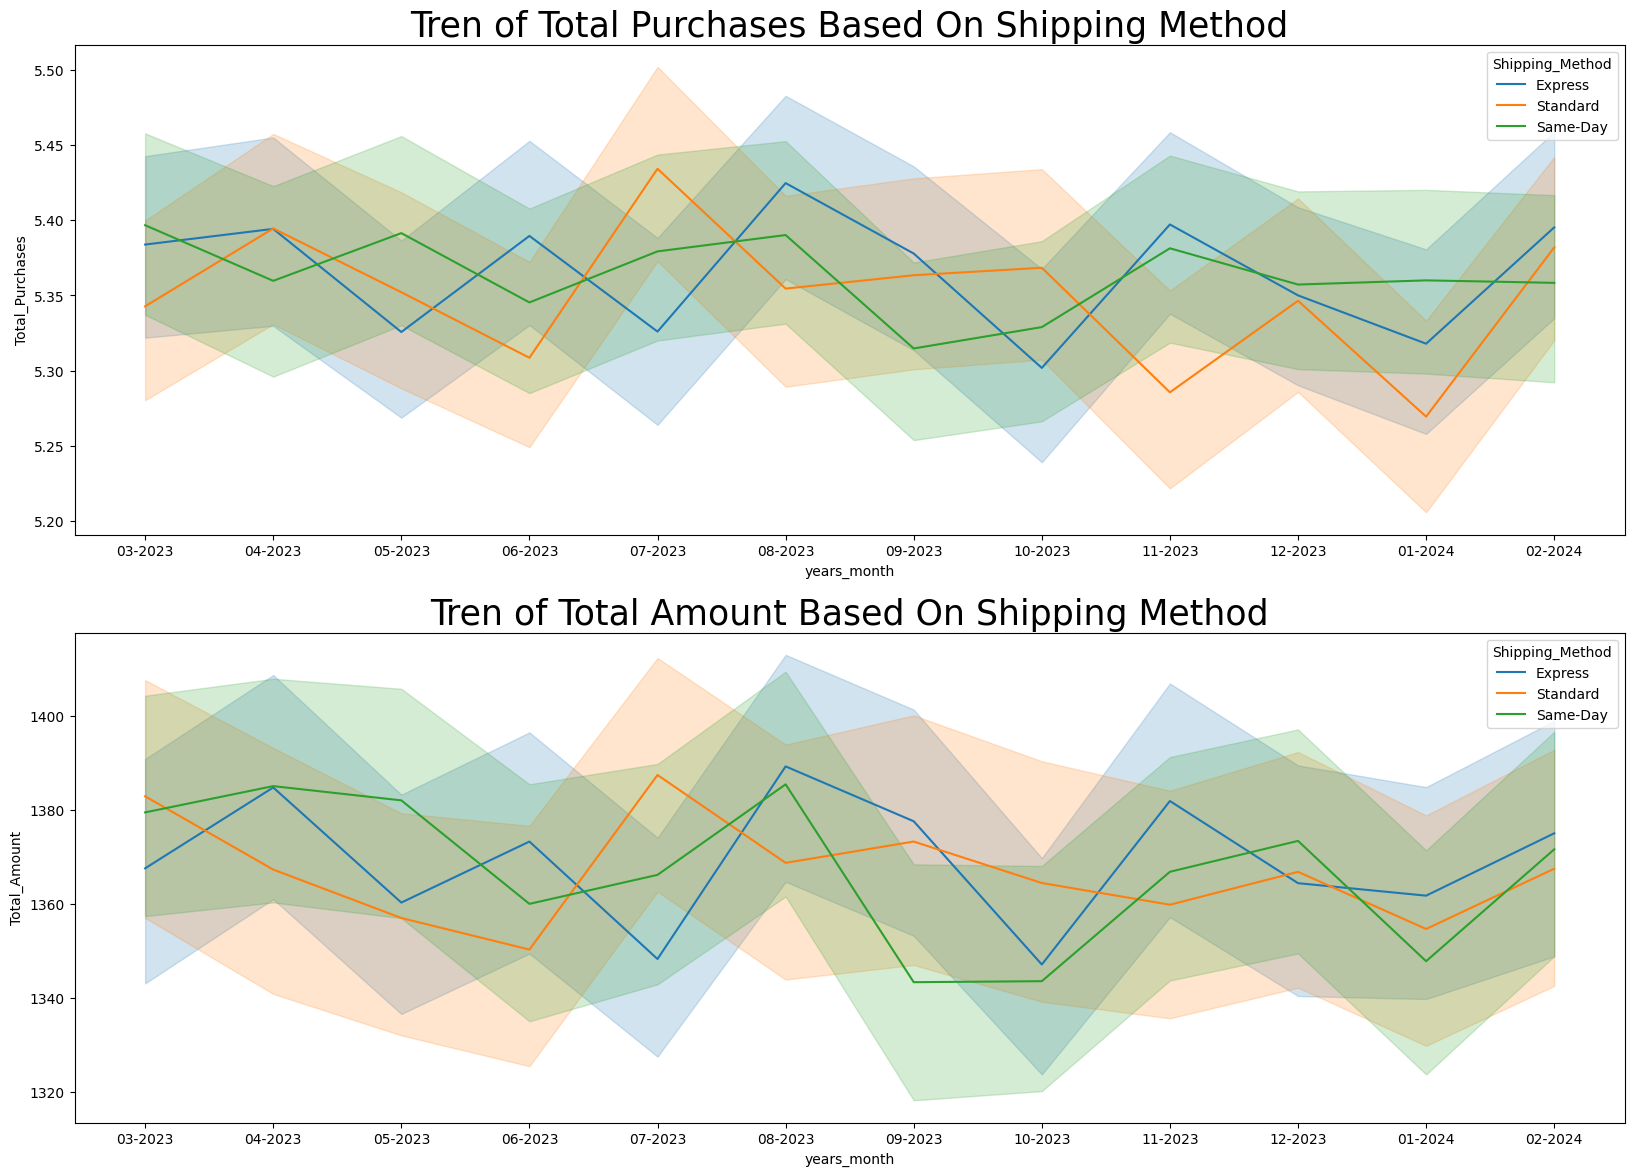

In [55]:
line_chart(hue='Shipping_Method',dataframe=df)

1. Tren Total Purchases Berdasarkan Metode Pembayaran (Grafik Pertama):
Garis yang mewakili berbagai metode pembayaran:
Kartu Kredit (Credit Card): Garis ini menunjukkan bahwa total pembelian dengan kartu kredit cukup stabil sepanjang waktu, dengan sedikit fluktuasi.
PayPal: Ada variasi yang signifikan, dengan beberapa lonjakan dan penurunan pada berbagai bulan.
Kartu Debit (Debit Card) dan Tunai (Cash): Metode pembayaran ini memiliki tren yang lebih stabil dan lebih rendah dibandingkan dengan kartu kredit dan PayPal.
Kesimpulan: Kartu kredit tetap menjadi metode pembayaran yang paling dominan dengan tren yang stabil, sementara PayPal mengalami lebih banyak fluktuasi, mungkin terkait dengan promosi atau peristiwa khusus.

2. Tren Total Amount Berdasarkan Metode Pembayaran (Grafik Kedua):
Garis yang mewakili berbagai metode pembayaran:
Kartu Kredit (Credit Card): Sekali lagi, kartu kredit menunjukkan jumlah total yang relatif stabil dengan sedikit kenaikan dan penurunan.
PayPal: PayPal menunjukkan pola yang mirip dengan grafik pertama, dengan lebih banyak variasi dalam jumlah total.
Kartu Debit (Debit Card) dan Tunai (Cash): Jumlah total untuk metode pembayaran ini tetap lebih rendah dan lebih stabil.
Kesimpulan: Jumlah total yang dibelanjakan dengan kartu kredit cenderung lebih tinggi dan stabil, sementara PayPal mengalami lebih banyak variasi. Metode lain seperti kartu debit dan tunai menunjukkan penggunaan yang lebih stabil tetapi dengan volume yang lebih rendah.


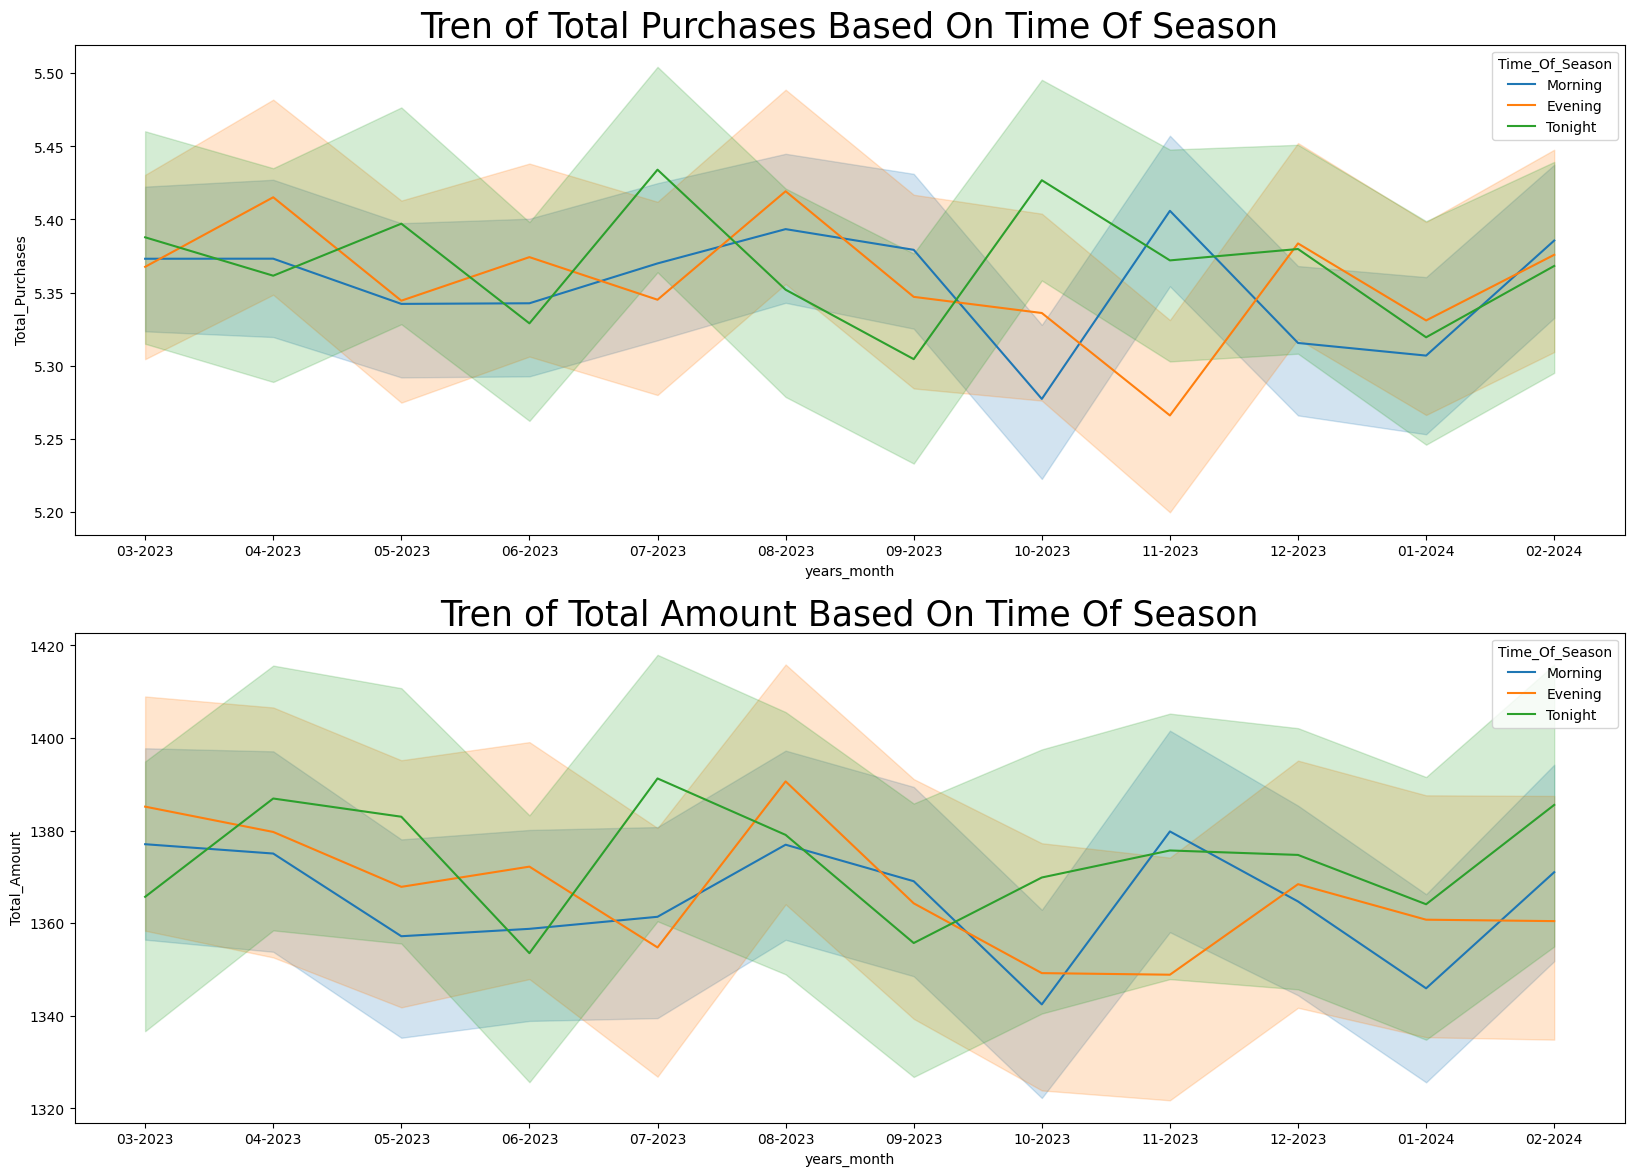

In [56]:
line_chart(hue='Time_Of_Season',dataframe=df)

Pengaruh Musim pada Pembelian: Dari grafik pertama dan kedua, dapat dilihat bahwa jumlah pembelian dan total jumlah yang dihabiskan bervariasi sesuai dengan musim. Hal ini menunjukkan bahwa waktu dalam setahun dapat mempengaruhi perilaku pembelian pelanggan.

Perbedaan Berdasarkan Usia Dewasa: Dari grafik ketiga dan keempat, terlihat bahwa kelompok usia dewasa menunjukkan pola pembelian yang berbeda, baik dalam hal jumlah pembelian maupun total pengeluaran. Ini menunjukkan bahwa usia pelanggan dapat memengaruhi pola pengeluaran mereka.

# TOP 5 CITY BASED ON TOTAL PURCHASE

In [57]:
top_5_city = []
top_10_state = []
City_State = ['City','State']
for iteration in range(len(City_State)):
    head = 10
    if iteration == 0:
        head = 5
    for i in df.groupby(by=City_State[iteration]).Total_Purchases.sum().sort_values(ascending=False).head(head).reset_index()[City_State[iteration]]:
        if iteration == 0:
            top_5_city.append(i)
        else:
            top_10_state.append(i)
print(f"Top State\n{top_10_state}")
print(f"\n\nTop City\n{top_5_city}")

Top State
['England', 'Berlin', 'New South Wales', 'Ontario', 'Connecticut', 'Maine', 'Georgia', 'Kansas', 'New Mexico', 'New York']


Top City
['Chicago', 'Portsmouth', 'San Francisco', 'Frankfurt', 'Boston']


In [58]:
def mkdata(x,category,df):
    data_top = {}
    
    for i in df:
        data_top[i] = []
    
    for basedon in x:
        for i in range(len(df)):
            if df[category][i] == basedon:
                for columns in df:
                    data_top[columns].append(df[columns][i])
    return pd.DataFrame(data_top)

Fungsi mkdata berguna untuk mengekstrak subset data yang sesuai dengan kategori yang Anda minati dari DataFrame besar, sehingga Anda bisa menganalisis atau memproses data tersebut lebih lanjut tanpa perlu mengelola seluruh DataFrame.

In [59]:
city = mkdata(top_5_city,'City',df)
state = mkdata(top_10_state,'State',df)

In [60]:
def top_favorit_product(dataframe,based_on,data_list):
    top_favorit_product = {
        based_on : [],
        'Product' :[],
        'Total':[],
    }

    if len(data_list) < 0:
        return 
        
    for city_ in data_list:
        data_city = dataframe[dataframe[based_on]==city_]['products'].value_counts(ascending=False).reset_index().head(1)
        top_favorit_product[based_on].append(city_)
        top_favorit_product['Product'].append(data_city['products'][0])
        top_favorit_product['Total'].append(data_city['count'][0])
    
    print(f"THE MOST OF FAVORIT PRODUCT BASED ON TOP {based_on}")
    print('='*50)
    for columns in top_favorit_product:
            print("{:<20}".format(columns),end=" ")
    print()
    print('='*50)
    for i in range(len(top_favorit_product[based_on])):
        for columns in top_favorit_product:
            print("{:<20}".format(top_favorit_product[columns][i]),end=" ")
        print()

Fungsi ini berguna untuk menganalisis data penjualan dan dengan cepat menemukan produk yang paling favorit dalam berbagai kategori, seperti kota atau segmen pelanggan. Dengan fungsi ini, Anda dapat dengan mudah melihat produk mana yang paling disukai di berbagai area atau oleh berbagai kelompok pelanggan, dan ini dapat membantu dalam pengambilan keputusan bisnis, seperti strategi pemasaran atau manajemen inventaris.

In [61]:
top_favorit_product(city,'City',top_5_city)

THE MOST OF FAVORIT PRODUCT BASED ON TOP City
City                 Product              Total                
Chicago              Alkaline water       997                  
Portsmouth           Literary fiction     185                  
San Francisco        Adventure            115                  
Frankfurt            Adventure            92                   
Boston               Mystery              81                   


In [62]:
top_favorit_product(state,'State',top_10_state)

THE MOST OF FAVORIT PRODUCT BASED ON TOP State
State                Product              Total                
England              Mystery              545                  
Berlin               Mystery              436                  
New South Wales      Adventure            372                  
Ontario              Mystery              350                  
Connecticut          Alkaline water       998                  
Maine                Mystery              112                  
Georgia              History              84                   
Kansas               Literary fiction     52                   
New Mexico           Adventure            64                   
New York             Fantasy              13                   


# RFM analysis

RFM Analysis adalah teknik analisis yang digunakan untuk mengukur dan mengevaluasi perilaku pelanggan berdasarkan tiga dimensi utama:

Recency (R): Mengukur seberapa baru pelanggan melakukan transaksi atau berinteraksi dengan bisnis. Semakin baru interaksinya, semakin tinggi skor recency-nya.

Frequency (F): Mengukur seberapa sering pelanggan melakukan transaksi dalam periode waktu tertentu. Pelanggan yang lebih sering bertransaksi akan mendapatkan skor frequency yang lebih tinggi.

Monetary (M): Mengukur jumlah uang yang dihabiskan oleh pelanggan selama periode tertentu. Pelanggan yang membelanjakan lebih banyak uang akan mendapatkan skor monetary yang lebih tinggi.



In [353]:
df['Phone'] = df['Phone'].astype('str')
df['Phone'].value_counts()

Phone
5393459450.0    2
2216086780.0    2
4019601842.0    2
8532487479.0    2
2192851481.0    2
               ..
4522593792.0    1
3502438529.0    1
3880643528.0    1
4100733806.0    1
4182826460.0    1
Name: count, Length: 291620, dtype: int64

In [354]:
df[df['Phone']=='5393459450.0']

Transaction_ID  Customer_ID          Name               Email  \
123685       1202611.0      31531.0  Thomas Hogan  Lindsay1@gmail.com   
135648       1202611.0      31531.0  Thomas Hogan  Lindsay1@gmail.com   

               Phone     City   State  Country   Age Gender  ... Product_Type  \
123685  5393459450.0  Hamburg  Berlin  Germany  47.0   Male  ...   Headphones   
135648  5393459450.0  Hamburg  Berlin  Germany  47.0   Male  ...   Headphones   

       Feedback Shipping_Method  Payment_Method  Order_Status  Ratings  \
123685     Good        Standard     Credit Card    Processing      3.0   
135648  Average        Standard     Credit Card    Processing      2.0   

                   products  years_month  Time_Of_Season             Adult  
123685  Wireless headphones      08-2023         Tonight  Middle AdultHood  
135648    Studio headphones      08-2023         Tonight  Middle AdultHood  

[2 rows x 31 columns]

In [367]:
len(df)

293911

In [363]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'])
today = datetime(2024,2,29)

rfm = df.groupby(by='Phone').Date.max().reset_index()
rfm['Recency'] = (today - rfm['Date']).dt.days
rfm['Frequency'] = df.groupby(by='Phone').Transaction_ID.count().reset_index()['Transaction_ID']
rfm['Monetary'] = df.groupby(by='Phone').Total_Amount.sum().reset_index()['Total_Amount']

rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, [4, 3, 2, 1])  # Semakin rendah Recency, semakin tinggi skornya
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, [1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, [1, 2, 3, 4])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm

Phone       Date  Recency  Frequency     Monetary R_Score  \
0       1000049414.0 2023-07-09      235          1   907.690169       2   
1       1000051281.0 2024-02-22        7          1   640.618341       4   
2       1000061181.0 2023-06-24      250          1  1112.409370       2   
3       1000135010.0 2023-06-17      257          1   231.132808       2   
4       1000139968.0 2023-04-23      312          1  1190.482587       1   
...              ...        ...      ...        ...          ...     ...   
291615  9999835161.0 2024-01-17       43          1   451.612784       4   
291616  9999896141.0 2024-01-30       30          1  2468.462005       4   
291617  9999910115.0 2024-02-11       18          1   712.836590       4   
291618  9999975153.0 2024-01-04       56          1   837.350553       4   
291619  9999996122.0 2023-10-09      143          1  2163.423510       3   

       F_Score M_Score RFM_Score  
0            1       2       212  
1            1       2       412  
2            1       3       213  
3            1       1       211  
4            1       3       113  
...        ...     ...       ...  
291615       4       2       442  
291616       4       4       444  
291617       4       2       442  
291618       4       2       442  
291619       4       4       344  

[291620 rows x 9 columns]

In [ ]:
data_baru = {
    'Phone' : np.array(rfm[rfm['RFM_Score']=='444']['Phone']),
    'Date' : np.array(rfm[rfm['RFM_Score']=='444']['Date']),
}

except_columns = ['Phone','Date','Age','Year','Time','Email','Product_Brand','Product_Type','Month','Customer_ID','Order_Status','years_month']
for i in df:
    if i in except_columns:
        continue
    data_baru[i]=[]
    
for columns in data_baru:
    if columns in except_columns:
        continue
    for i in range(len(data_baru['Phone'])):
        data_baru[columns].append(df[(df['Phone']==data_baru['Phone'][i]) & (df['Date']==data_baru['Date'][i])].iloc[0][columns])

In [416]:
high_score = pd.DataFrame(data_baru)
#high_score.to_csv('High_Score_RFM.csv')
high_score.describe()

Date  Transaction_ID  Total_Purchases  \
count                           4576    4.576000e+03      4576.000000   
mean   2024-01-15 01:56:26.013985792    5.490049e+06         7.979240   
min              2023-11-30 00:00:00    1.001717e+06         3.000000   
25%              2023-12-23 00:00:00    3.222097e+06         7.000000   
50%              2024-01-15 00:00:00    5.503247e+06         8.000000   
75%              2024-02-08 00:00:00    7.756844e+06         9.000000   
max              2024-02-29 00:00:00    9.997173e+06        10.000000   
std                              NaN    2.602526e+06         1.647056   

            Amount  Total_Amount      Ratings  
count  4576.000000   4576.000000  4576.000000  
mean    378.661286   2976.591349     3.128278  
min     115.659704   1026.549842     1.000000  
25%     317.778794   2376.824332     2.000000  
50%     388.550839   2837.015420     3.000000  
75%     447.084160   3471.506951     4.000000  
max     499.929194   4997.986042     5.000000  
std      79.869225    776.655826     1.330245

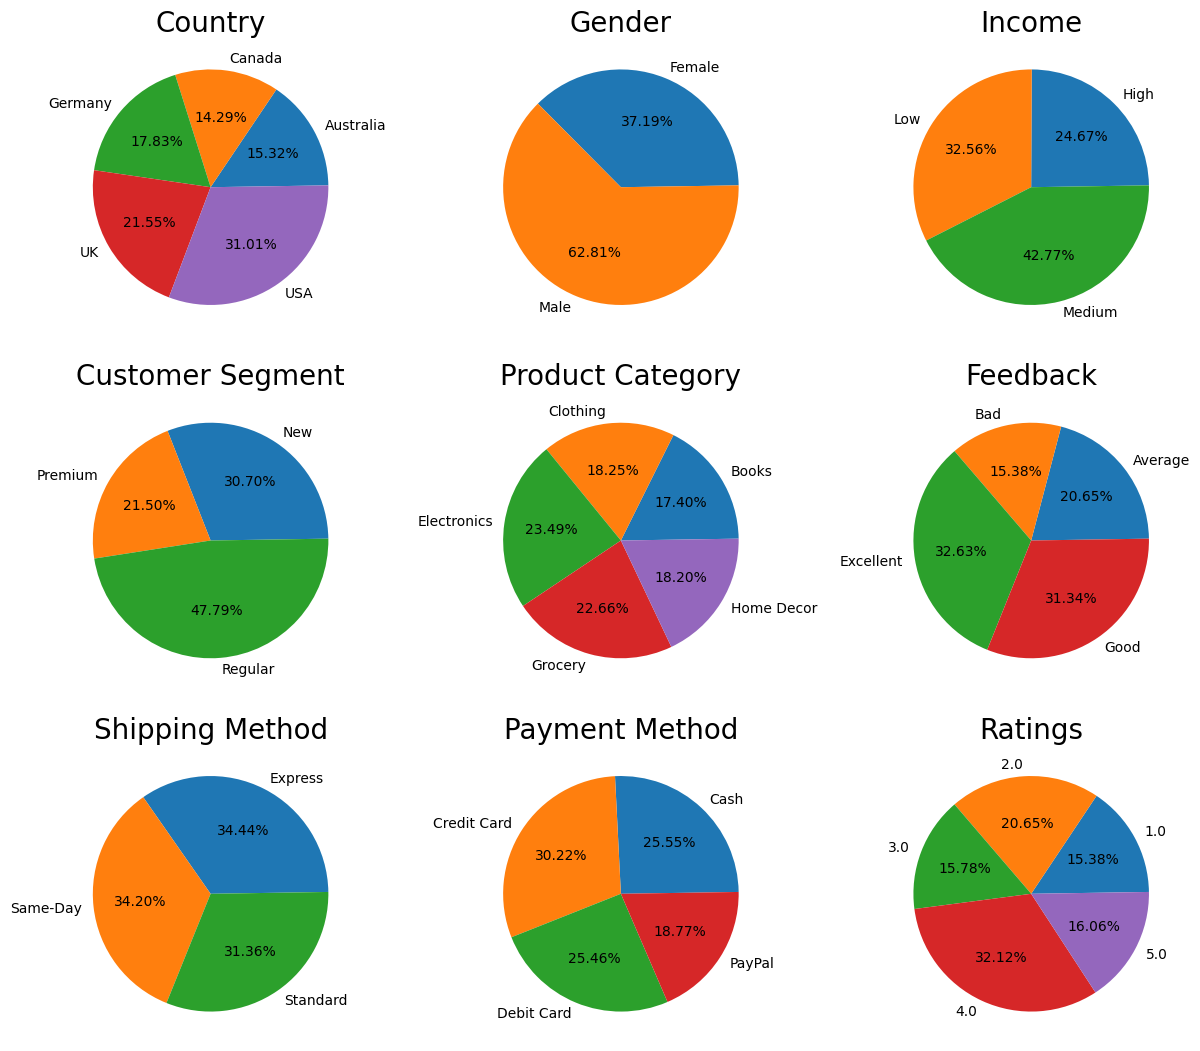

In [414]:
columns = []
for i in high_score:
    if high_score[i].nunique() <= 5:
        columns.append(i)
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(15,13))
index = 0
for i in range(0,3) :
    for j in range(0,3):
        compare = high_score.groupby(by=columns[index],as_index=False).Transaction_ID.count()
        ax[i][j].pie(compare['Transaction_ID'],labels=compare[columns[index]],
                     startangle=0.90,autopct='%1.2f%%')
        ax[i][j].set_title(columns[index].replace('_',' ',1),fontsize=20)
        index+=1
plt.show()

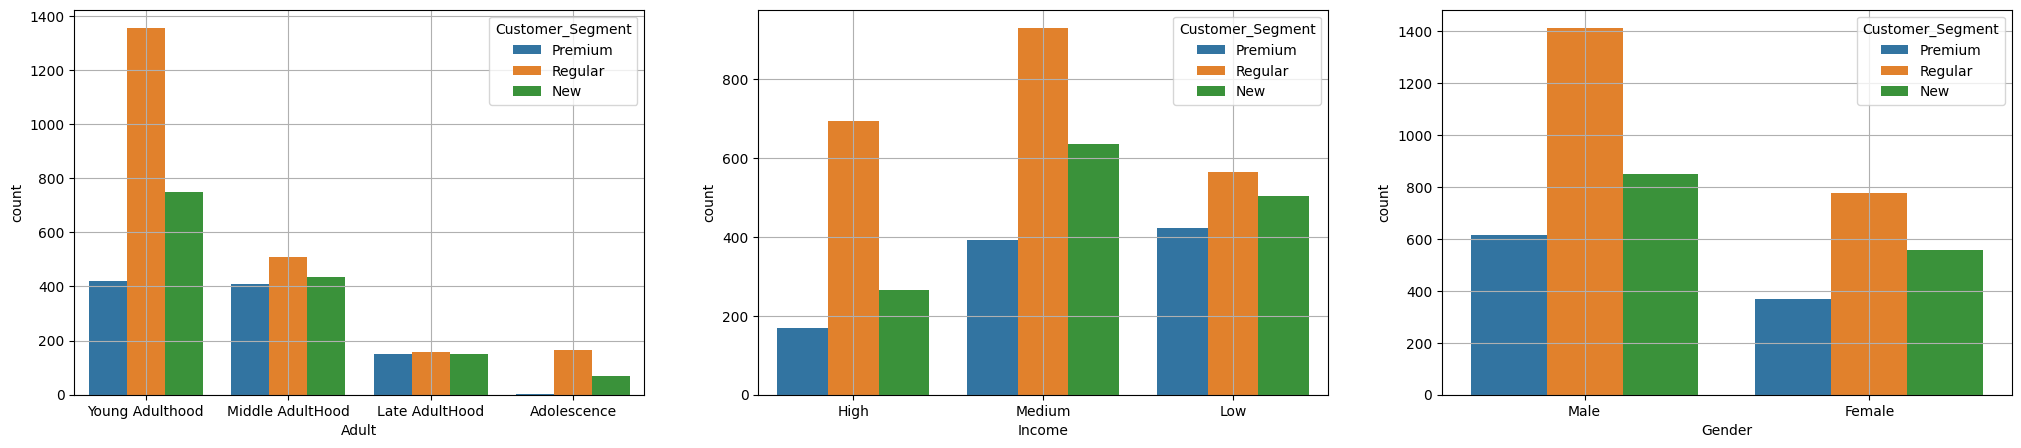

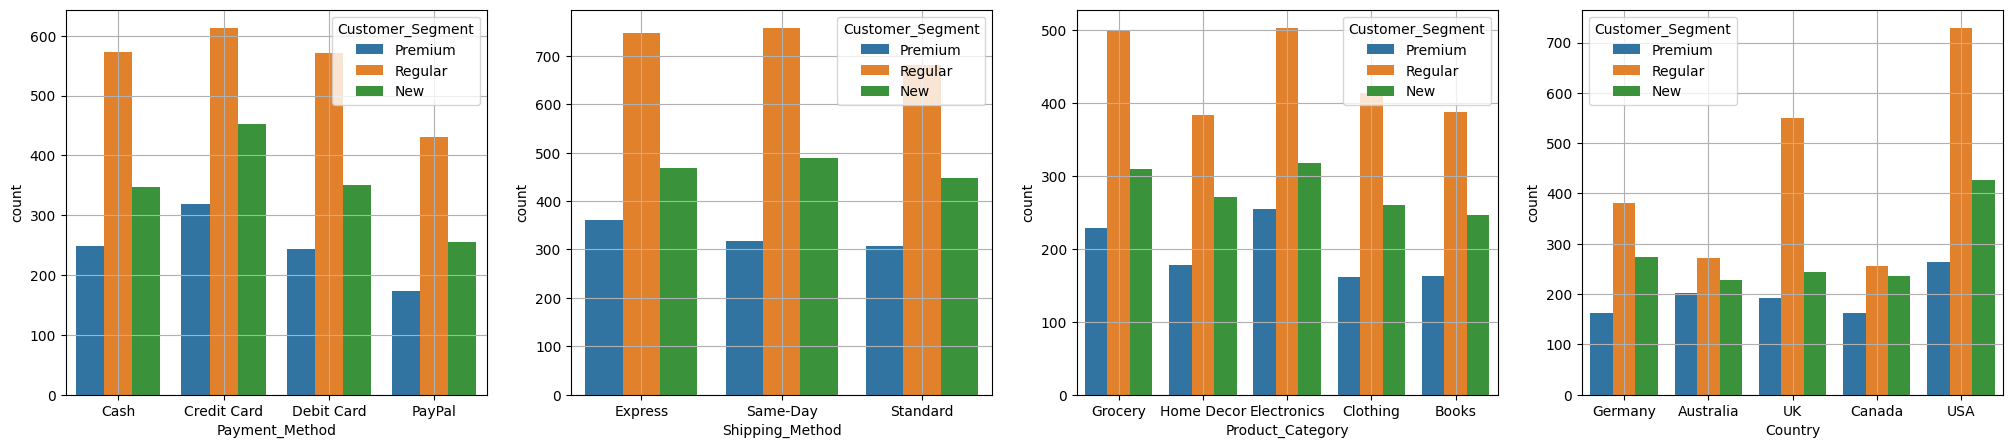

In [404]:
demograph = ['Adult','Income','Gender']
method = ['Payment_Method','Shipping_Method','Product_Category','Country']
x__ = [demograph,method]
for i in x__:
    bar_group(i,high_score,'Customer_Segment')

Pelanggan di segmen "Young Adulthood" (dewasa muda) mendominasi, terutama di segmen "Premium" dan "Regular".
Kelompok usia "Middle Adulthood" juga memiliki representasi yang signifikan, sedangkan kelompok "Adolescence" dan "Late Adulthood" memiliki keterlibatan yang jauh lebih rendah.
Income vs Customer Segment:

Pelanggan dengan pendapatan "High" lebih banyak berada di segmen "Premium" dan "Regular".
Segmen "Low" juga memiliki banyak pelanggan di segmen "Regular", tetapi tidak sebanyak pendapatan menengah dan tinggi.
Gender vs Customer Segment:

Pelanggan pria ("Male") mendominasi, terutama di segmen "Premium" dan "Regular".
Pelanggan wanita ("Female") juga memiliki kehadiran yang kuat, tetapi lebih merata di semua segmen.
Payment Method vs Customer Segment:

Metode pembayaran "Cash" dan "Debit Card" sering digunakan oleh segmen "Regular".
"Credit Card" digunakan lebih banyak oleh segmen "Premium", sementara "PayPal" terlihat cukup merata di semua segmen.
Shipping Method vs Customer Segment:

Metode pengiriman "Standard" dan "Express" lebih sering digunakan oleh segmen "Regular".
Segmen "Premium" juga sering menggunakan metode pengiriman ini, namun "Same-Day" terlihat lebih diminati oleh segmen "Premium".
Product Category vs Customer Segment:

Kategori produk "Grocery" mendominasi segmen "Regular" dan "Premium".
Produk "Electronics" dan "Clothing" juga sangat populer, dengan segmen "Premium" dan "Regular" yang dominan di kedua kategori tersebut.
Kategori "Ebooks" tampak kurang populer dibandingkan kategori lainnya.
Country vs Customer Segment:

USA memiliki pelanggan terbanyak di segmen "Regular" dan "Premium".
Germany dan Australia juga memiliki representasi yang kuat, terutama di segmen "Regular".


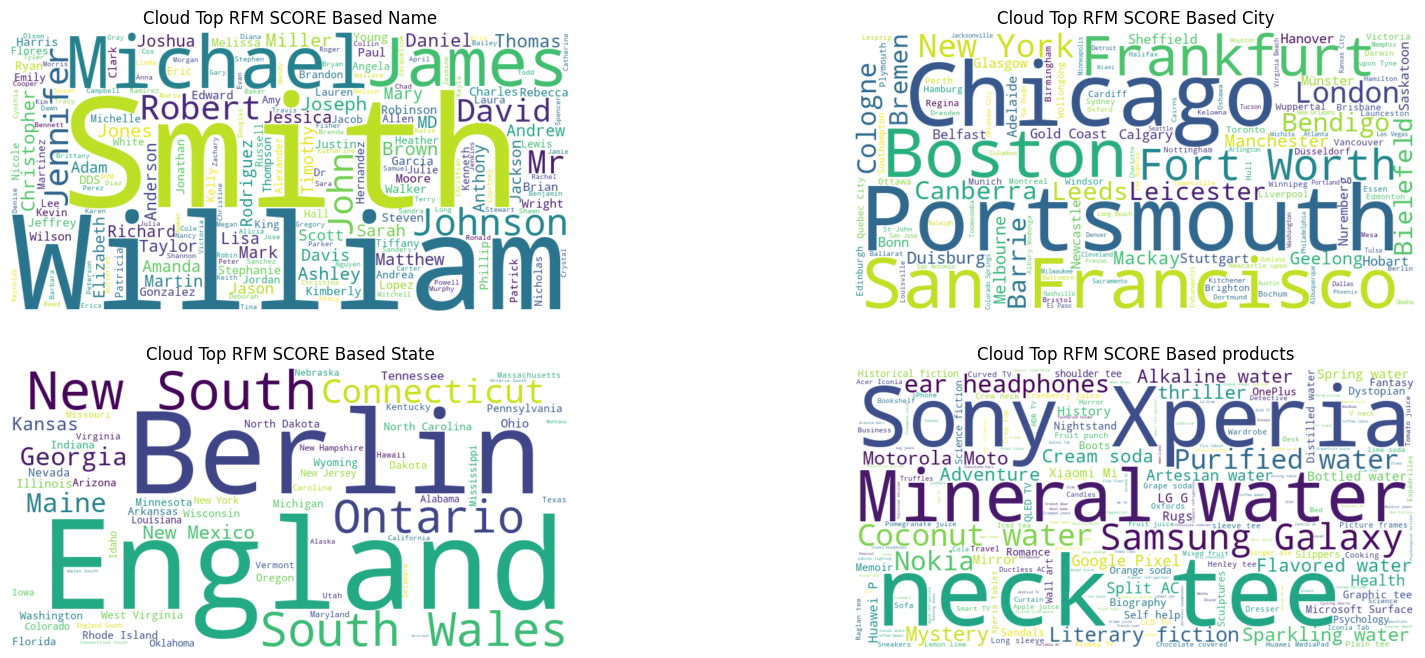

In [405]:
columns = [['Name','City'],['State','products']]
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(20,8))
index=0
for i in range(len(columns)):
    for j in range(len(columns)):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(','.join(high_score[columns[i][j]]))
        ax[i][j].imshow(wordcloud, interpolation='bilinear')
        ax[i][j].axis('off')
        ax[i][j].set_title(f'Cloud Top RFM SCORE Based {columns[i][j]}')
plt.show()

#### Penjelasan:
Nama yang Dominan:

William: Nama ini mendominasi word cloud, yang berarti banyak pelanggan dengan nama William memiliki skor RFM 444. Ukuran teks yang besar menunjukkan frekuensi yang tinggi.
Smith, Michael, dan Johnson: Nama-nama ini juga sering muncul dengan skor RFM 444, ditandai dengan ukuran teks yang besar. Ini menunjukkan bahwa ada banyak pelanggan dengan nama ini yang sangat bernilai berdasarkan analisis RFM.
Nama Lainnya:

Nama-nama seperti David, Jennifer, Thomas, dan John juga muncul dengan ukuran yang cukup besar, menunjukkan frekuensi kemunculan yang cukup tinggi, meskipun tidak sebanyak nama-nama dominan seperti William dan Smith.
Nama-nama dengan ukuran teks yang lebih kecil seperti Stephanie, Matthew, dan Anthony menunjukkan bahwa mereka memiliki lebih sedikit pelanggan dengan skor RFM 444 dibandingkan nama-nama yang lebih besar.

# Rekomendasi:
## Targeting Berdasarkan Usia dan Pendapatan:

Usia Muda dan Dewasa Awal: Karena kelompok ini mendominasi segmen pelanggan yang loyal, pertimbangkan kampanye pemasaran yang lebih agresif untuk rentang usia ini.
Pendapatan Tinggi: Fokus pada segmen premium yang memiliki pendapatan tinggi dengan produk dan layanan yang disesuaikan untuk meningkatkan loyalitas lebih lanjut.

## Segmentasi Berdasarkan Metode Pembayaran:

Pelanggan yang menggunakan Credit Card lebih cenderung berada di segmen premium. Mungkin ada peluang untuk menawarkan promo khusus untuk pengguna kartu kredit.

## Penguatan di Produk dan Metode Pengiriman Tertentu:

Grocery dan Electronics: Ini adalah kategori produk yang sangat populer, sehingga fokus pemasaran dan stok harus diarahkan untuk mengakomodasi permintaan ini.
Pengiriman Same-Day: Untuk pelanggan premium, pertimbangkan untuk memperluas atau mempromosikan lebih banyak layanan pengiriman same-day.

## Pengembangan di Pasar Tertentu:

USA dan negara-negara lain yang memiliki representasi tinggi (seperti Germany dan Australia) harus tetap menjadi fokus utama, tetapi mungkin juga bisa dieksplorasi untuk ekspansi lebih lanjut di negara dengan representasi lebih rendah.
Diversifikasi Gender:

Pertimbangkan untuk membuat kampanye yang lebih khusus untuk menarik lebih banyak pelanggan wanita, terutama di segmen premium.

In [568]:
df.to_csv('Retail_sales.csv')

### Link DashBoard :
https://public.tableau.com/app/profile/sadewo.widyanto/viz/RetailStoreAnalysis_17234677999170/Dashboard1

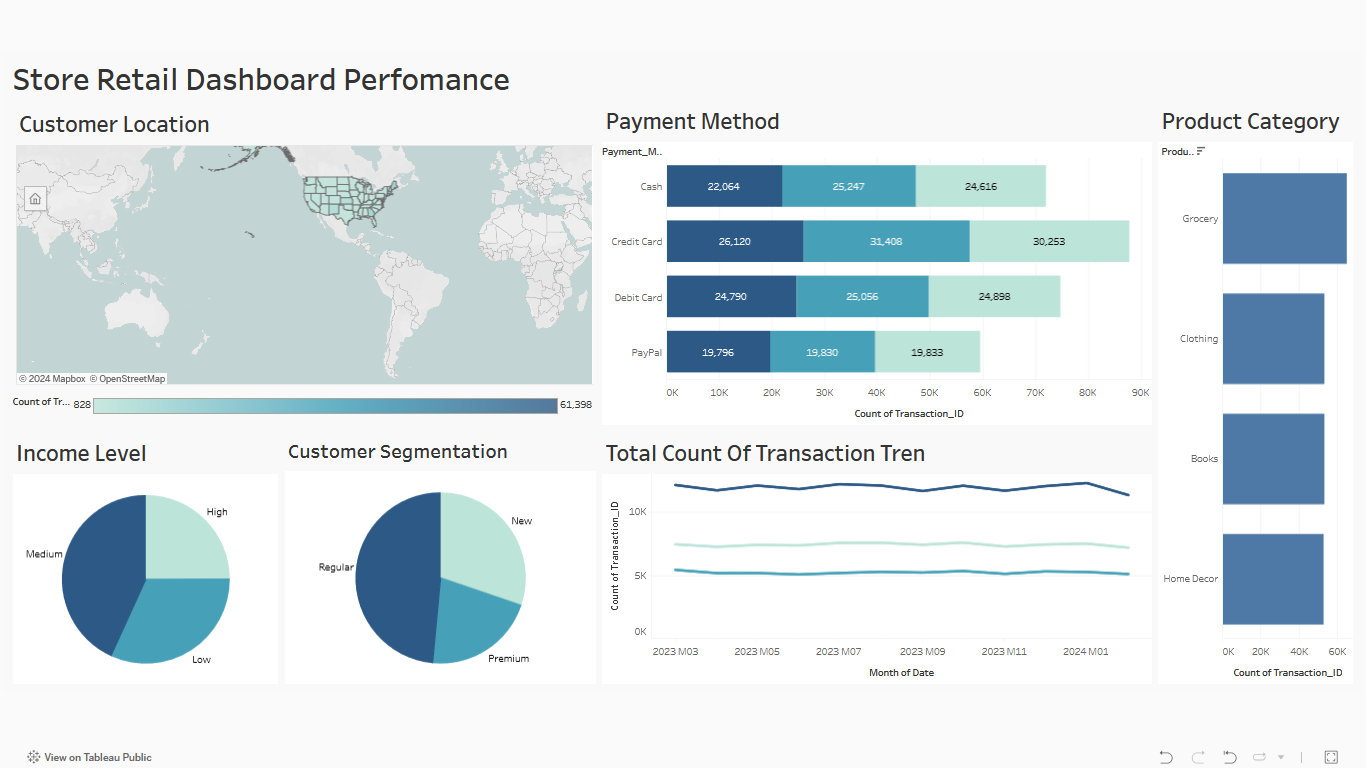